# Weather

In [58]:
import os
import datetime
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [19]:
metrics = ['cloudCover','dewPoint','humidity','pressure','temperature','visibility','windSpeed']

hive_names = ['Cohort 1', 'Cohort 2', 'Experiment 4', 'Normal Hive']
weather_files = ['../results/2_weather.csv', '../results/3_weather.csv', '../results/4_weather.csv', '../results/1_weather.csv']

weather_df_list = []
for file in weather_files:
    df = pd.read_csv(file, comment='#', header = 0)
    weather_df_list.append(df)

print(weather_df_list[0].dtypes)
weather_df_list[0].head()

apparentTemperature    float64
cloudCover             float64
date                    object
dewPoint               float64
hour                   float64
humidity               float64
precipType              object
pressure               float64
temperature            float64
time_period             object
visibility             float64
windBearing            float64
windSpeed              float64
dtype: object


apparentTemperature  cloudCover        date   dewPoint  hour  humidity  \
0            19.400000    0.000000  2016-02-26  12.720000   NaN  0.664286   
1            26.071429    0.310000  2016-02-26   9.255714   NaN  0.358571   
2            17.311429    0.666667  2016-02-27  13.911429   NaN  0.805714   
3            21.164286    0.916667  2016-02-27  13.742857   NaN  0.628571   
4            16.374286    0.666667  2016-02-28  13.510000   NaN  0.834286   

  precipType     pressure  temperature time_period  visibility  windBearing  \
0       rain  1012.294286    19.400000       night       9.980   197.285714   
1       rain  1014.447143    26.835714         day      11.362   220.000000   
2       rain  1017.654286    17.311429       night       9.980   109.714286   
3       rain  1019.222857    21.164286         day       9.980    67.857143   
4       rain  1017.848571    16.374286       night       9.980    76.428571   

   windSpeed  
0   1.692857  
1   2.835714  
2   2.495714  
3   3.130000  
4   1.985714

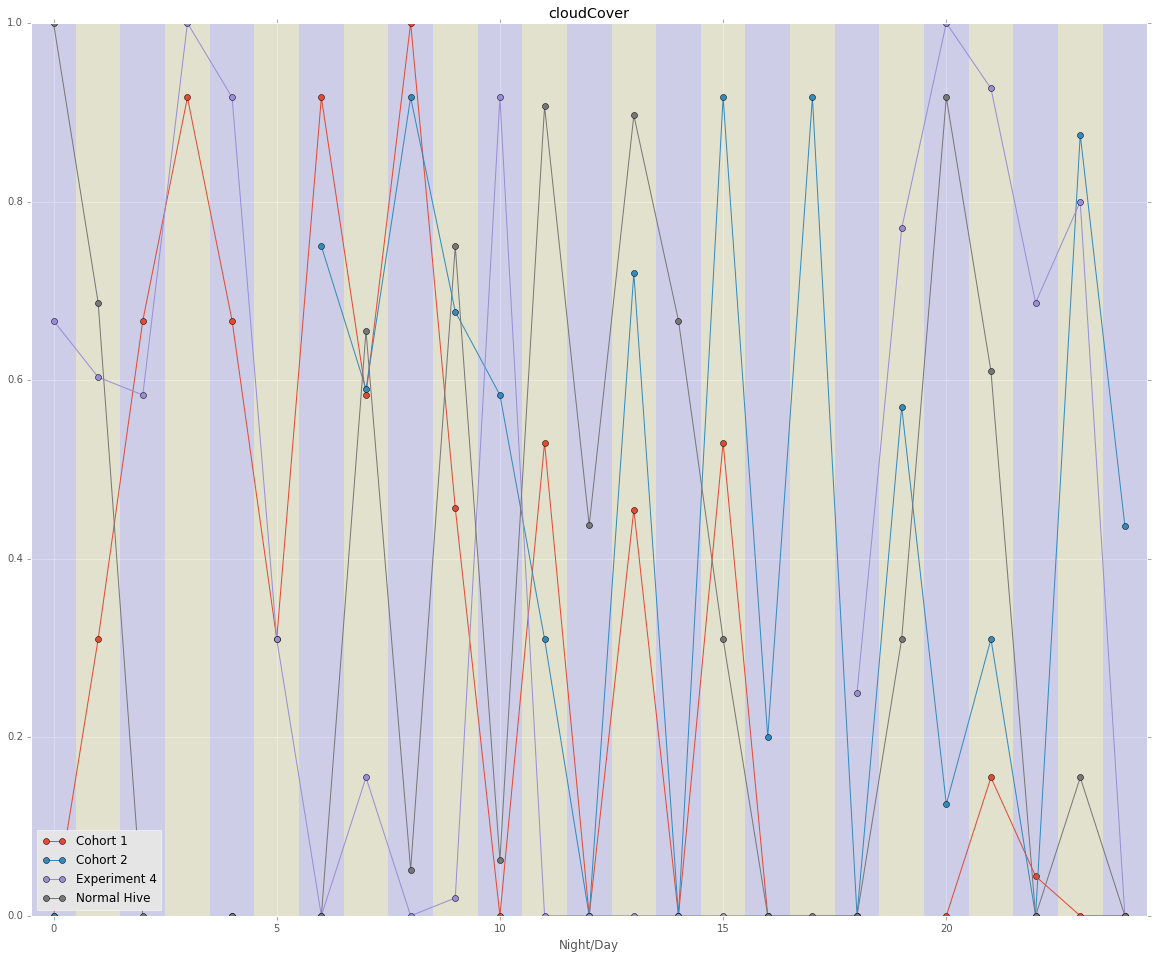

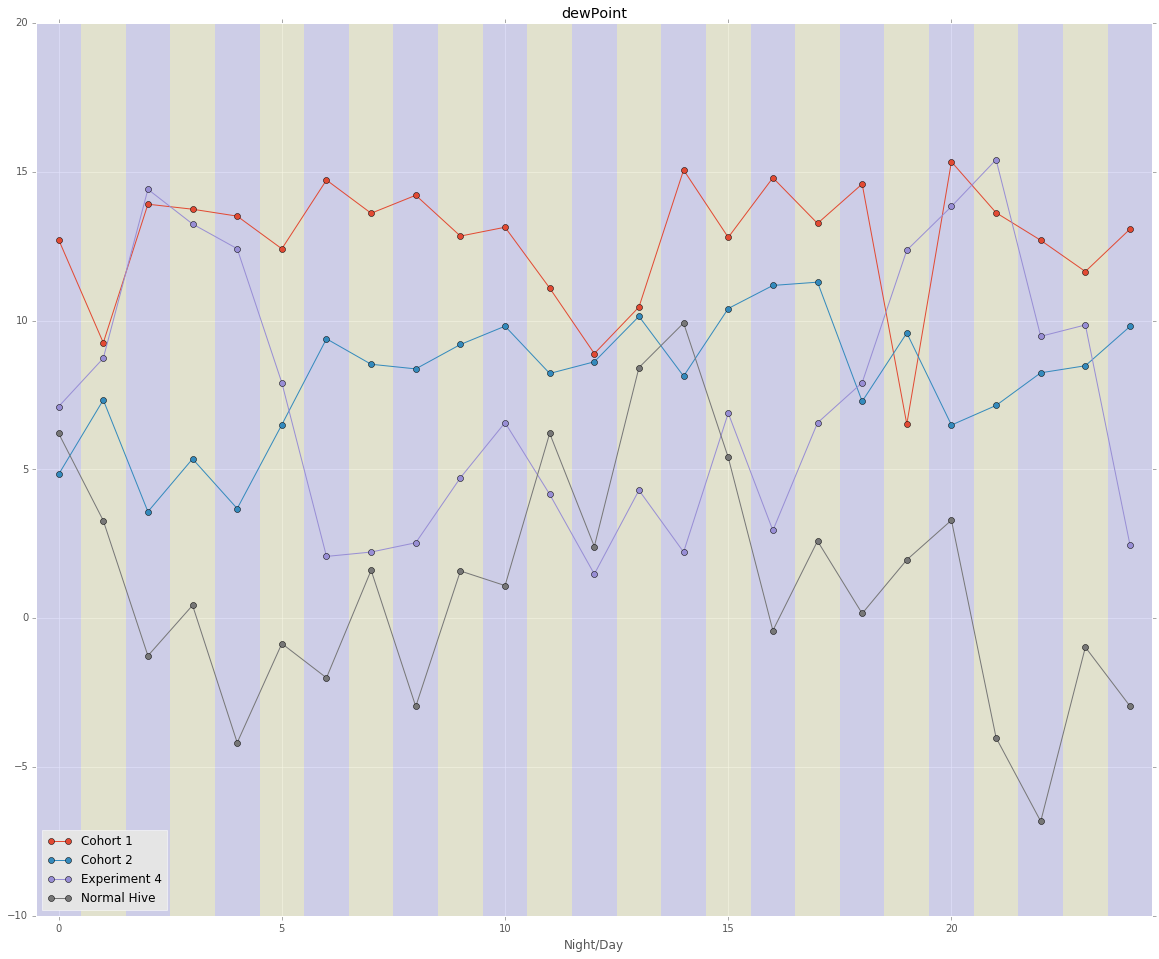

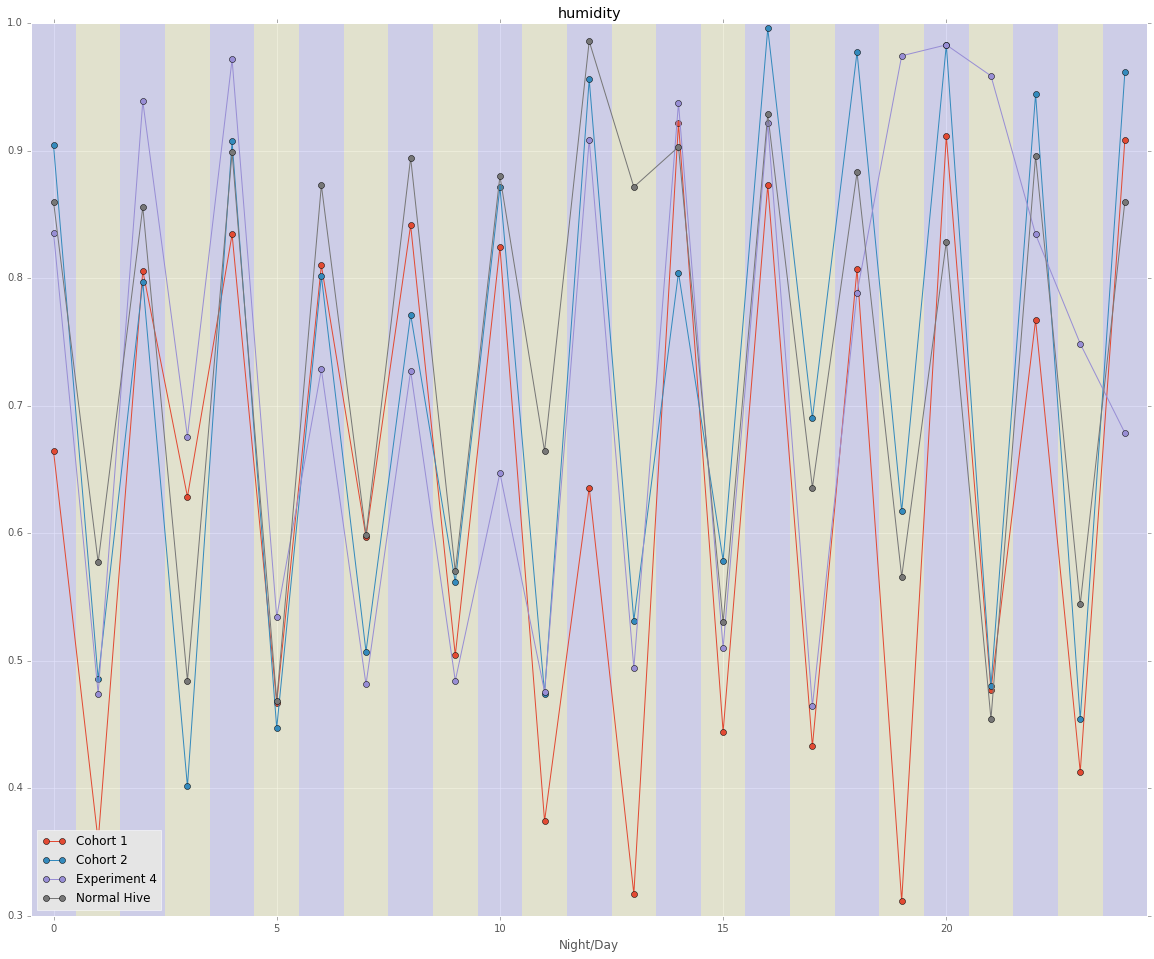

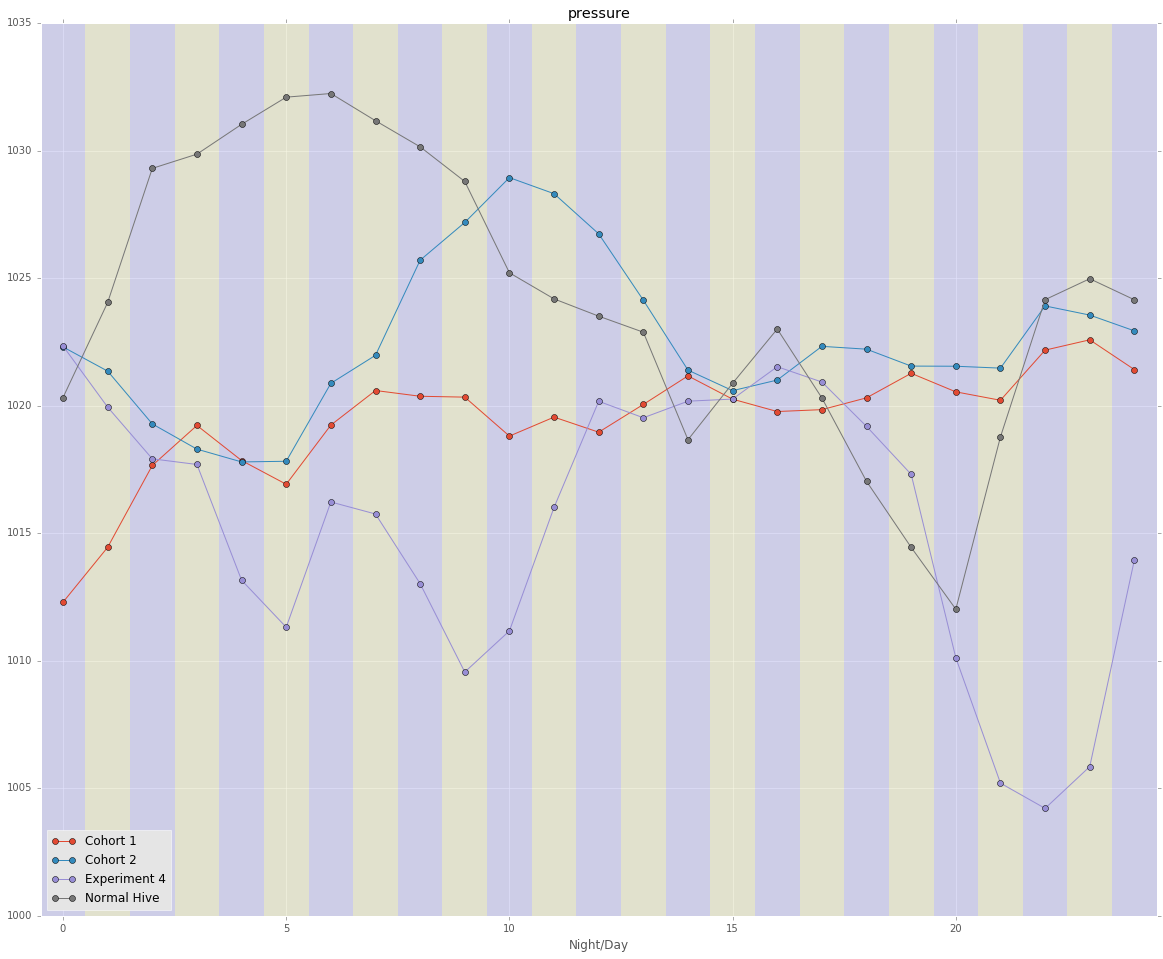

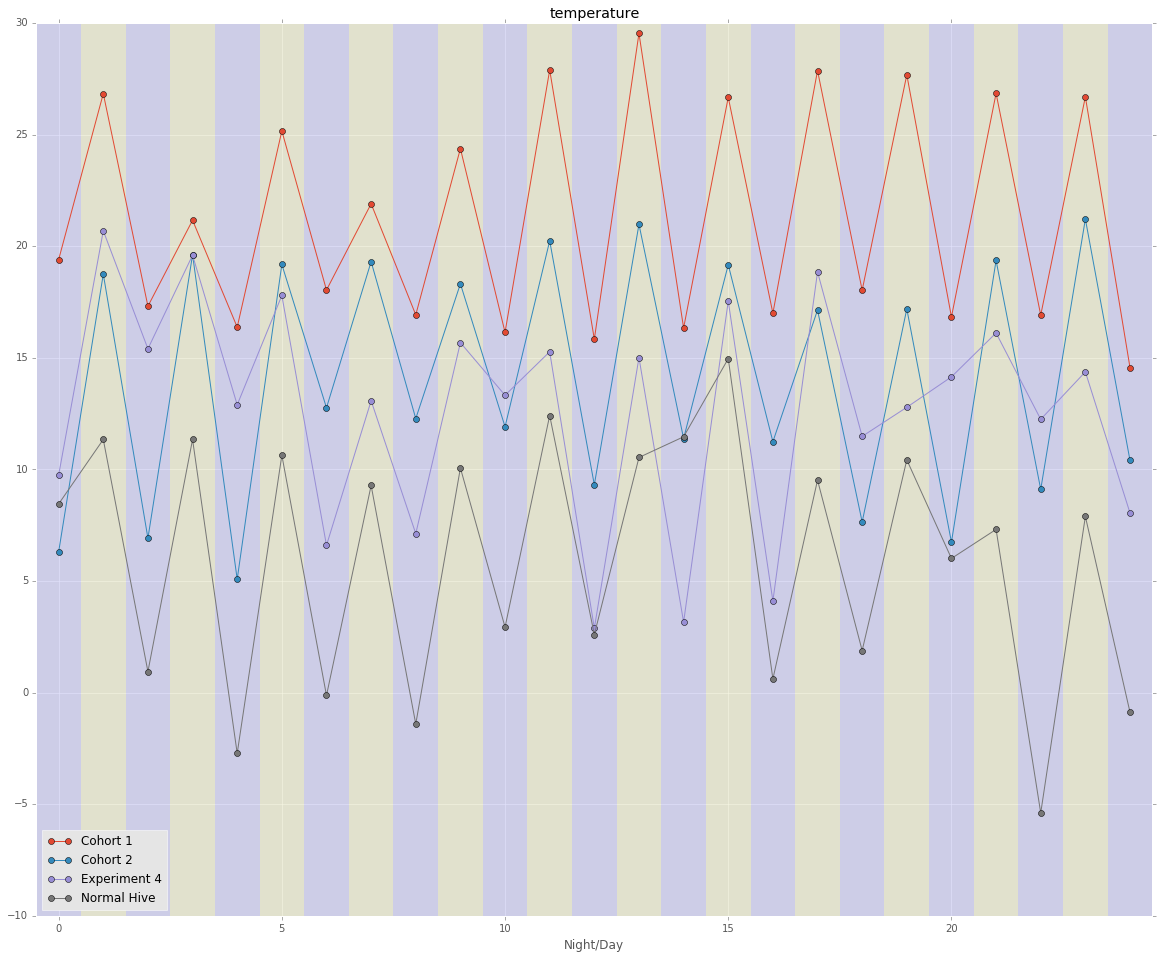

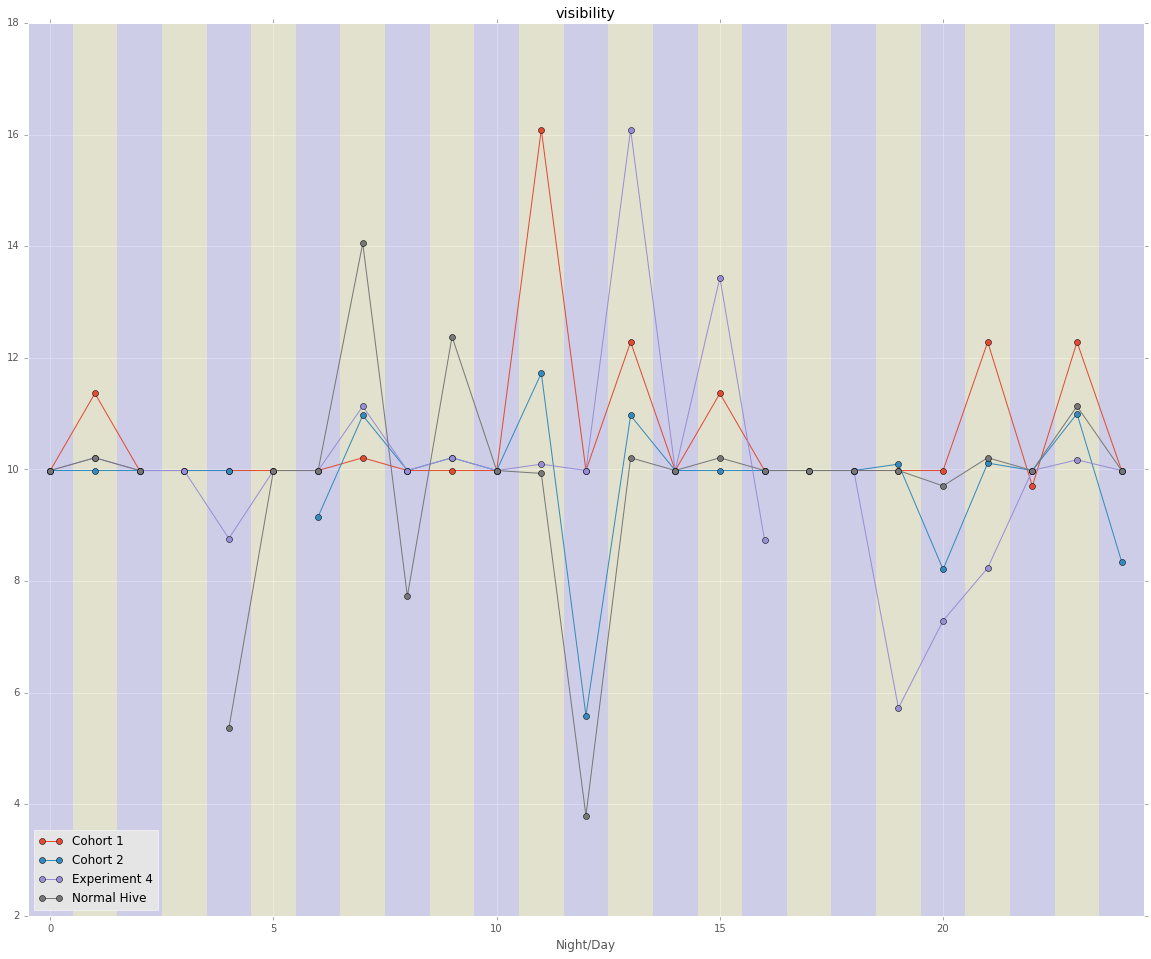

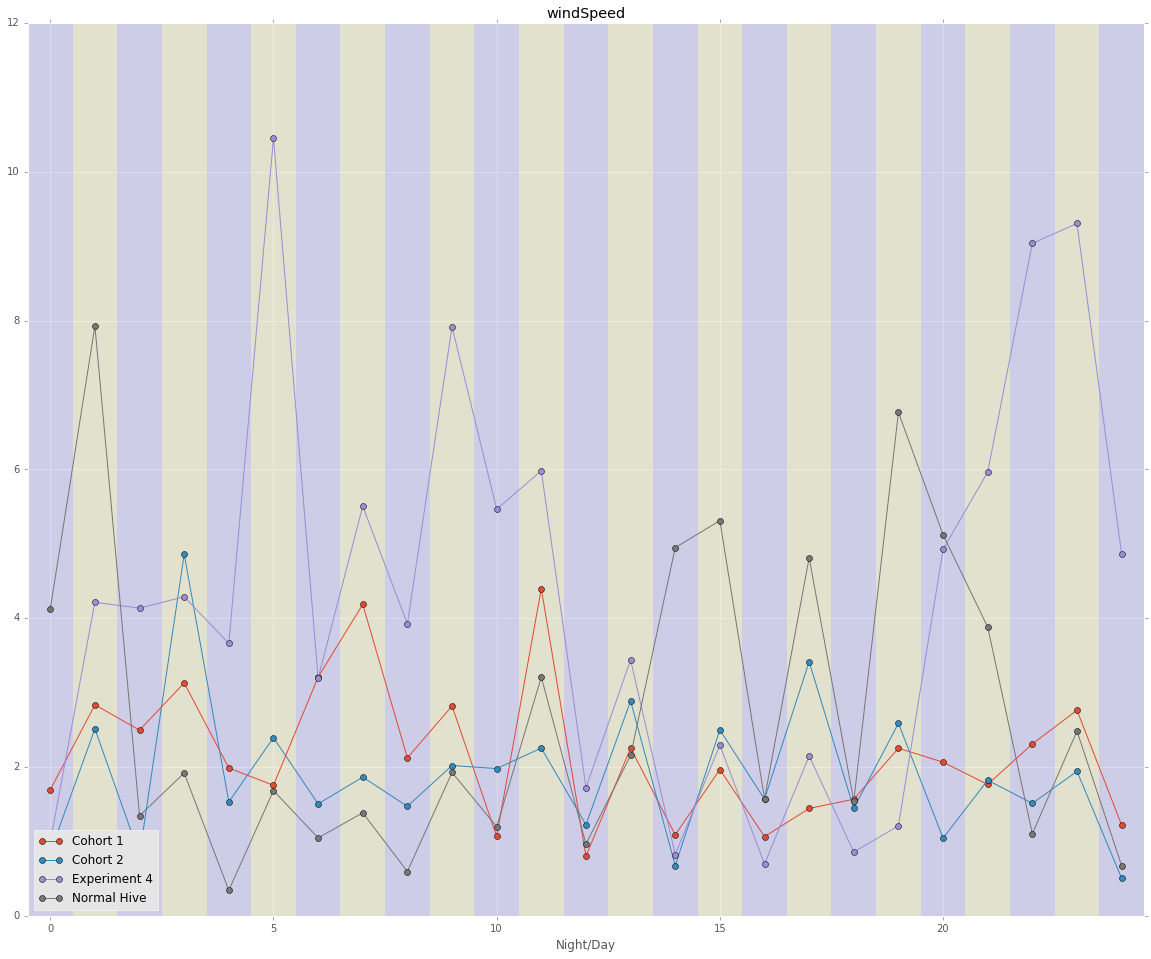

In [21]:
for metric in metrics:

    for i, df in enumerate(weather_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(weather_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

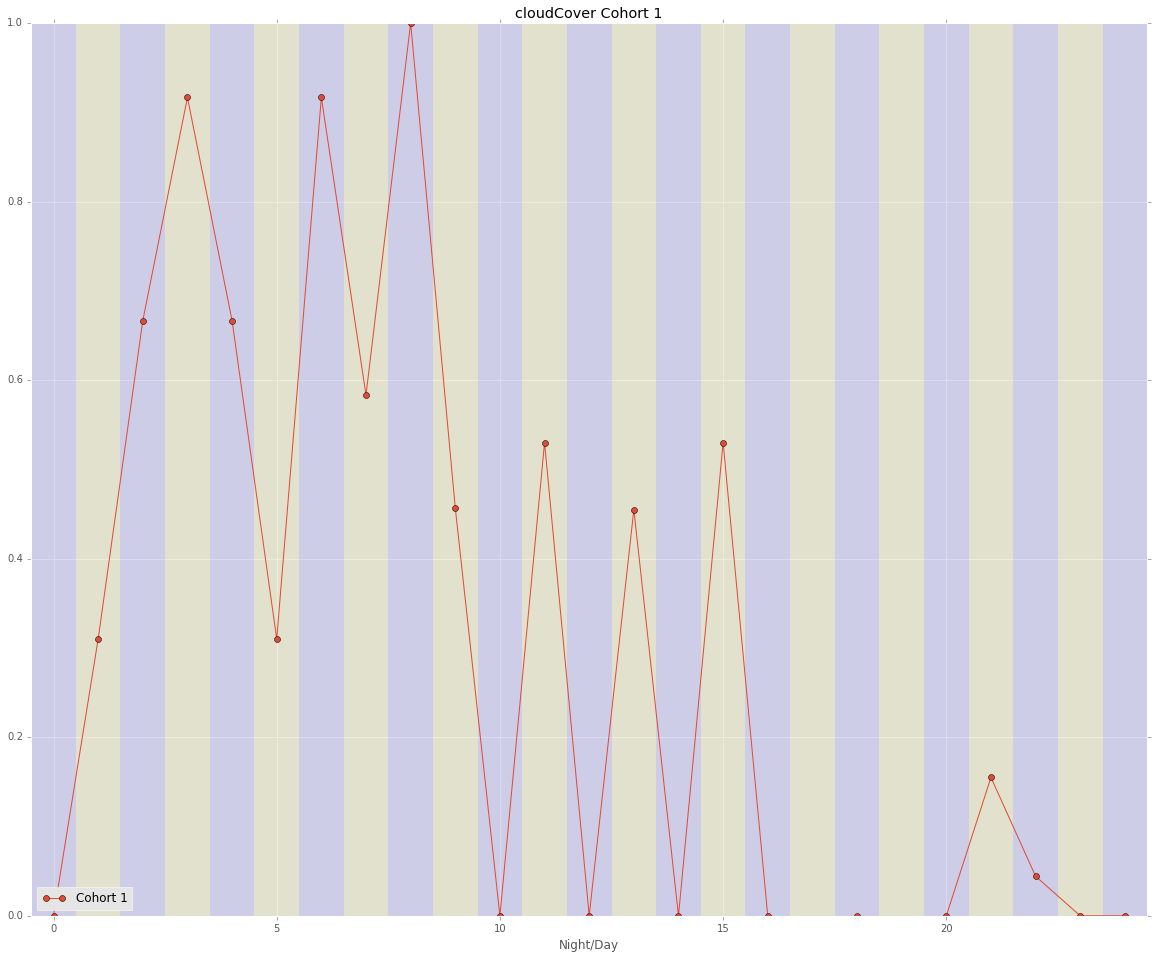

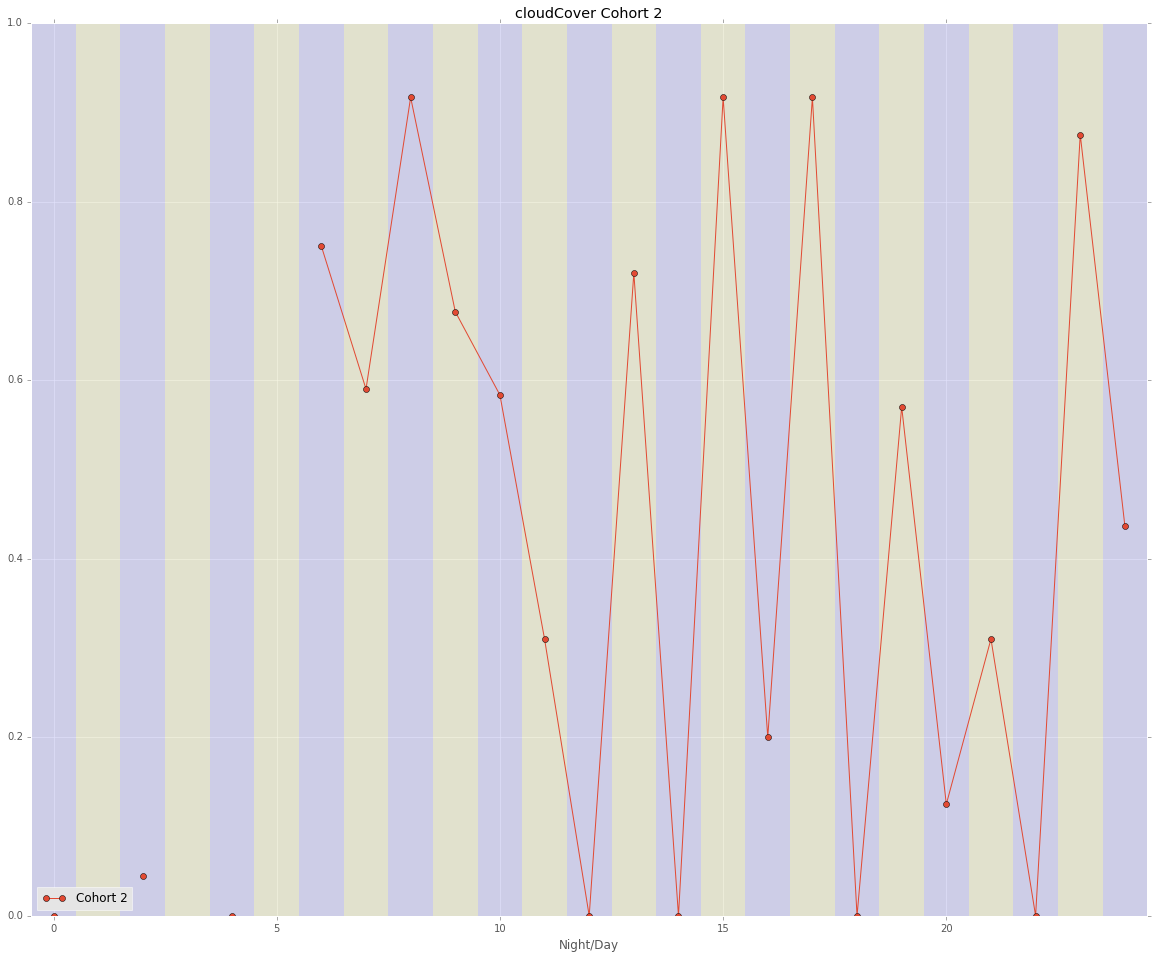

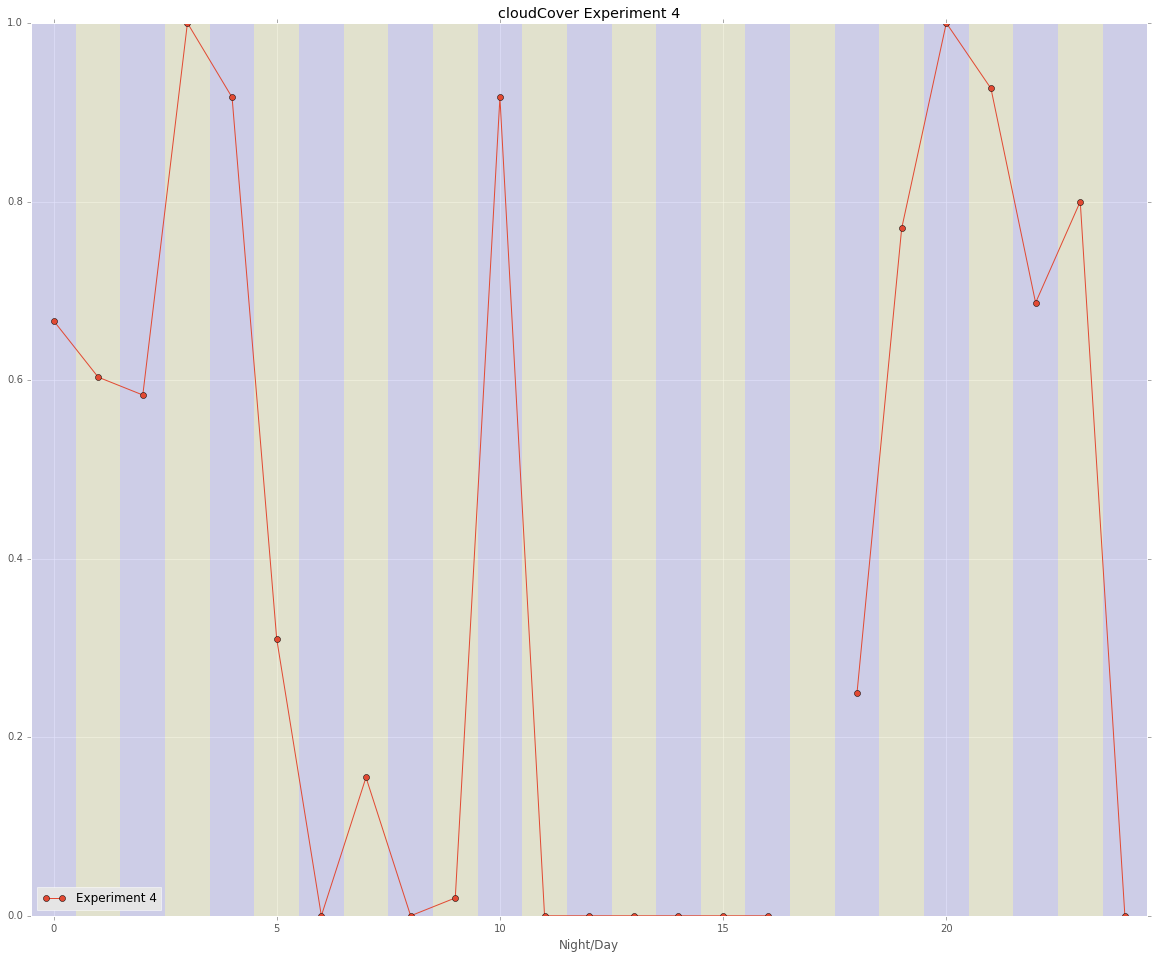

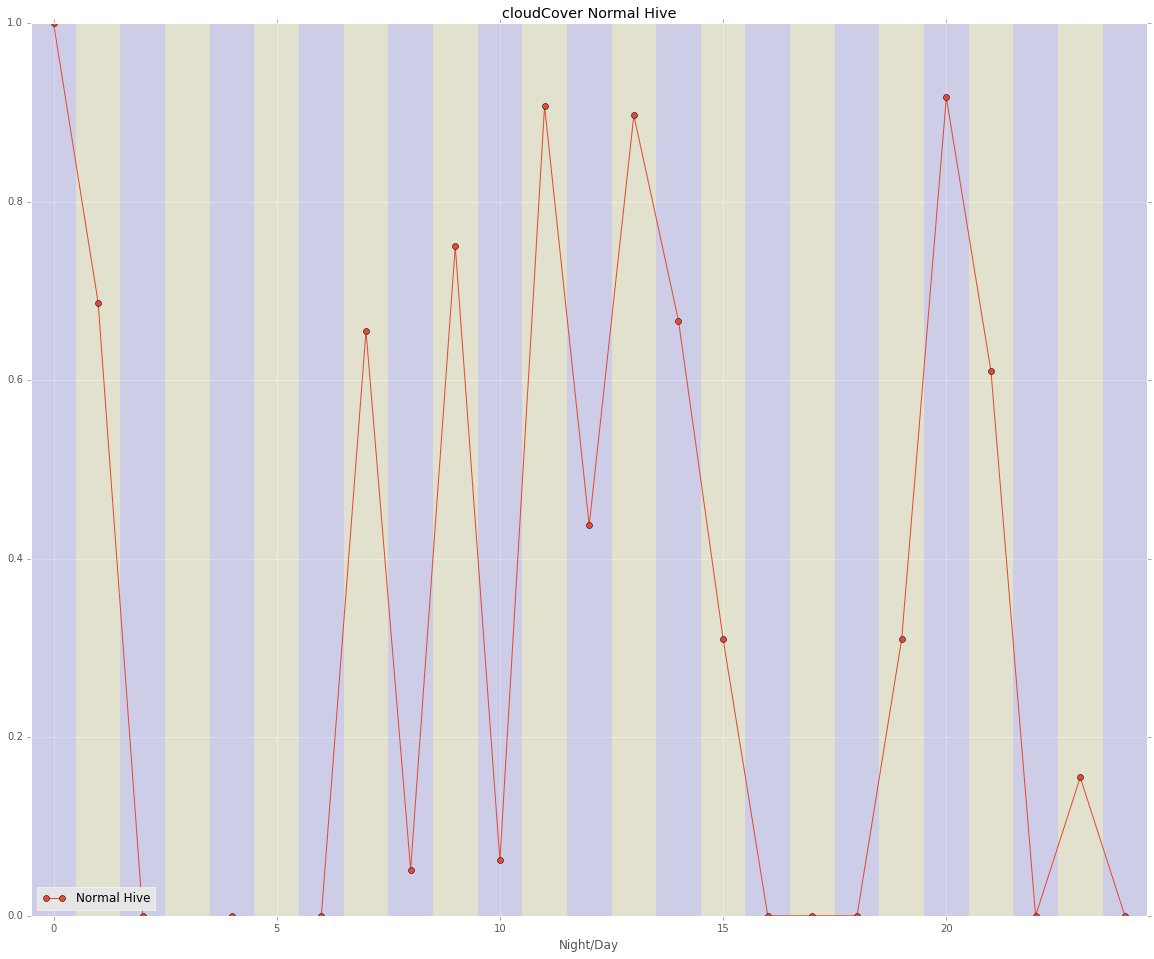

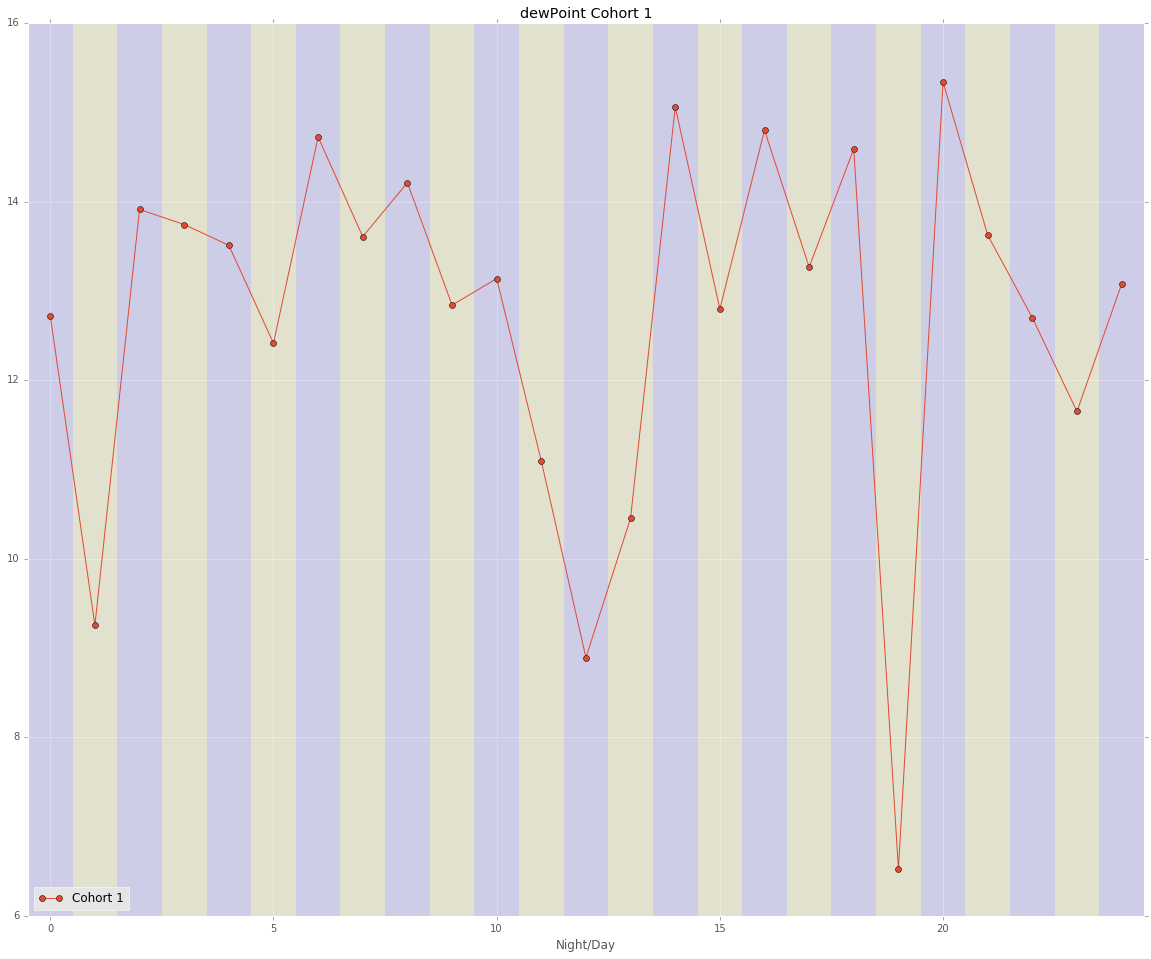

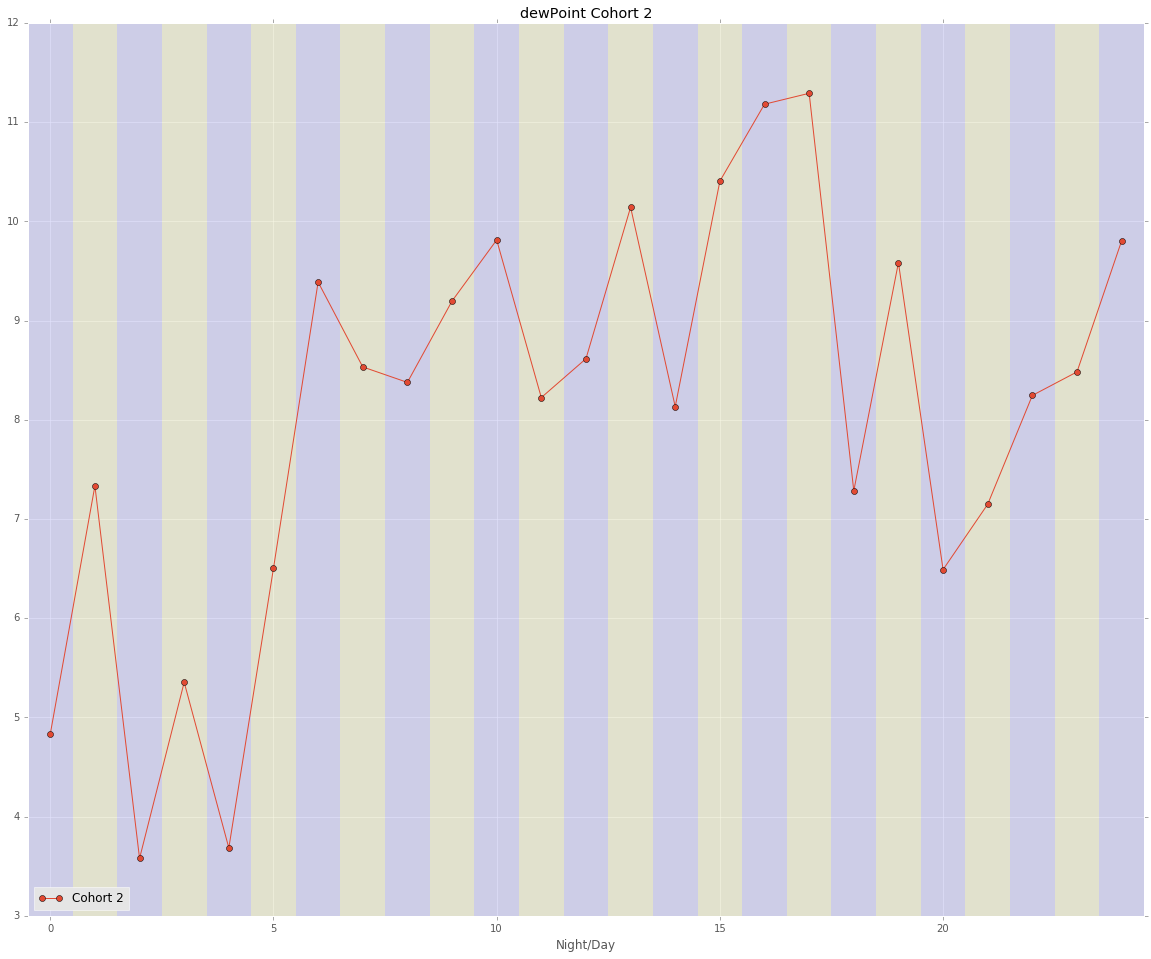

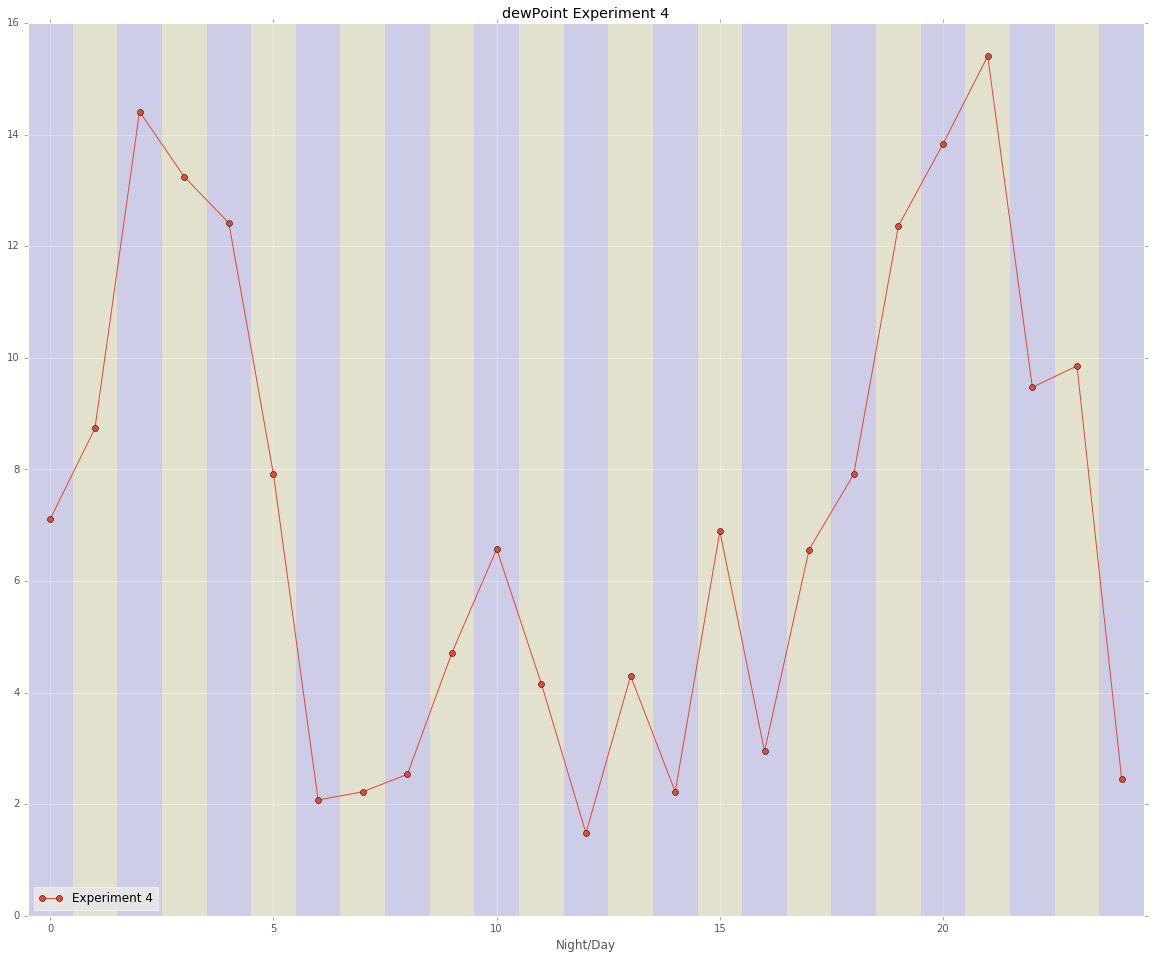

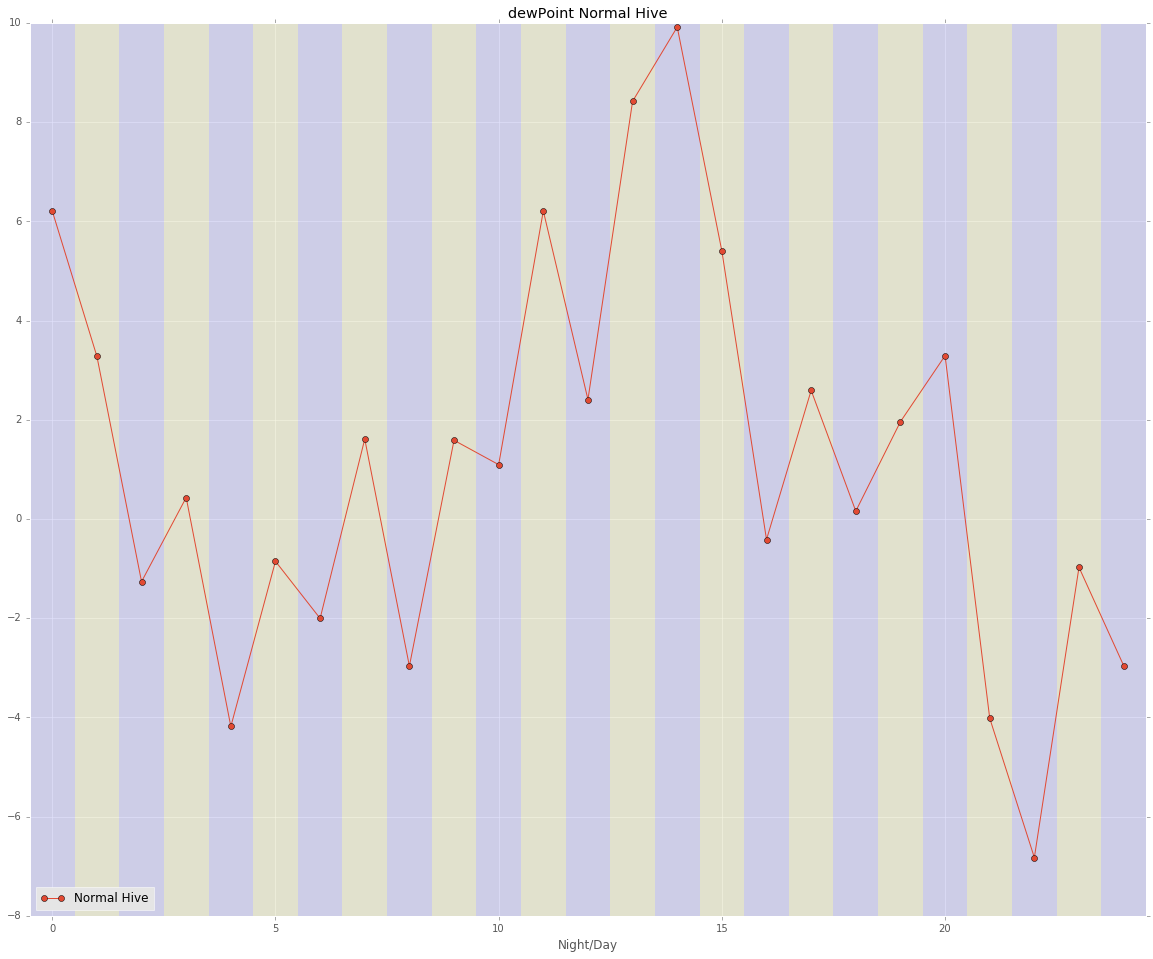

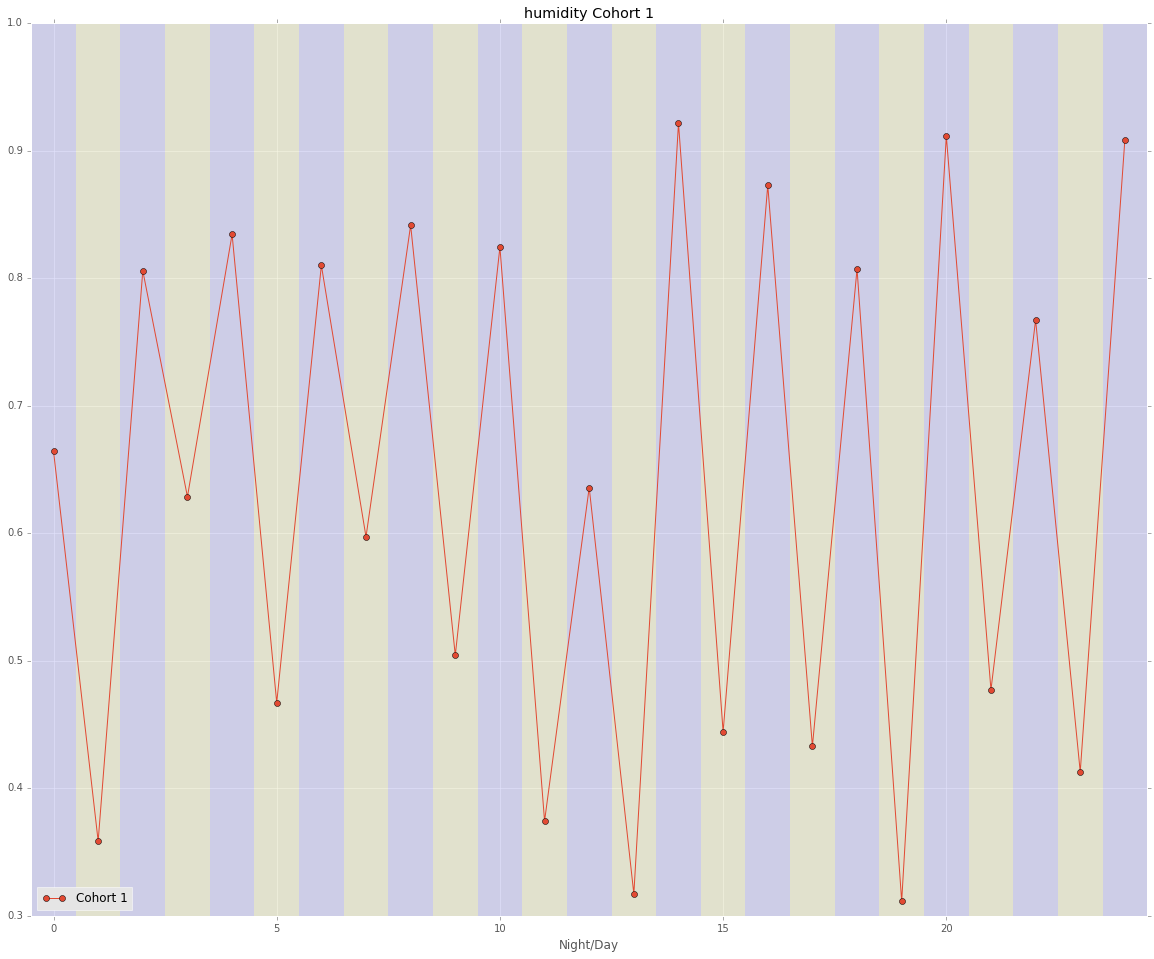

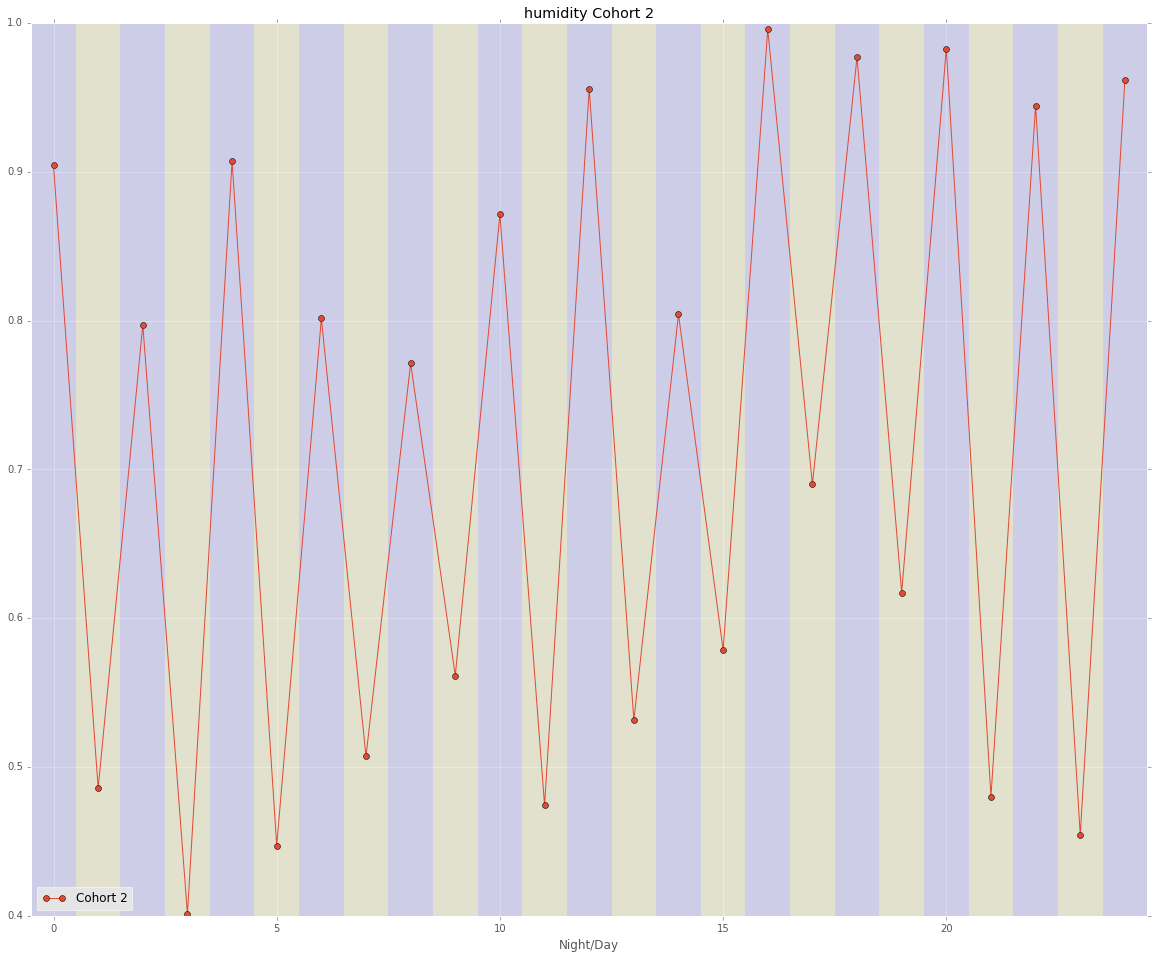

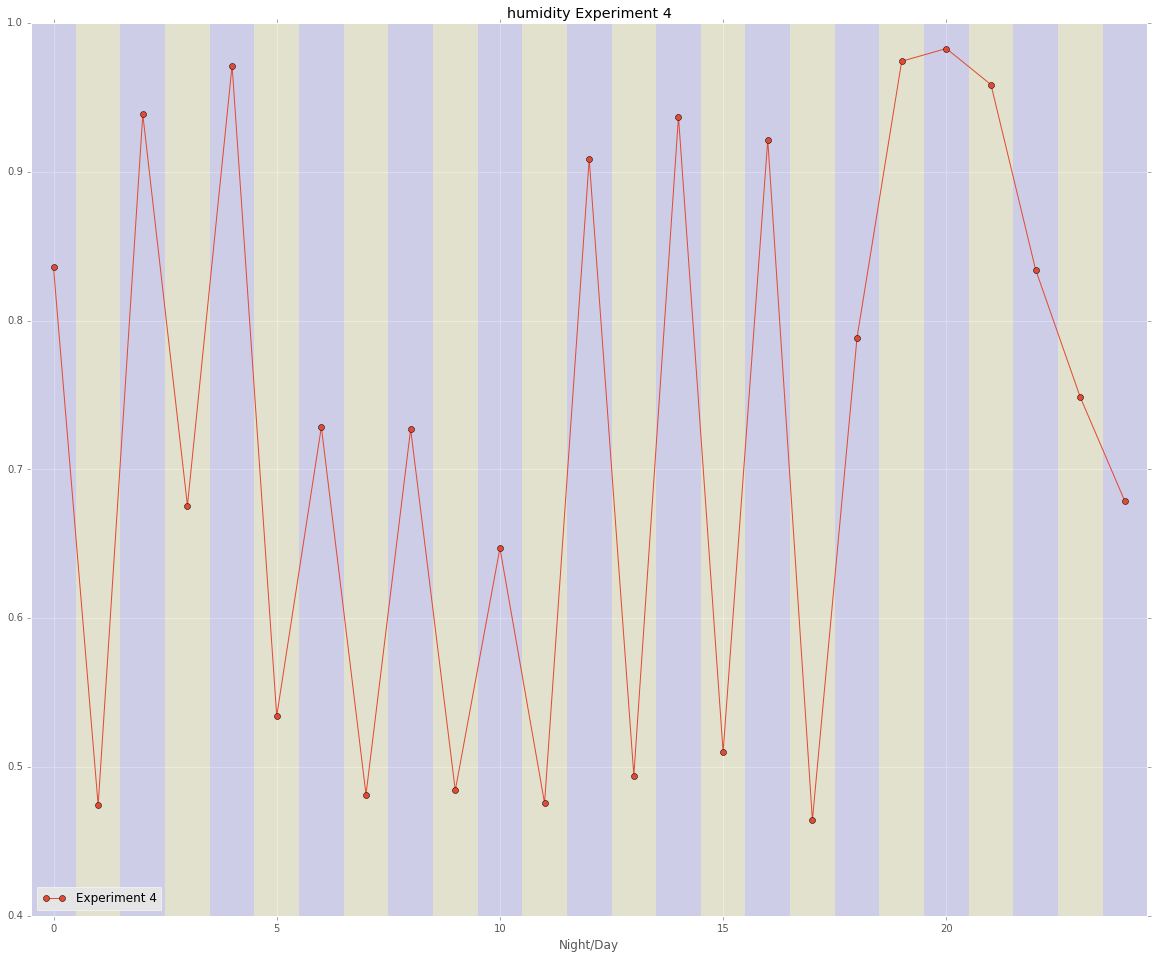

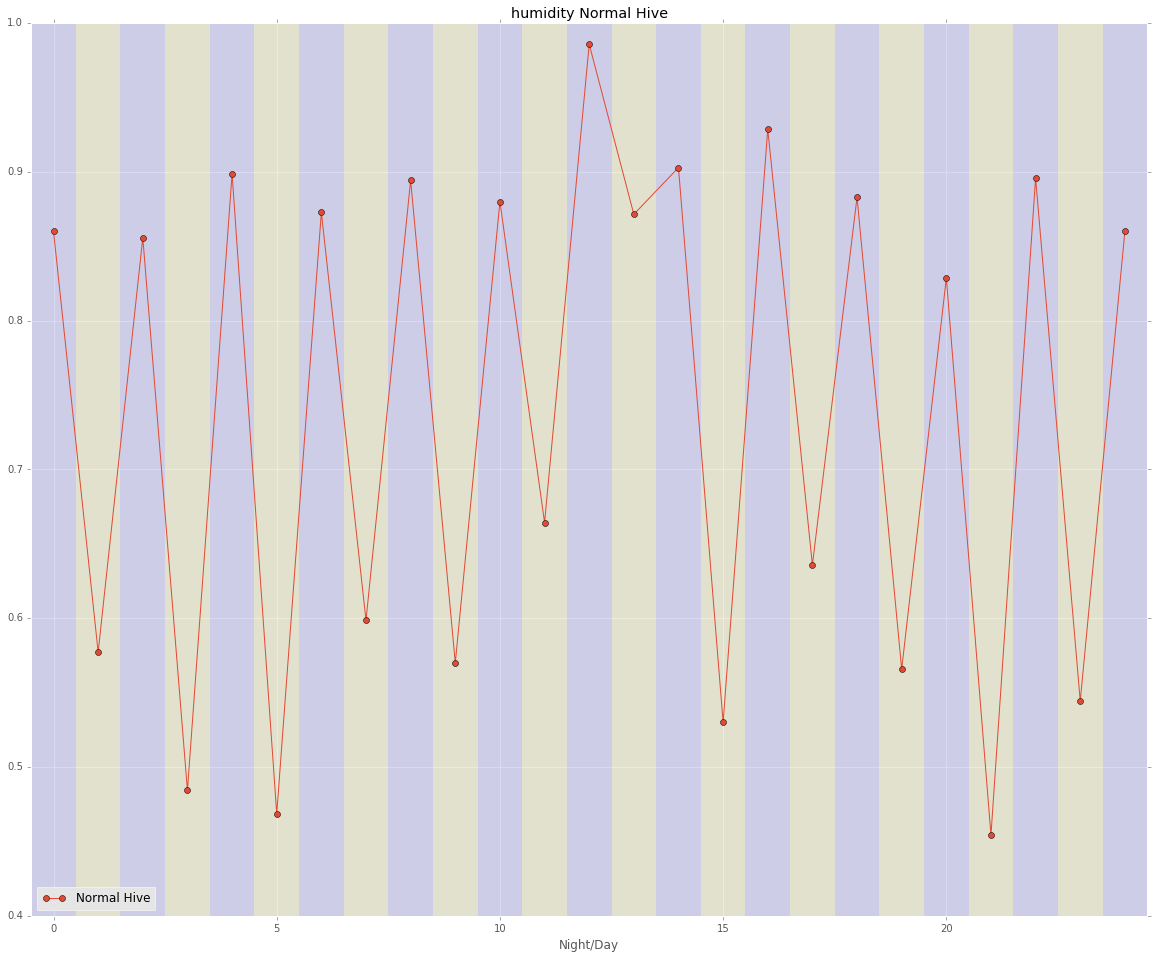

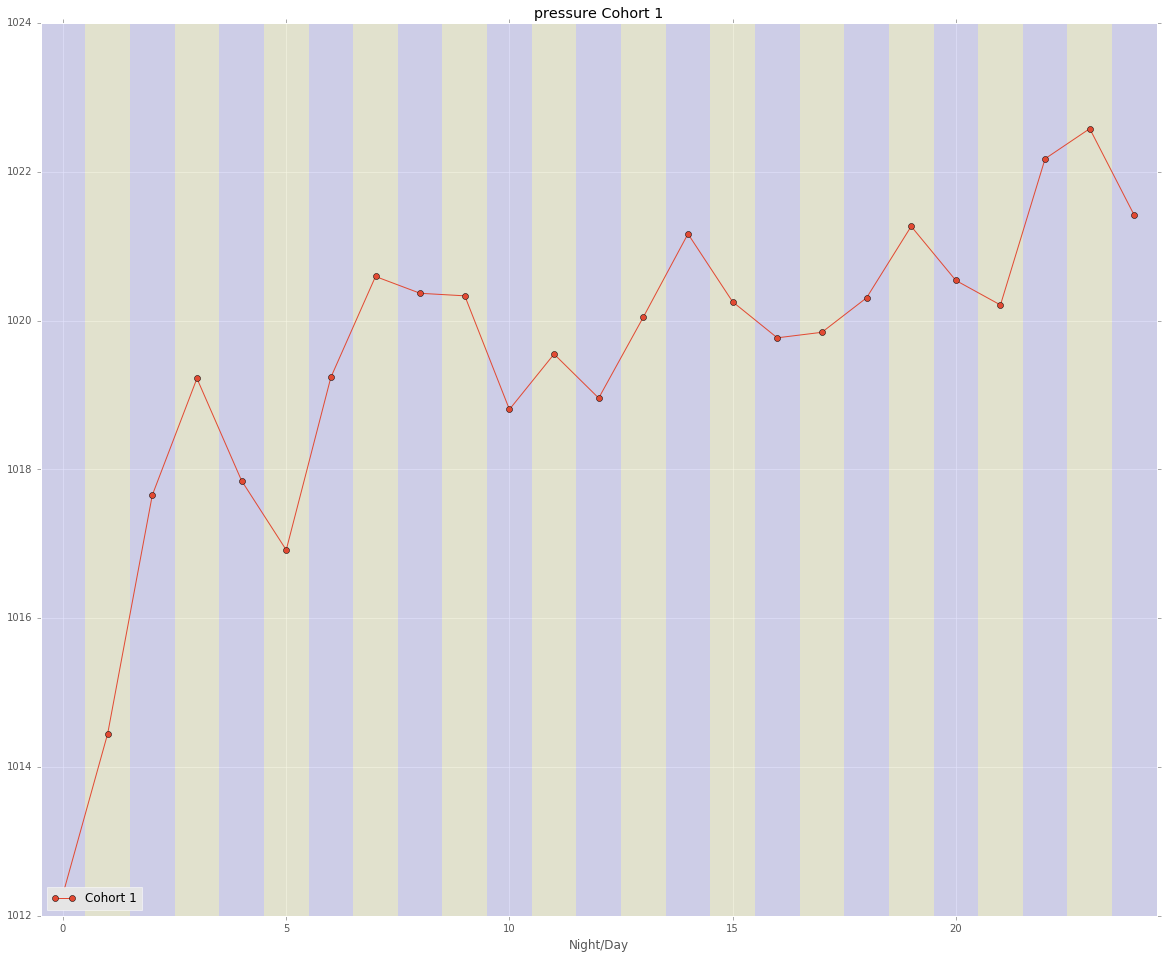

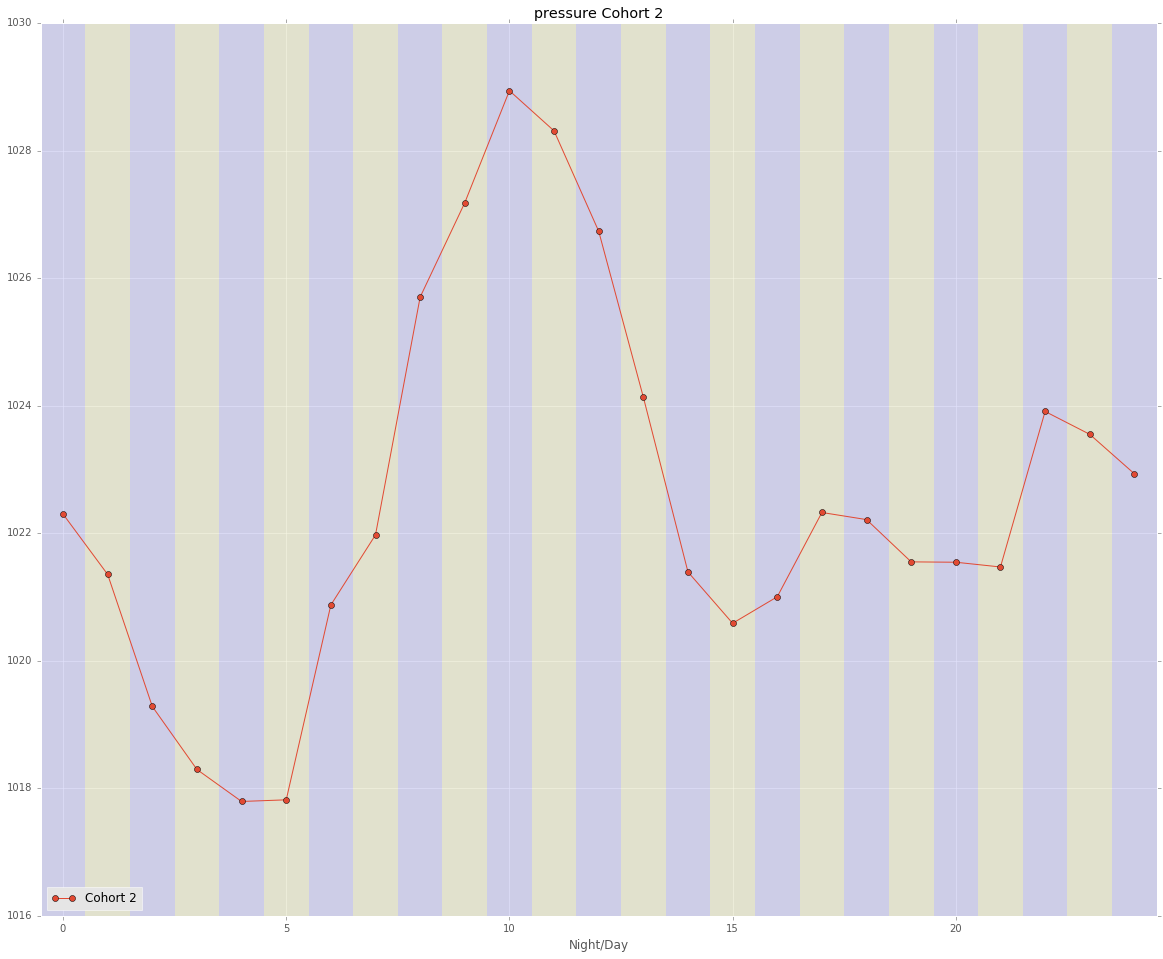

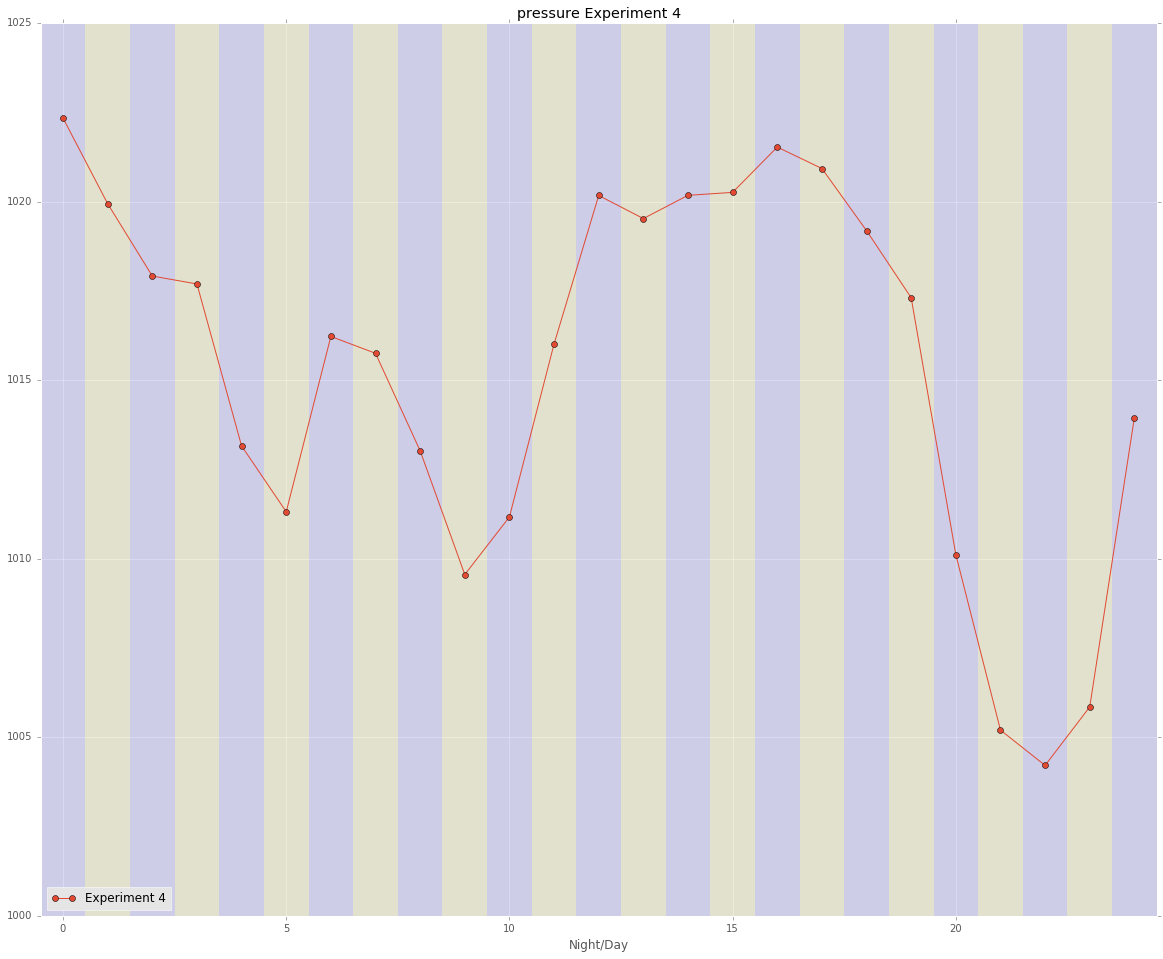

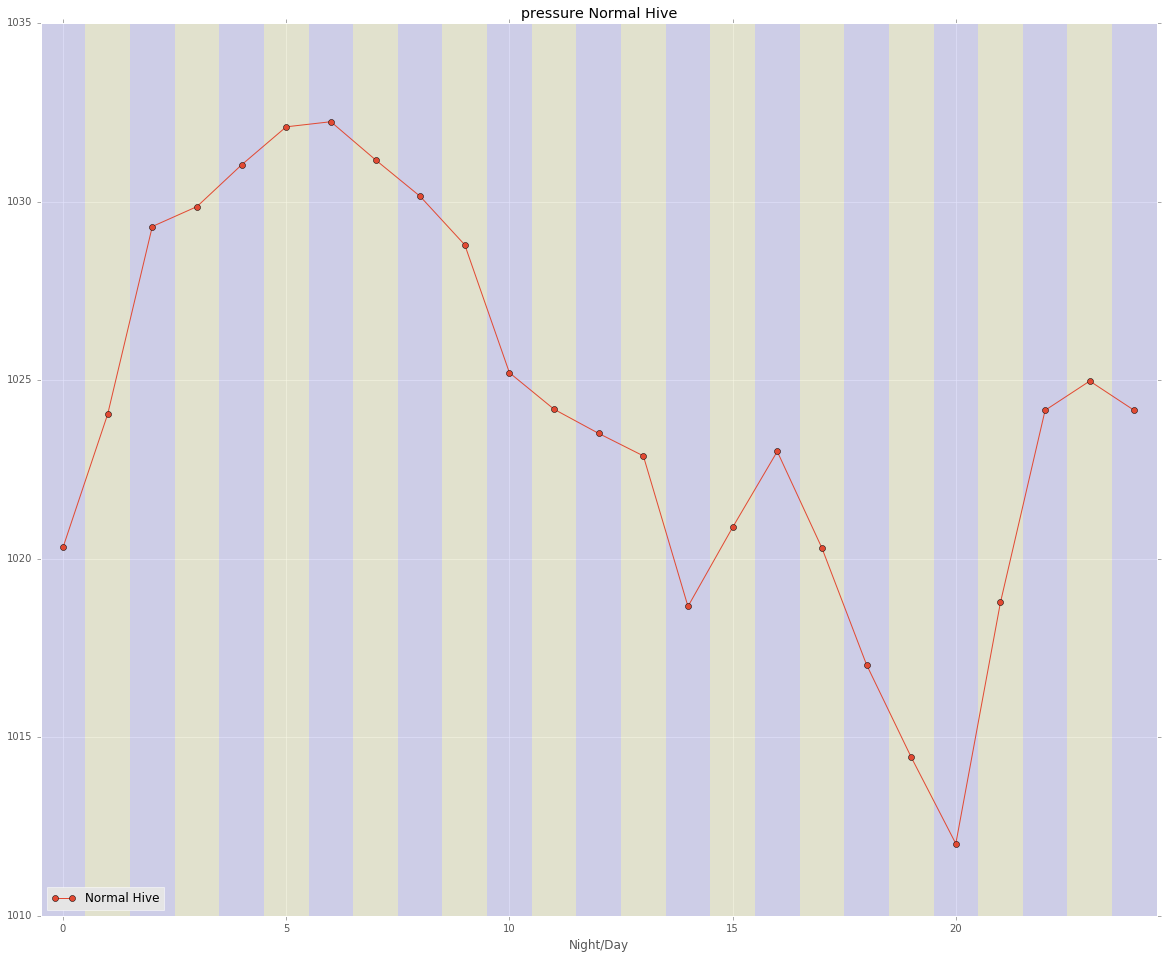

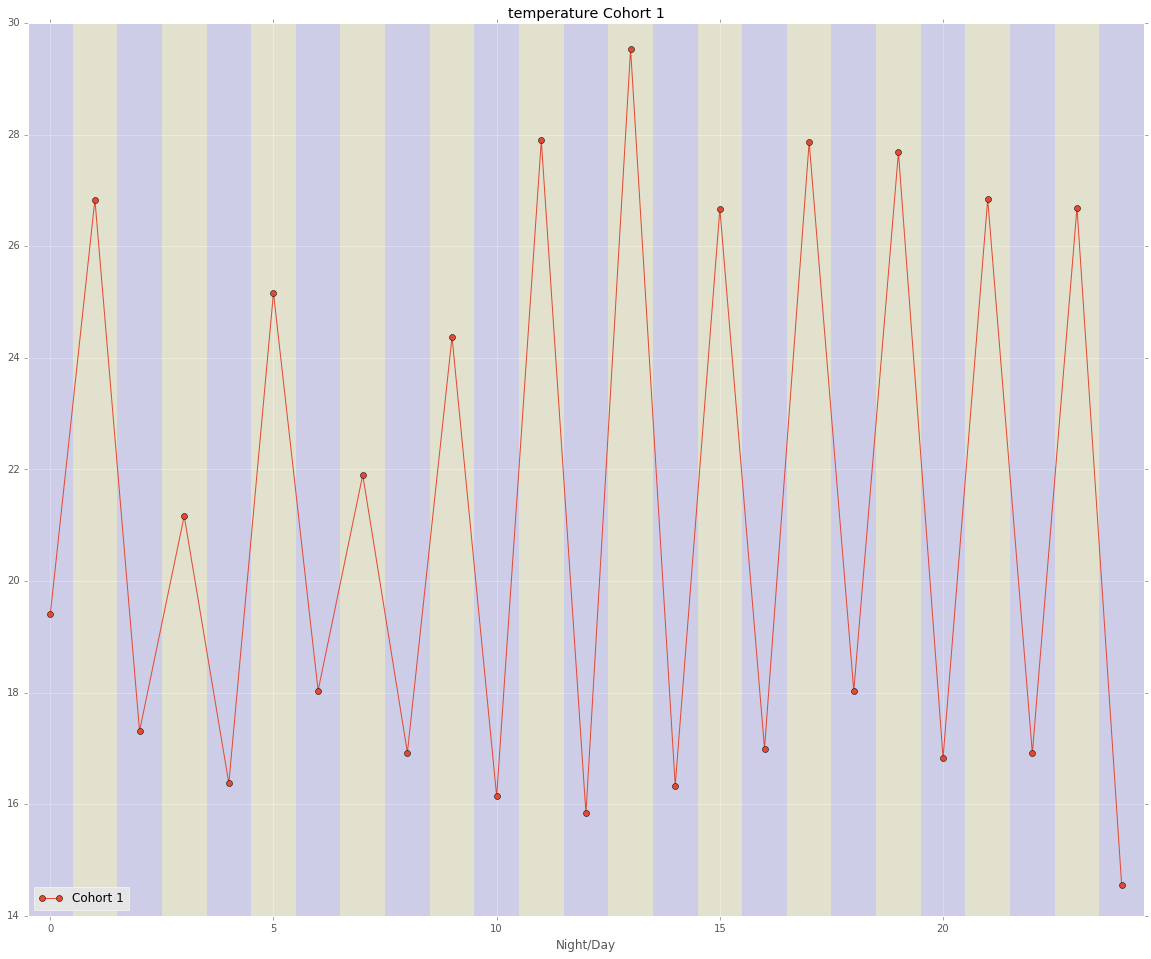

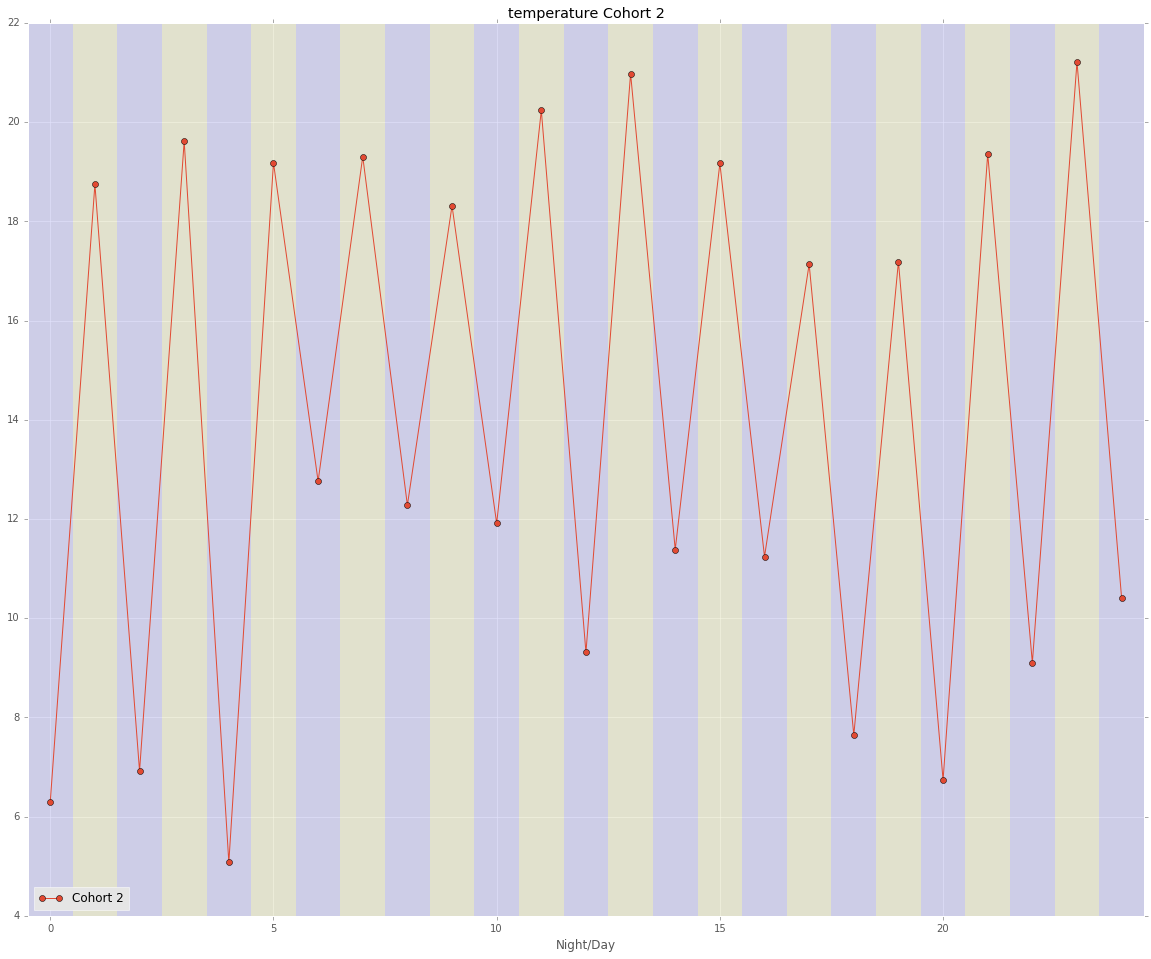

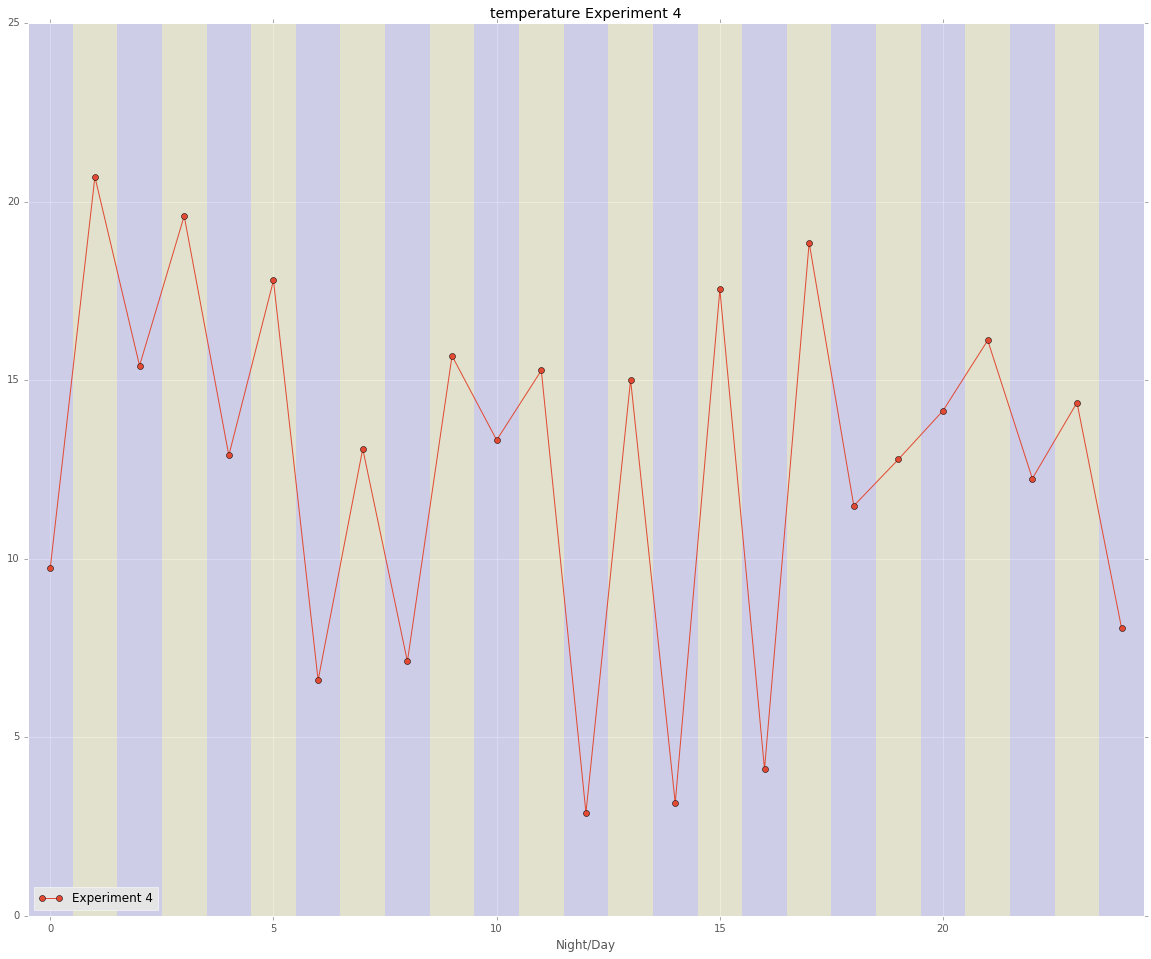

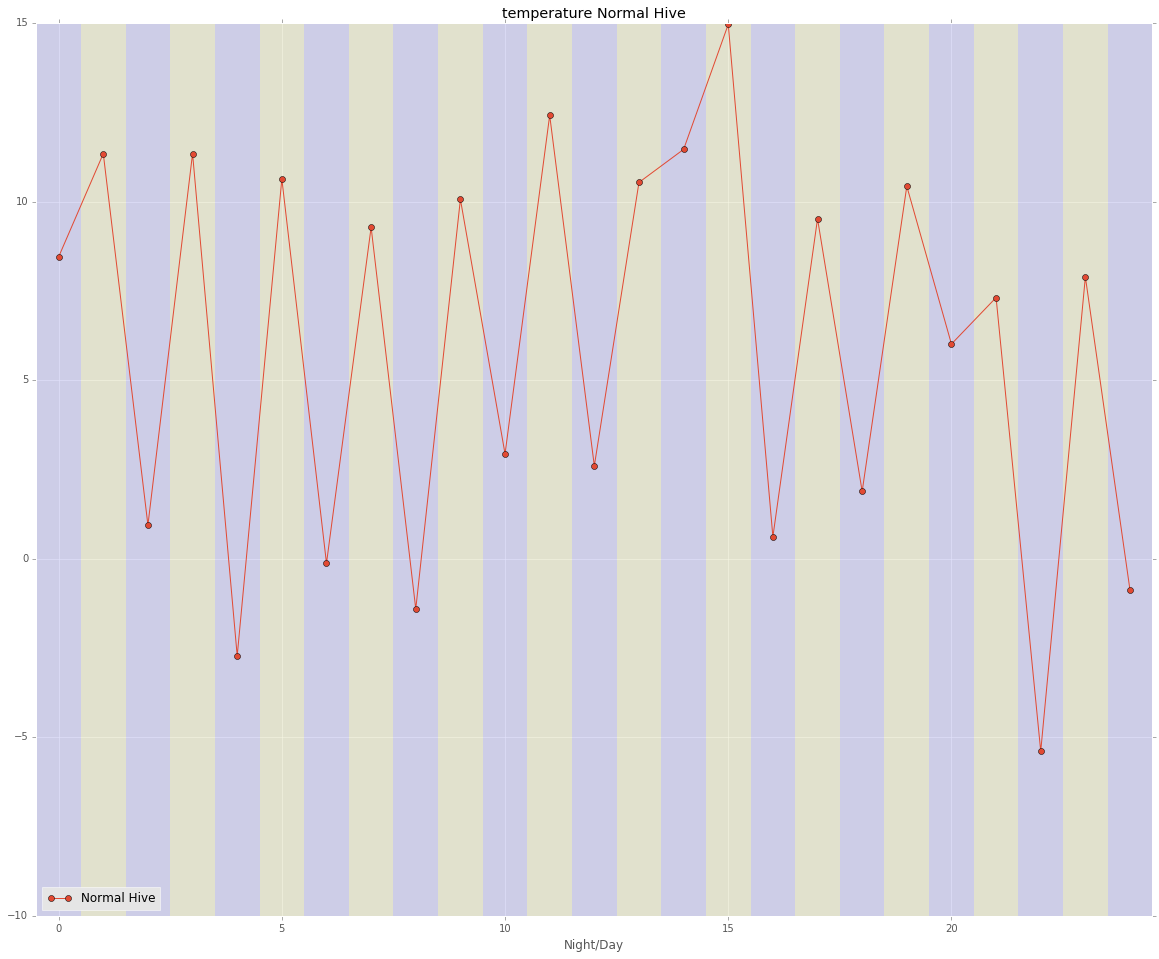

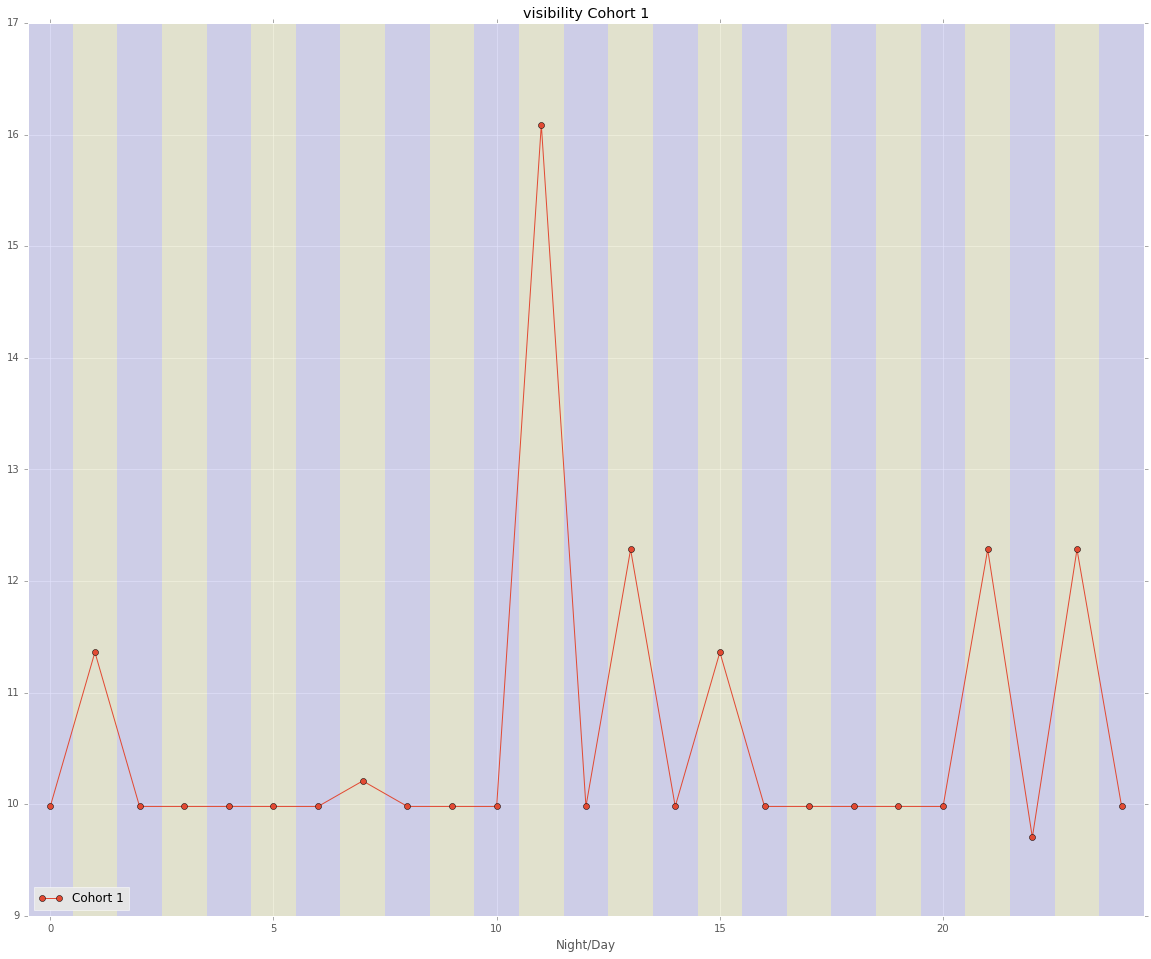

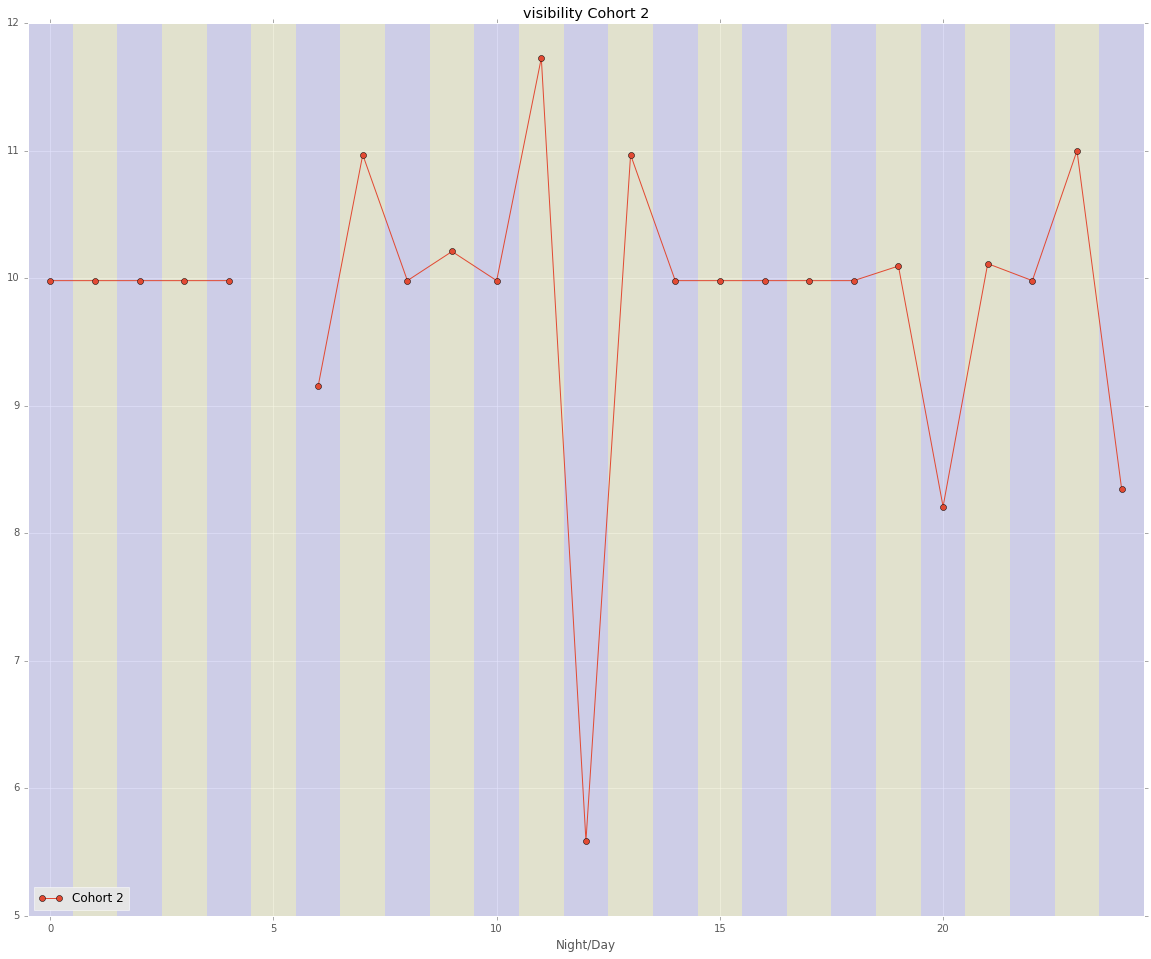

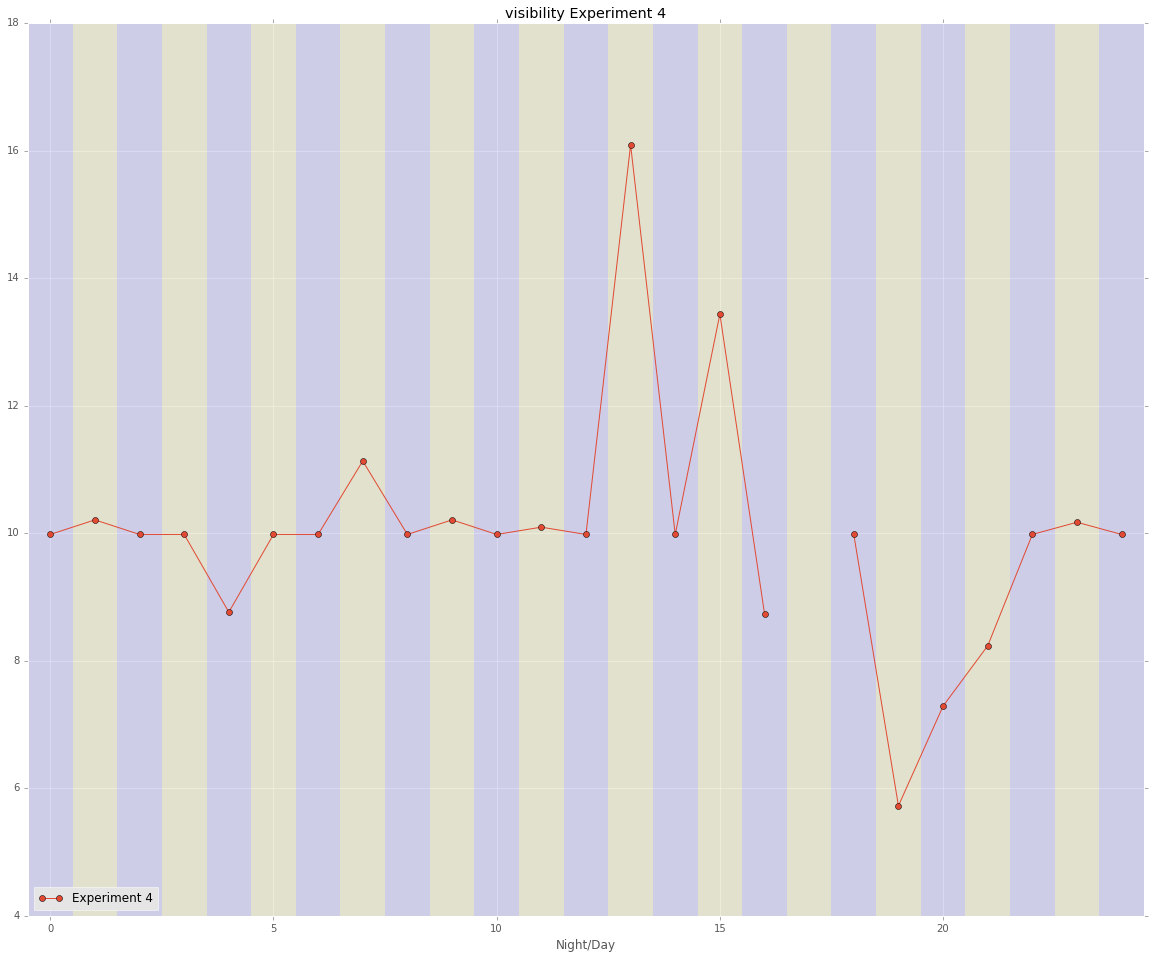

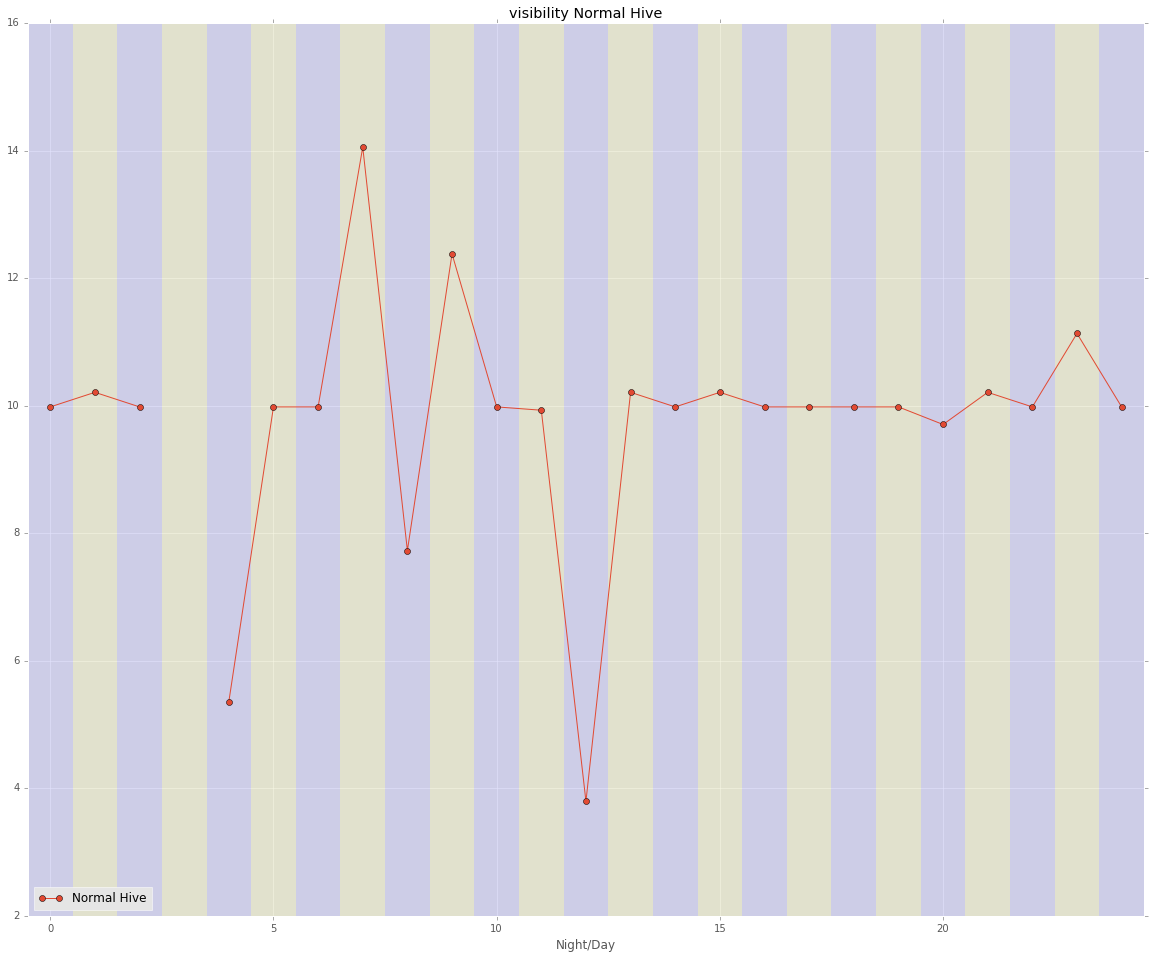

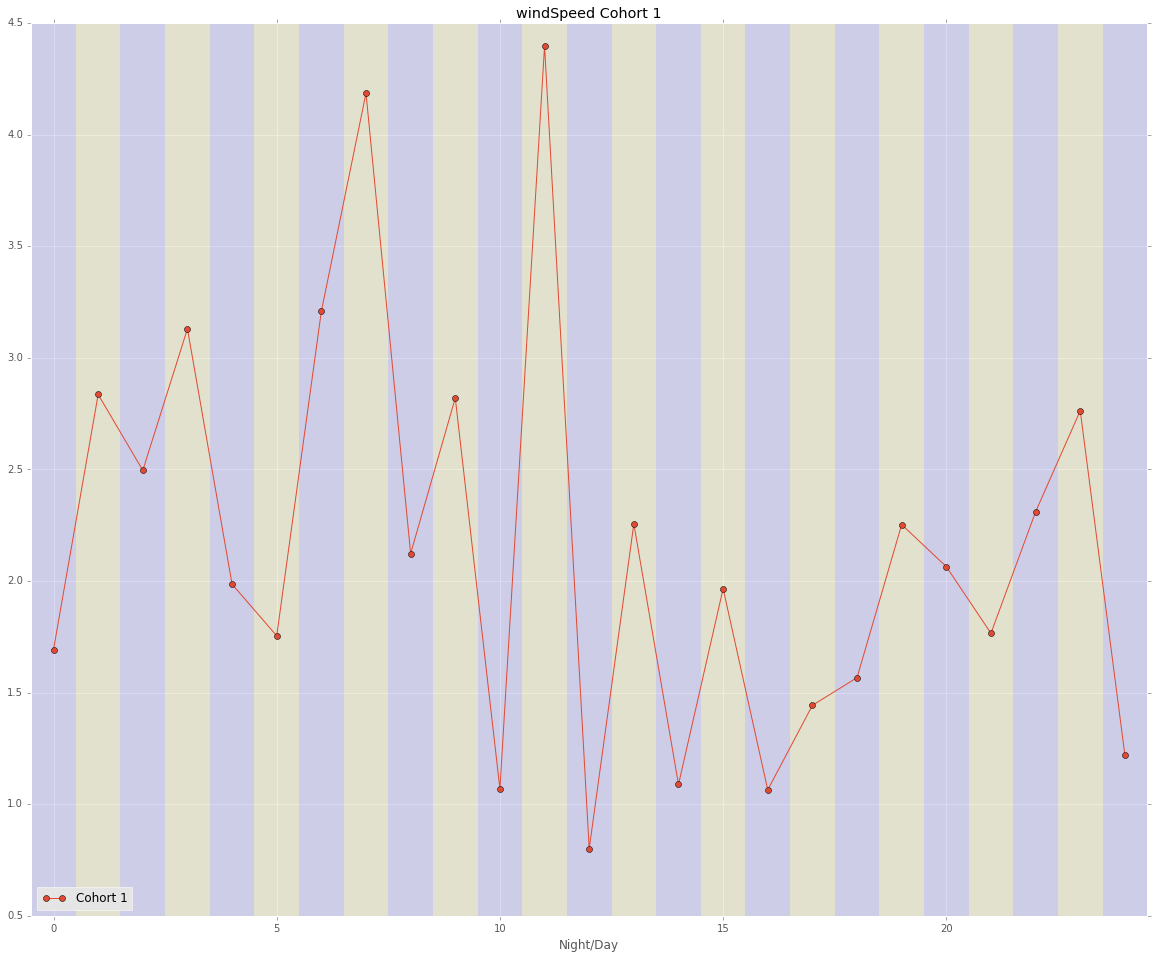

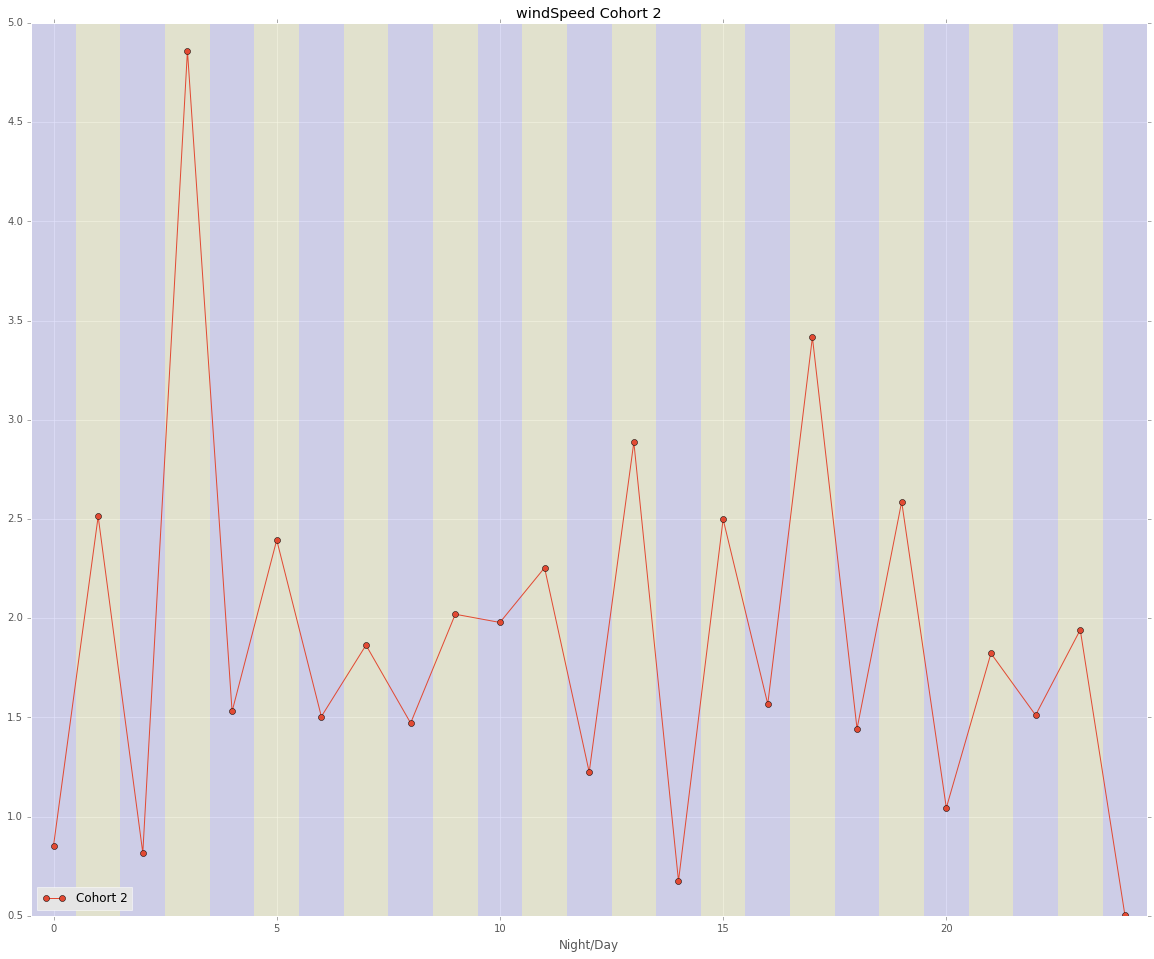

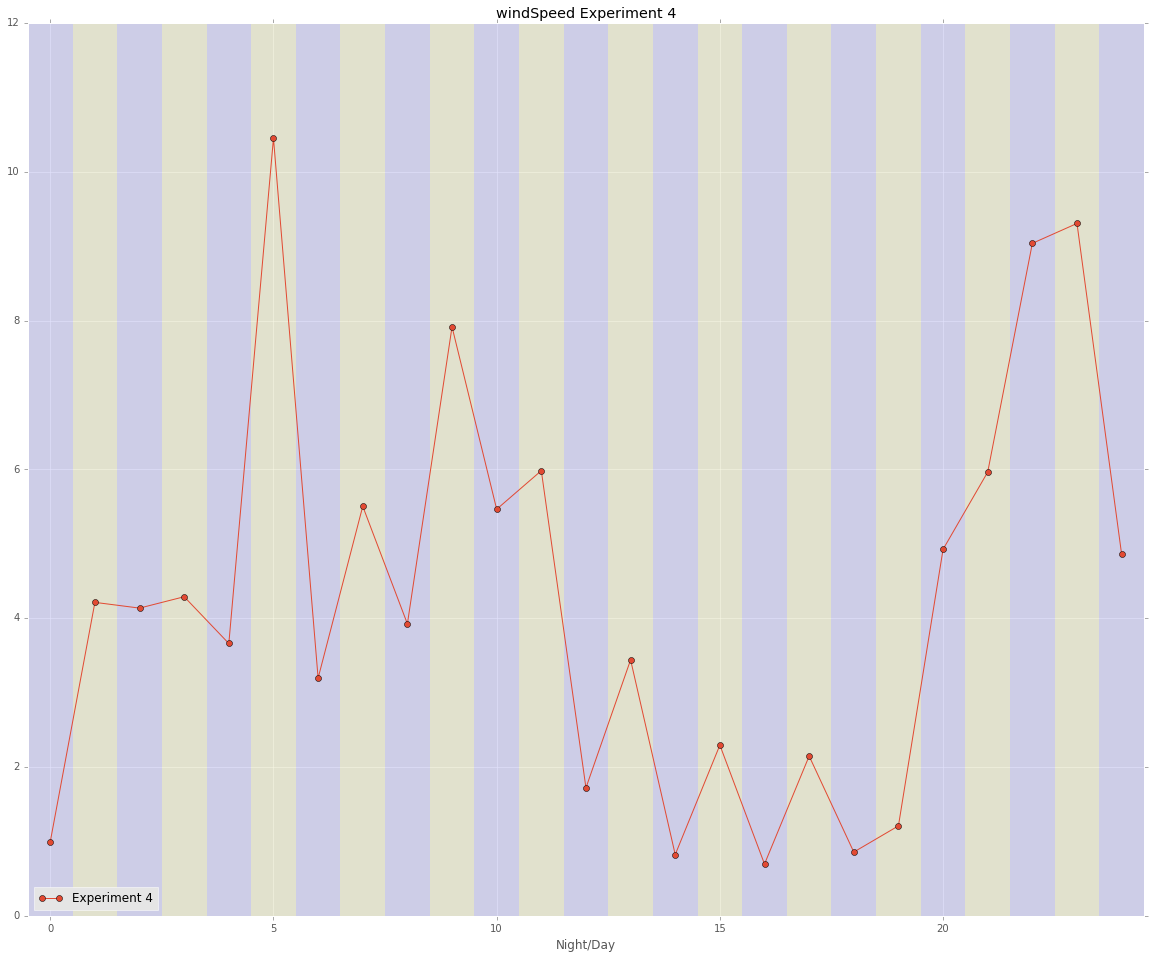

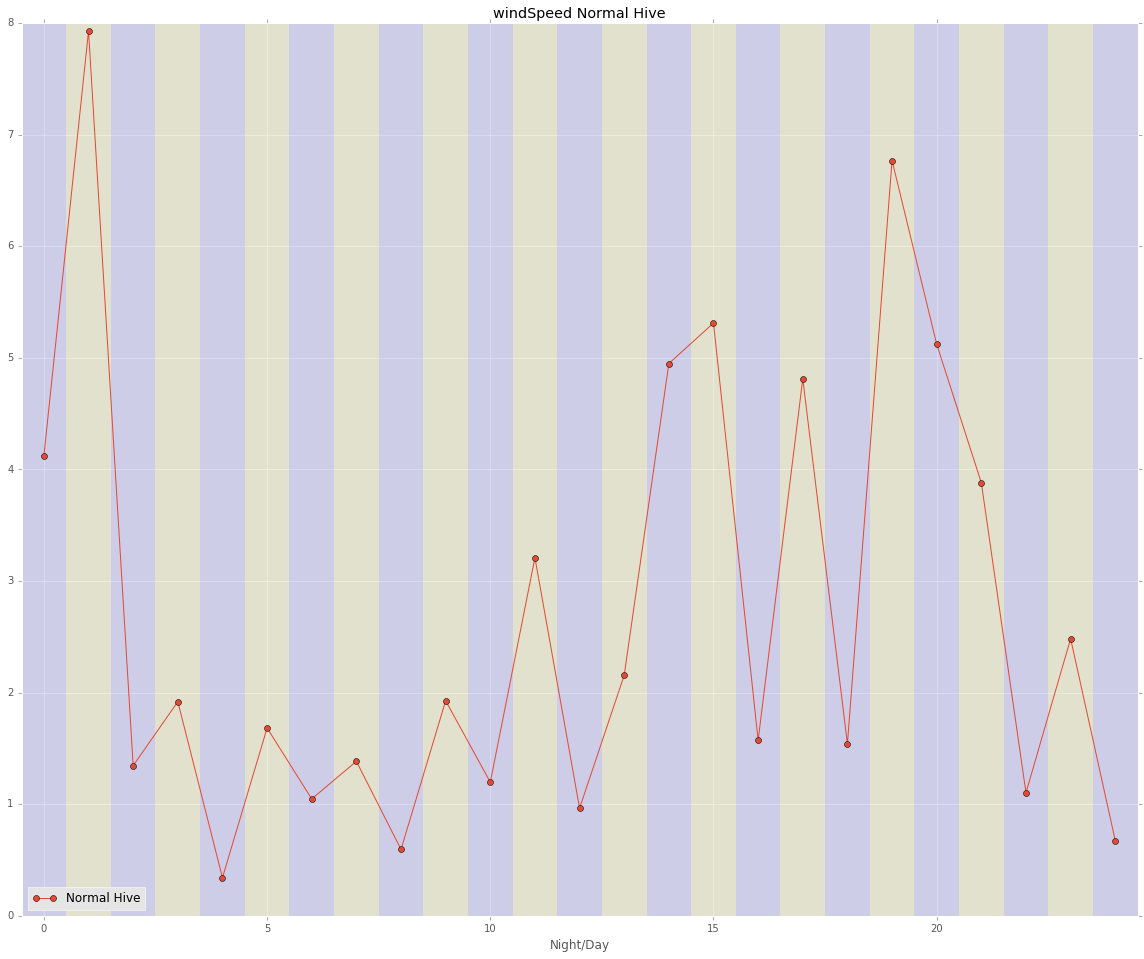

In [23]:
for metric in metrics:

    for i, df in enumerate(weather_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
        plt.title('{} {}'.format(metric, hive_names[i]))
        plt.xlabel('Night/Day')
        plt.xlim(-0.5,24.5)
        plt.legend(loc='lower left')

        for j, time_period in enumerate(weather_df_list[0]['time_period'][0:25]):
            if time_period == 'night':
                plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
            else:
                plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
        plt.show()

In [4]:
experiment_files = ['../results/2_output.csv', '../results/3_output.csv', '../results/4_output.csv', '../results/1_output.csv']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)
print(experiment_df_list[0]['result_type'].unique())

real_result_df_list = []
for df in experiment_df_list:
    real_df = df[(df['result_type'] == 'real') & (df['tag_type'] == 'All')].reset_index()
    real_result_df_list.append(real_df)

day_num                                  int64
diff_mean_all_tracked_speeds           float64
diff_mean_min_tracked_speeds           float64
diff_median_all_tracked_speeds         float64
diff_median_min_tracked_speeds         float64
diff_spread_all_tracked_all_xy         float64
diff_spread_all_tracked_individuals    float64
diff_spread_min_tracked_all_xy         float64
diff_spread_min_tracked_individuals    float64
mean_all_tracked_speeds                float64
mean_min_tracked_speeds                float64
median_all_tracked_speeds              float64
median_min_tracked_speeds              float64
result_type                             object
spread_all_tracked_all_xy              float64
spread_all_tracked_individuals         float64
spread_min_tracked_all_xy              float64
spread_min_tracked_individuals         float64
tag_type                                object
time_period                             object
dtype: object
['real']


In [35]:
real_result_df_list[0].head()

index  day_num  diff_mean_all_tracked_speeds  diff_mean_min_tracked_speeds  \
0      8        0                      3.727570                      3.732812   
1      9        0                           NaN                           NaN   
2     18        1                      0.031370                      0.034699   
3     19        1                           NaN                           NaN   
4     28        2                      1.294042                      1.279400   

   diff_median_all_tracked_speeds  diff_median_min_tracked_speeds  \
0                        3.911097                        3.911097   
1                             NaN                             NaN   
2                        0.037521                        0.042318   
3                             NaN                             NaN   
4                        0.685316                        0.694592   

   diff_spread_all_tracked_all_xy  diff_spread_all_tracked_individuals  \
0                        0.865246                             1.072089   
1                             NaN                                  NaN   
2                        0.977143                             0.842084   
3                             NaN                                  NaN   
4                        0.744163                             0.206532   

   diff_spread_min_tracked_all_xy  diff_spread_min_tracked_individuals  \
0                        0.862737                             1.055480   
1                             NaN                                  NaN   
2                        0.972497                             0.788955   
3                             NaN                                  NaN   
4                        0.746035                             0.199220   

      ...      mean_min_tracked_speeds  median_all_tracked_speeds  \
0     ...                     7.873158                   3.605551   
1     ...                    11.605970                   7.516648   
2     ...                    11.629456                   7.826238   
3     ...                    11.664155                   7.788717   
4     ...                    10.885291                   7.245044   

   median_min_tracked_speeds  result_type spread_all_tracked_all_xy  \
0                   3.605551         real                 10.184953   
1                   7.516648         real                  9.319706   
2                   7.826238         real                 10.127591   
3                   7.783920         real                 11.104734   
4                   7.211103         real                 11.333139   

   spread_all_tracked_individuals  spread_min_tracked_all_xy  \
0                       10.469189                  10.174605   
1                        9.397101                   9.311868   
2                       10.040519                  10.124454   
3                       10.882603                  11.096950   
4                       11.174720                  11.323622   

   spread_min_tracked_individuals  tag_type time_period  
0                       10.311756       All       night  
1                        9.256276       All         day  
2                        9.976552       All       night  
3                       10.765507       All         day  
4                       11.065927       All       night  

[5 rows x 21 columns]

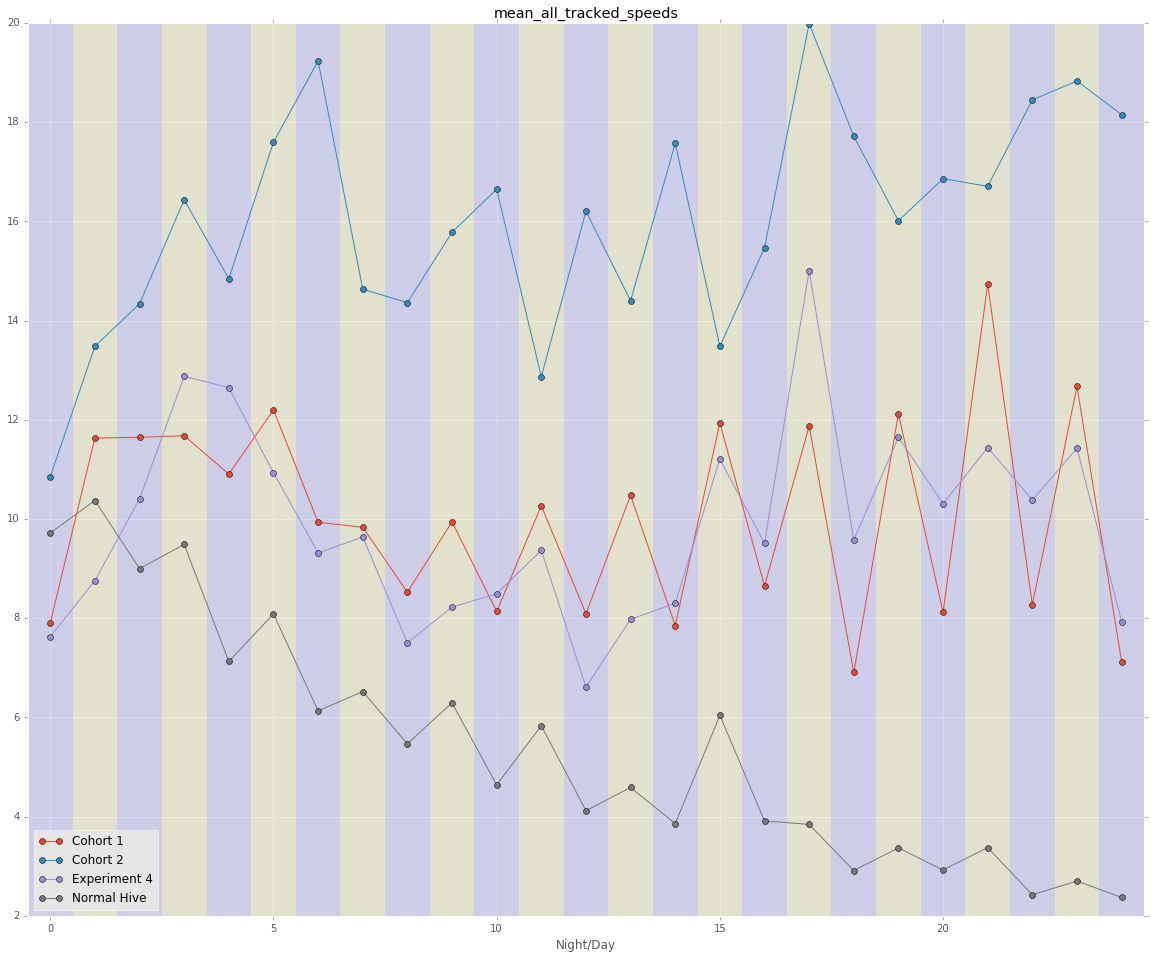

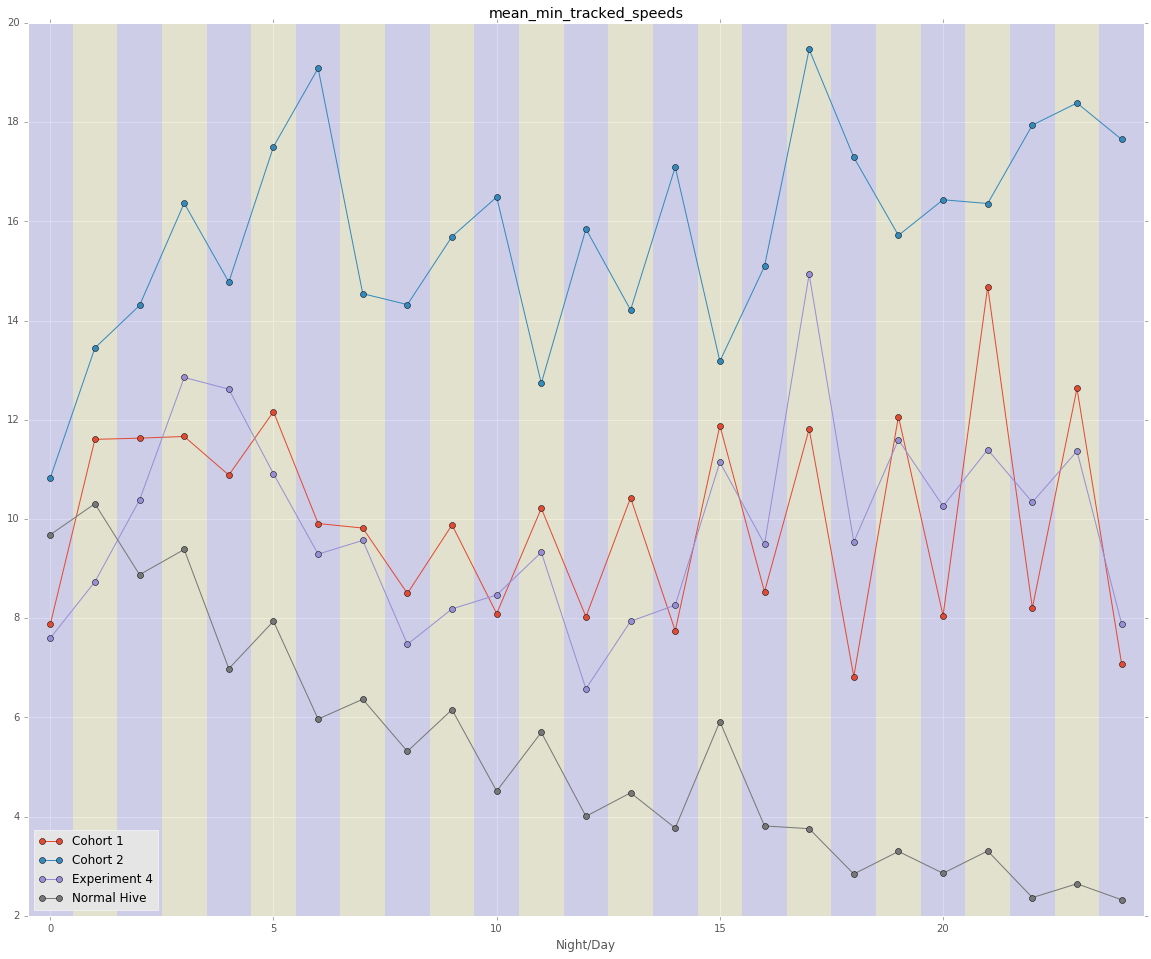

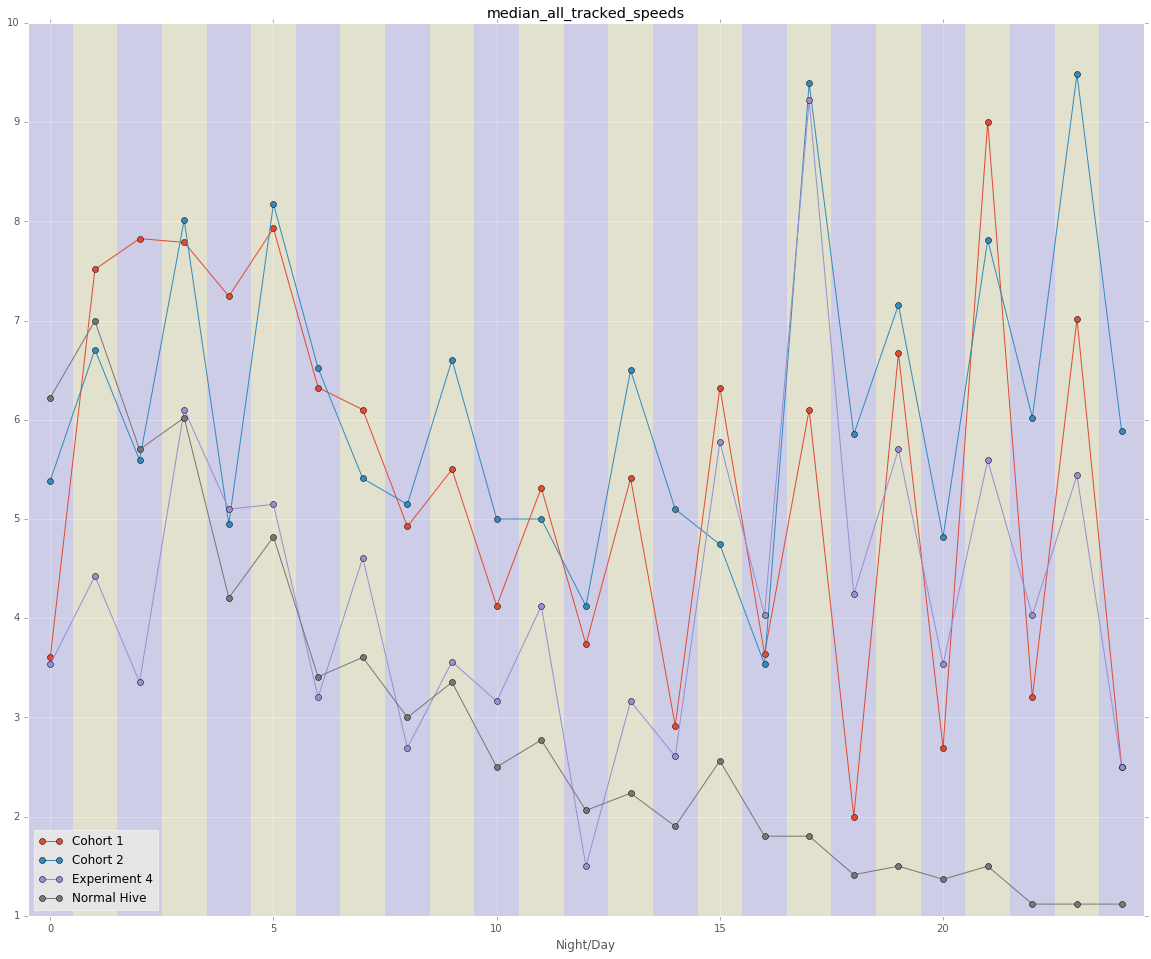

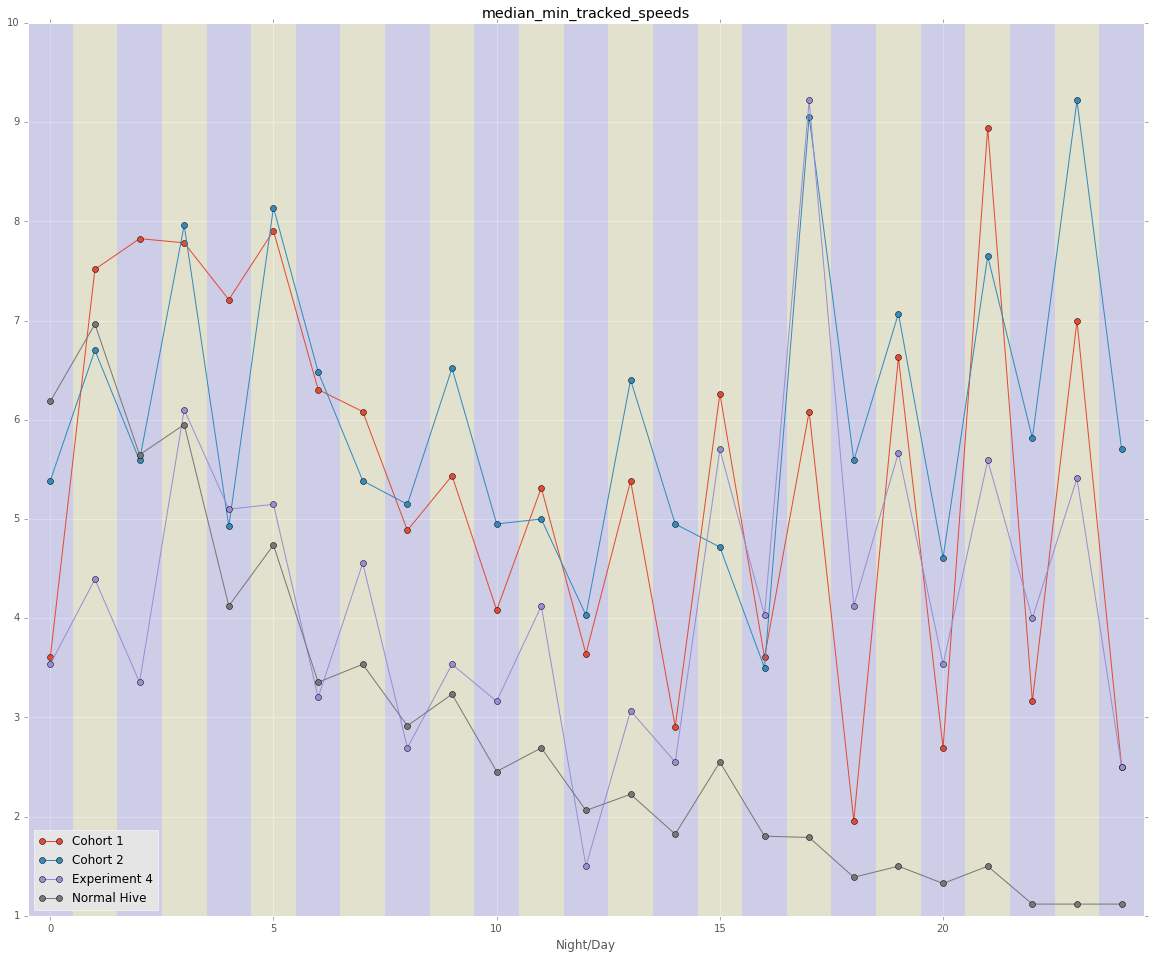

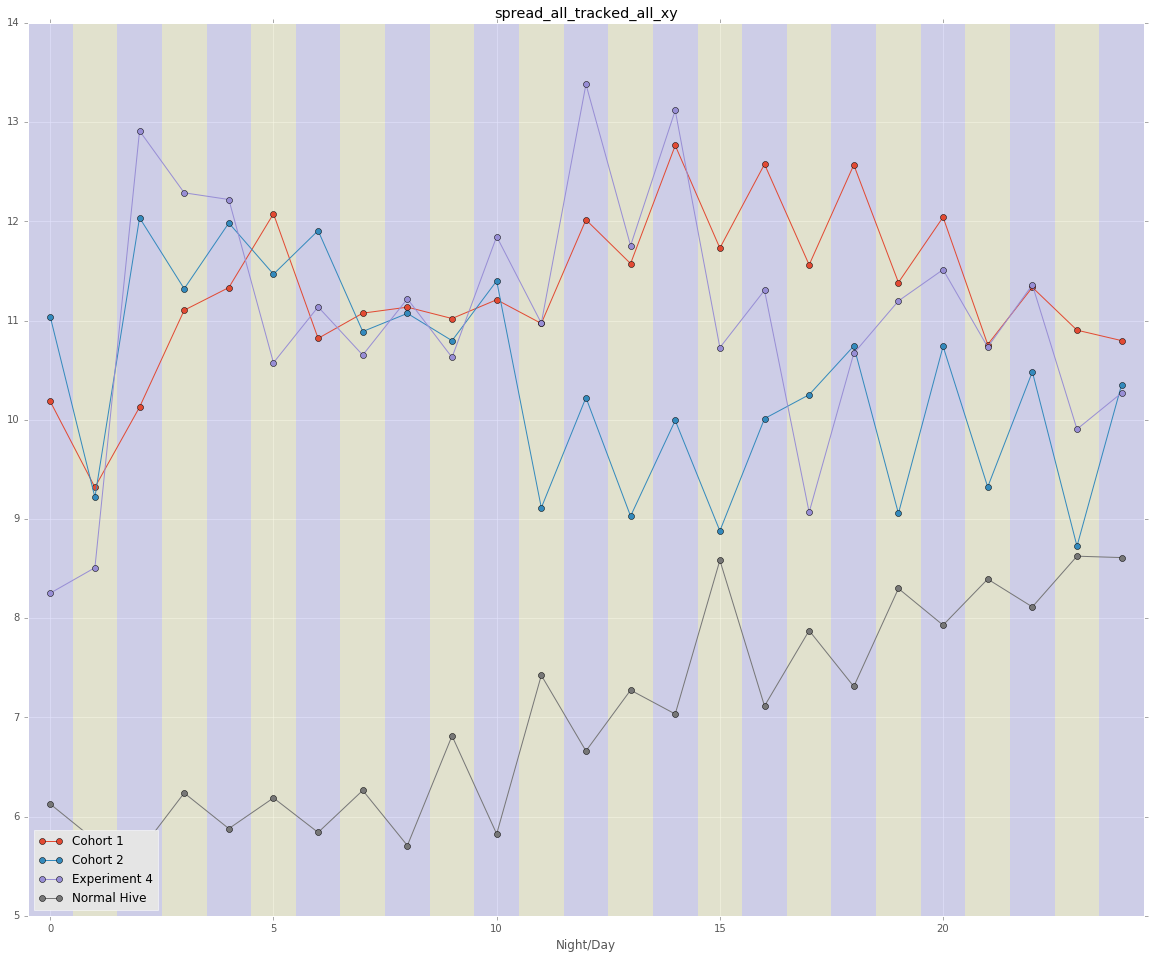

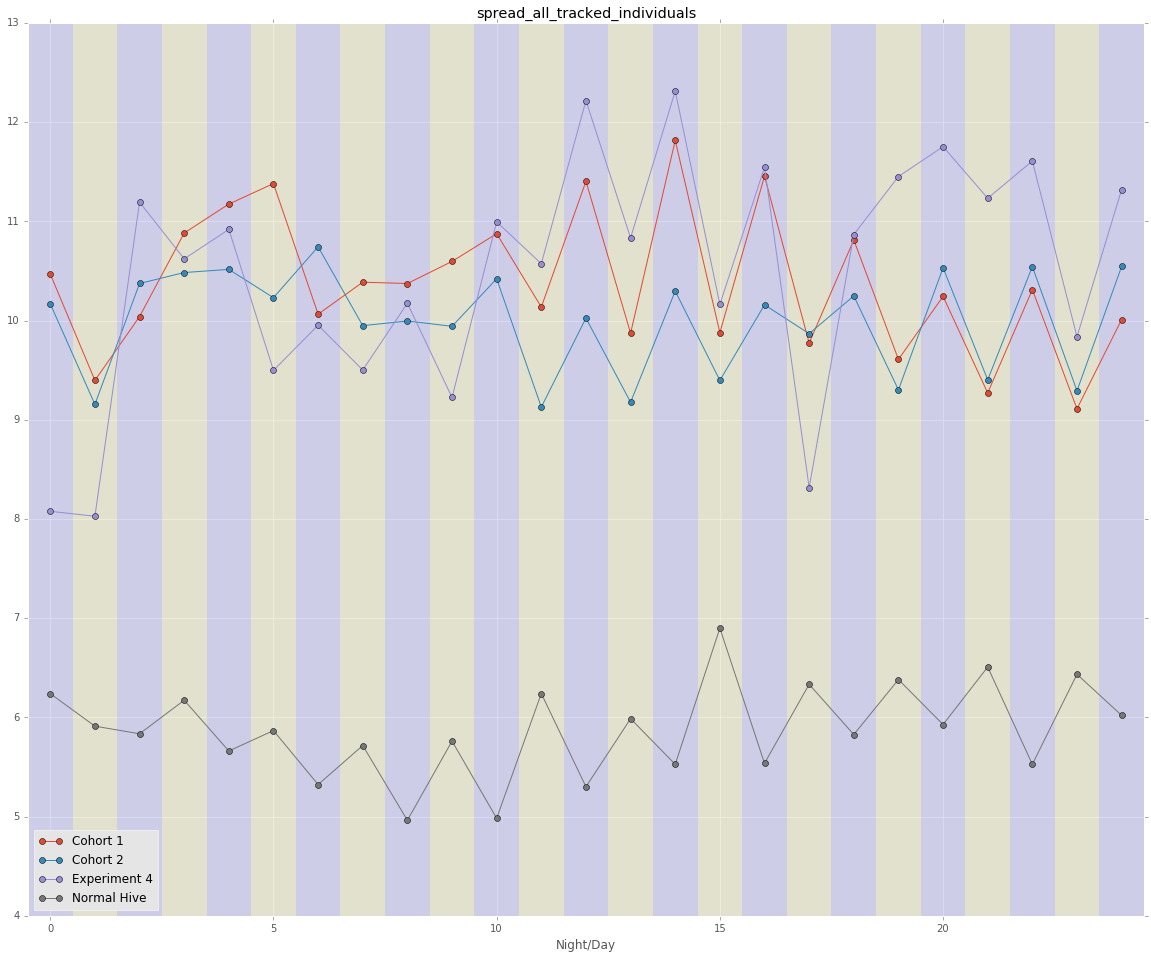

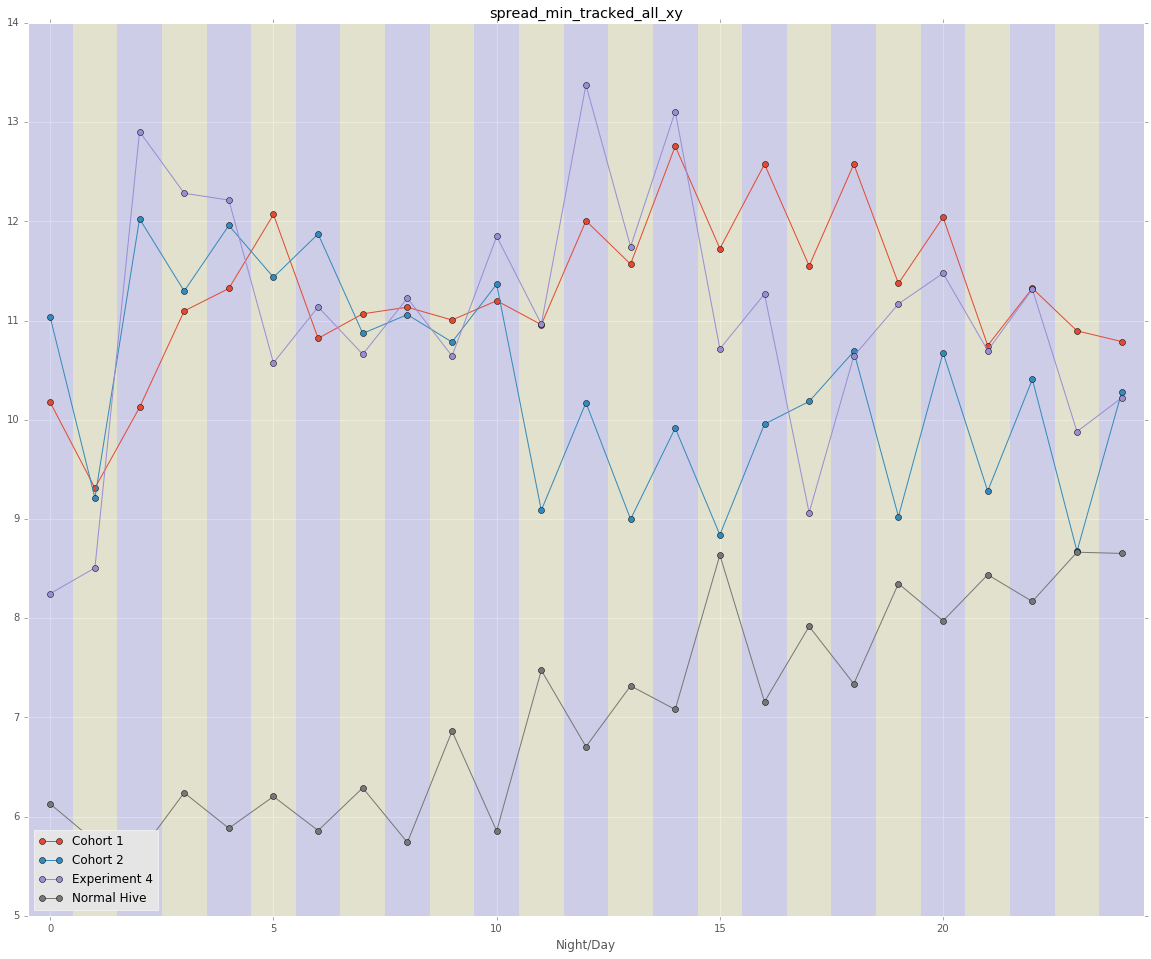

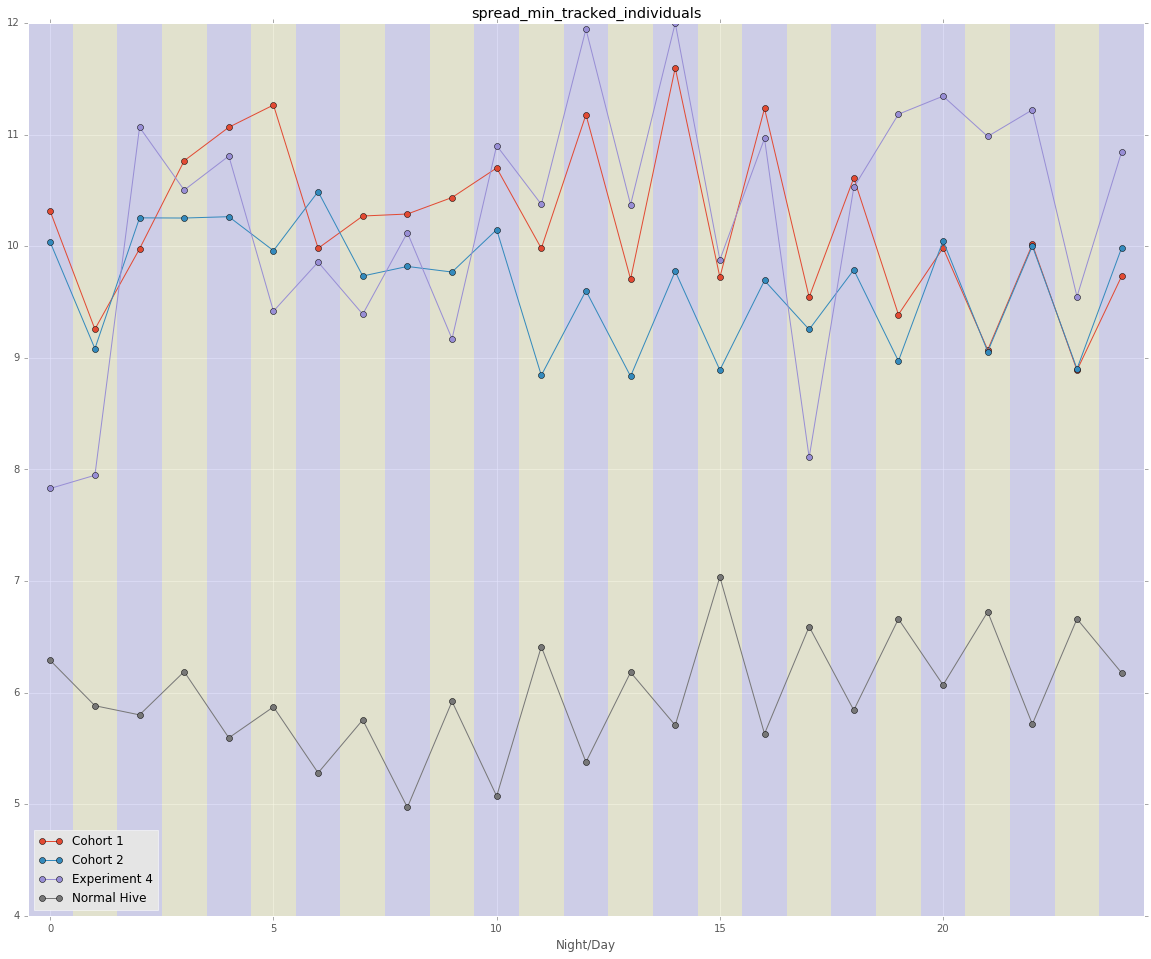

In [5]:
extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']

for metric in extended_metrics:

    for i, df in enumerate(real_result_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

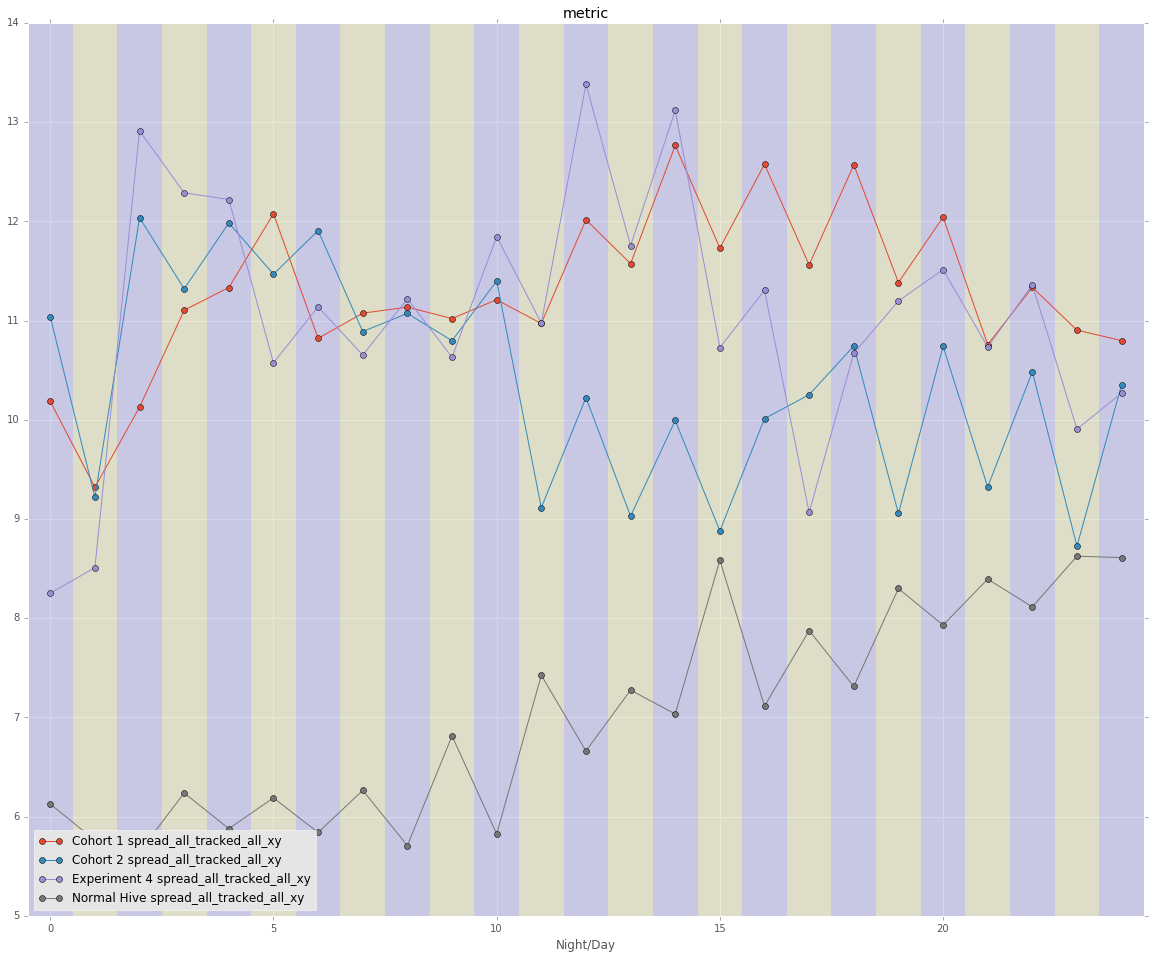

In [40]:
for i, df in enumerate(real_result_df_list):
    #plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'mean_all_tracked_speeds'))
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'spread_all_tracked_all_xy'))
    
    #plt.plot(weather_df_list[i]['temperature'][0:25], marker='o', label='temperature')
    #plt.plot(weather_df_list[i]['humidity'][0:25] * 10, marker='o', label='humidity')
    #plt.plot(weather_df_list[i]['dewPoint'][0:25], marker='o', label='dewPoint')
    #plt.plot(weather_df_list[i]['windSpeed'][0:25], marker='o', label='windSpeed')
    #plt.plot(weather_df_list[i]['cloudCover'][0:25] * 10, marker='o', label='cloudCover')
    
    plt.title('metric')
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')
plt.show()



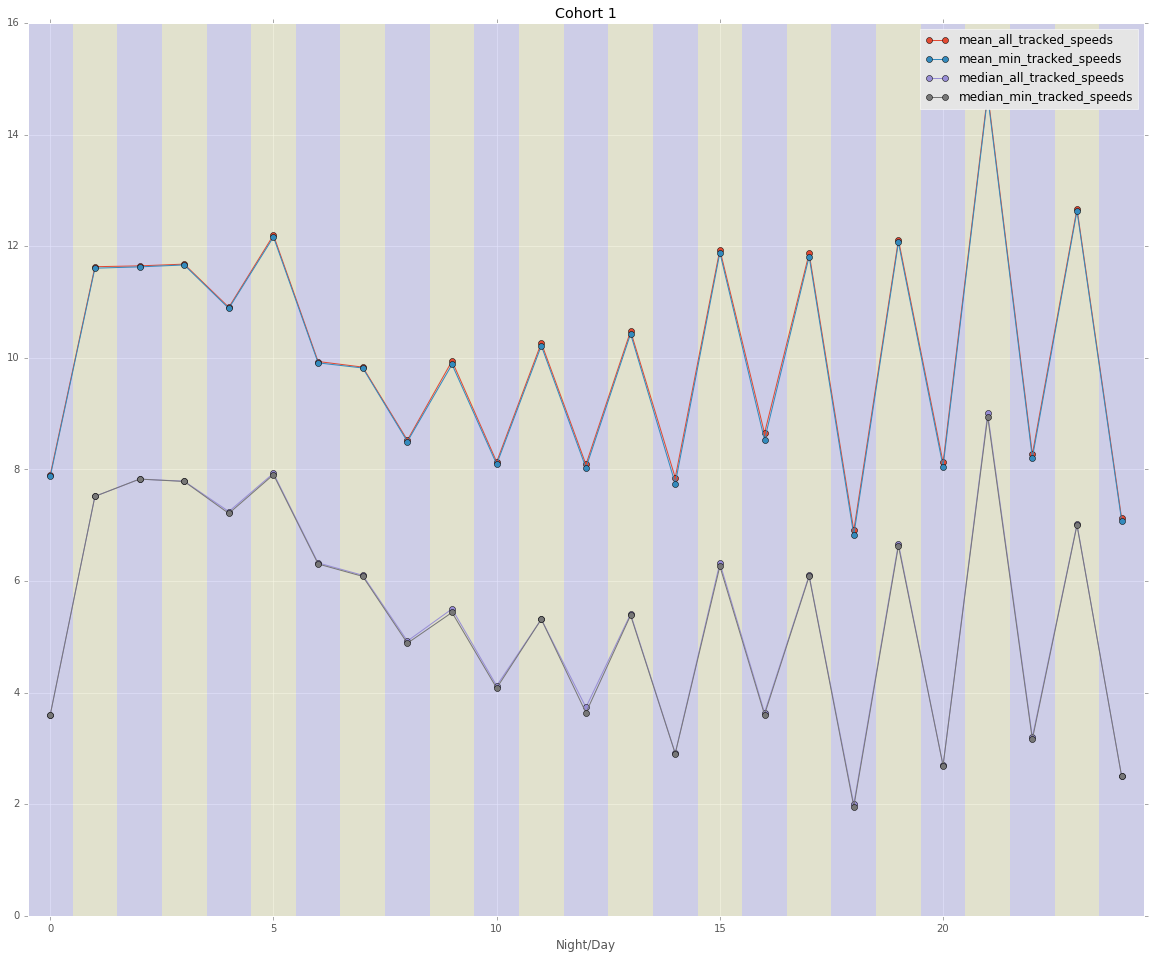

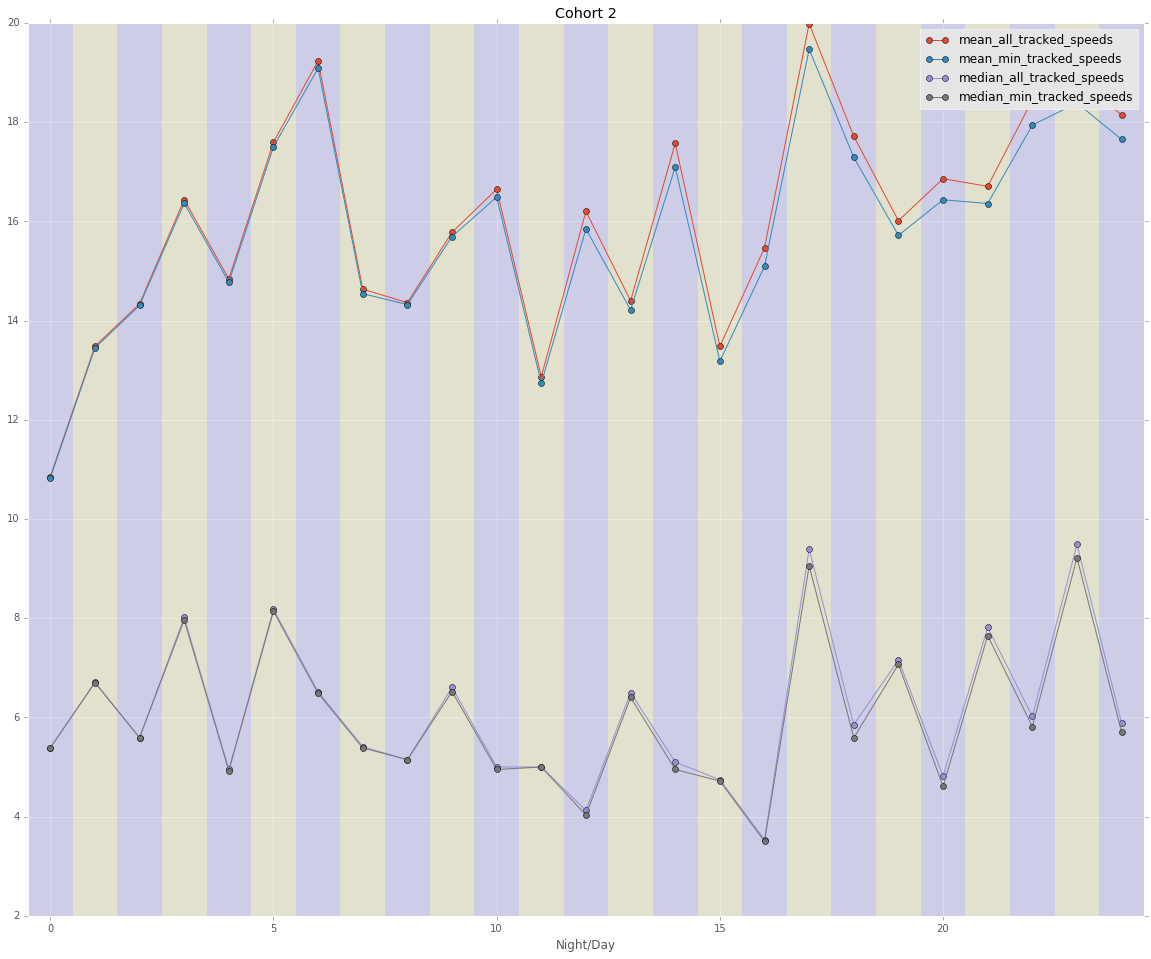

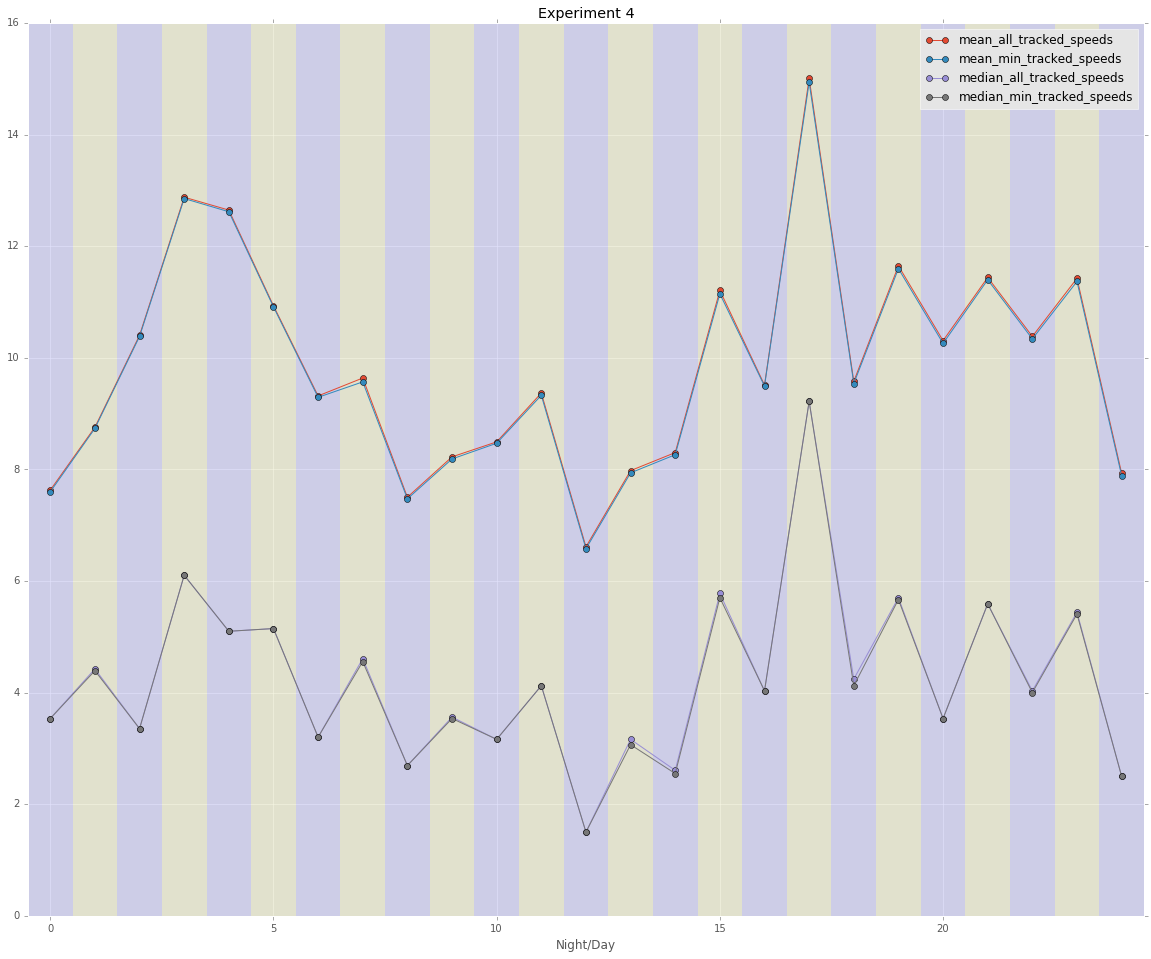

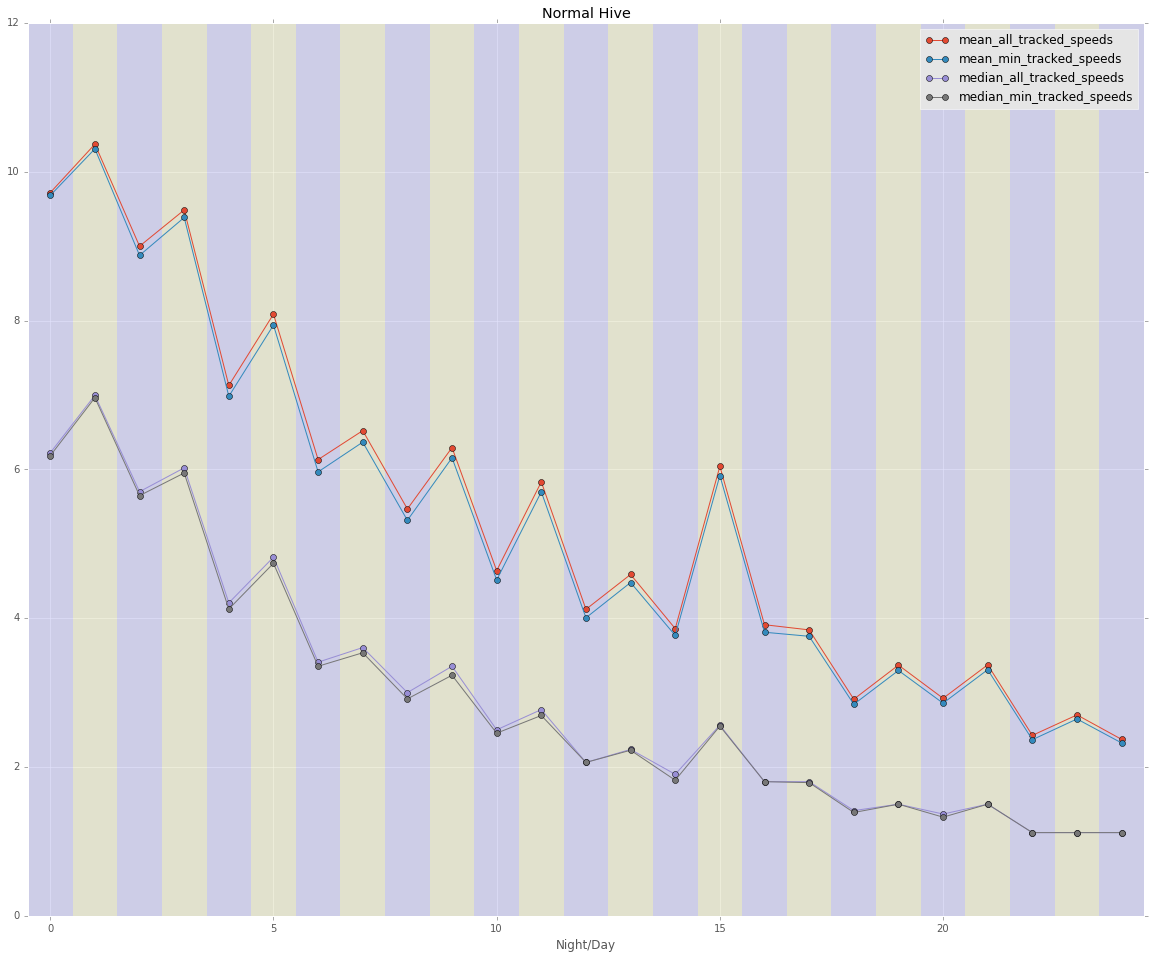

In [6]:
for i, df in enumerate(real_result_df_list):
    plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    plt.plot(df['mean_min_tracked_speeds'][0:25], marker='o', label='mean_min_tracked_speeds')
    plt.plot(df['median_all_tracked_speeds'][0:25], marker='o', label='median_all_tracked_speeds')
    plt.plot(df['median_min_tracked_speeds'][0:25], marker='o', label='median_min_tracked_speeds')
    #plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    #plt.plot(df['spread_all_tracked_individuals'][0:25], marker='o', label='spread_all_tracked_individuals')
    #plt.plot(df['spread_min_tracked_all_xy'][0:25], marker='o', label='spread_min_tracked_all_xy')
    #plt.plot(df['spread_min_tracked_individuals'][0:25], marker='o', label='spread_min_tracked_individuals')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

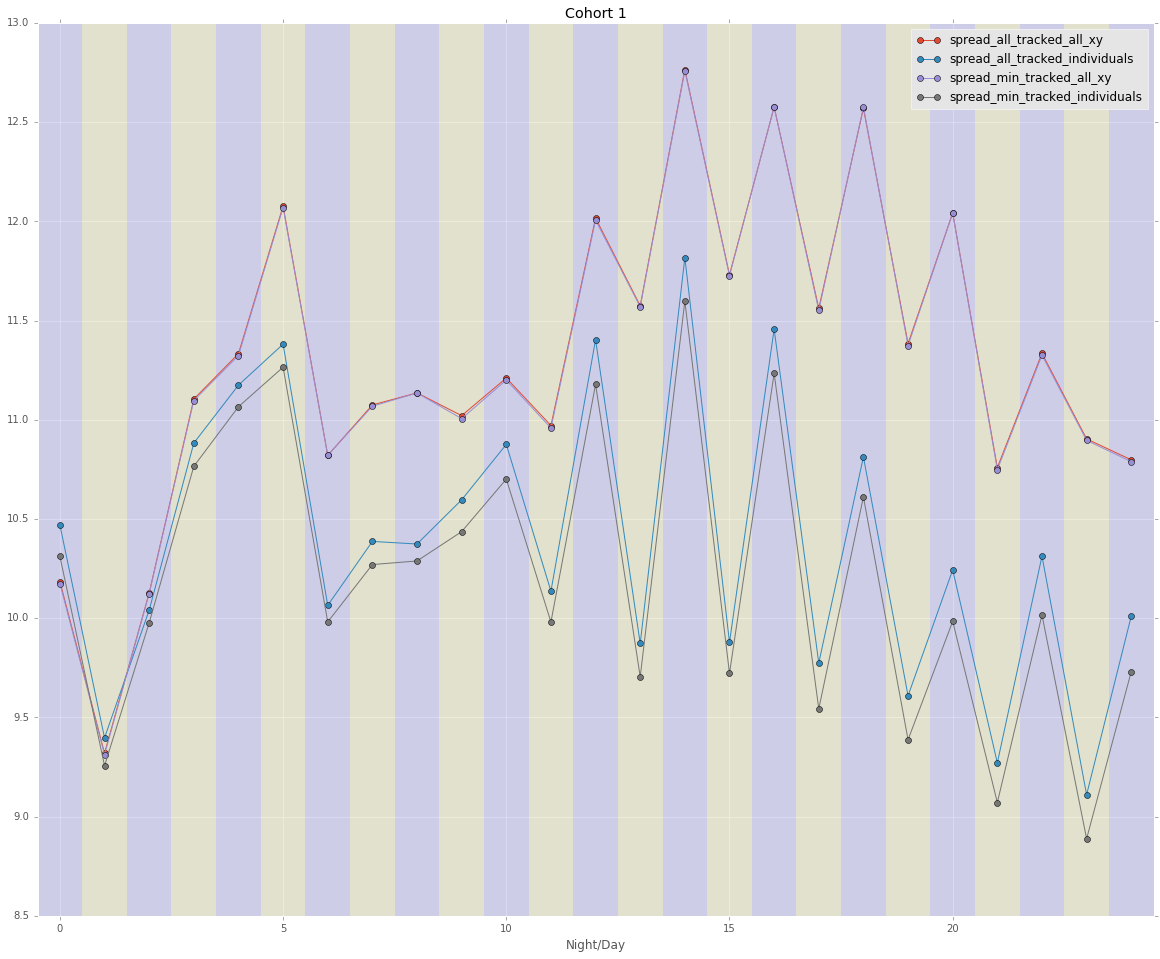

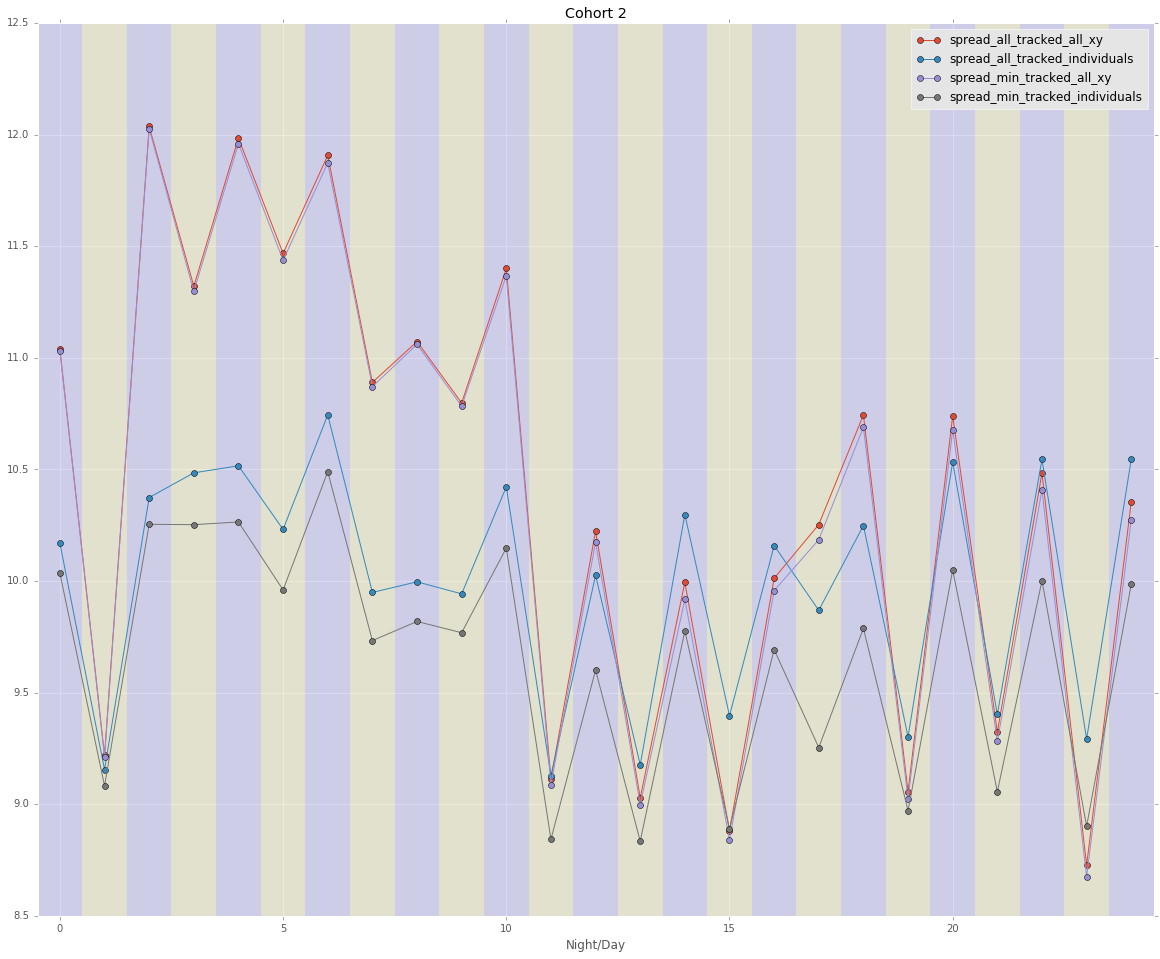

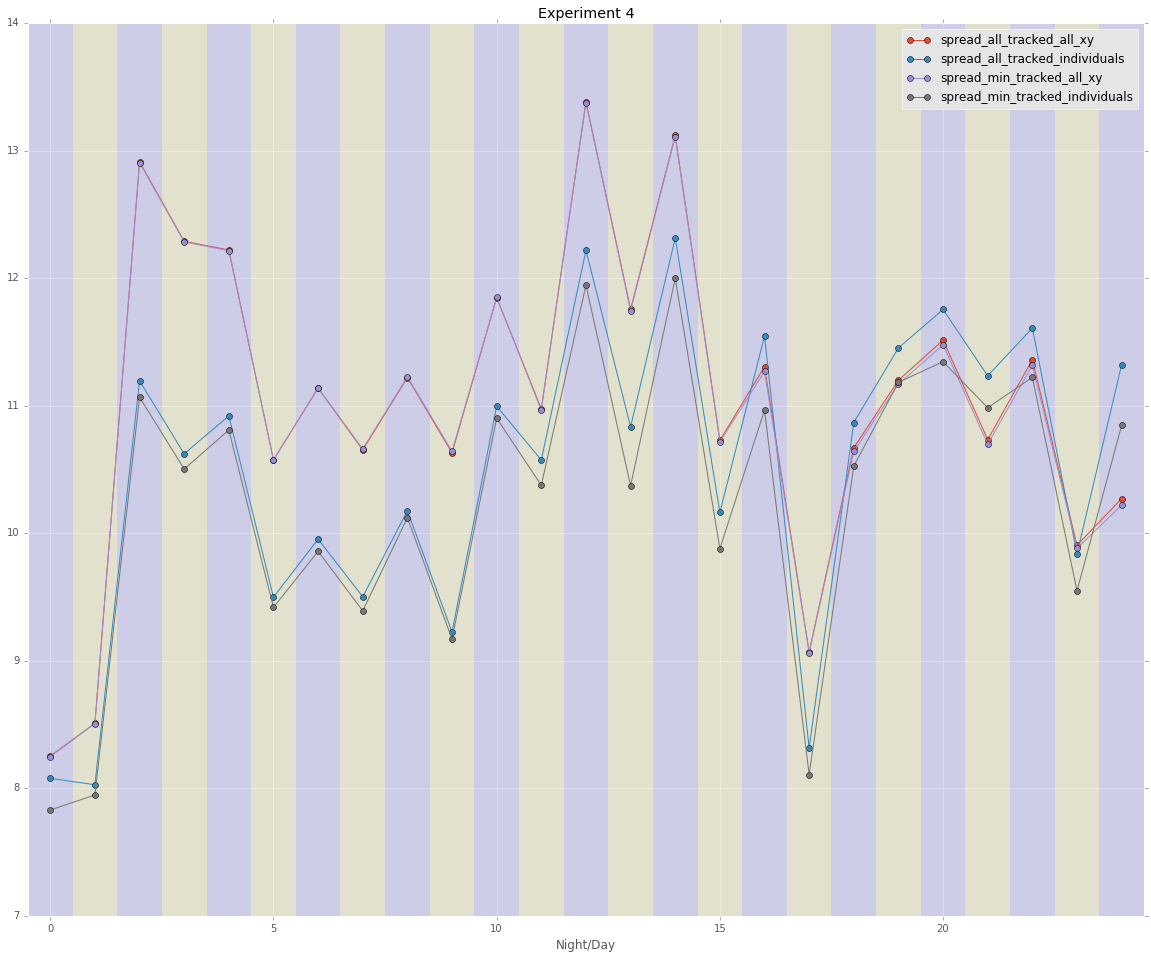

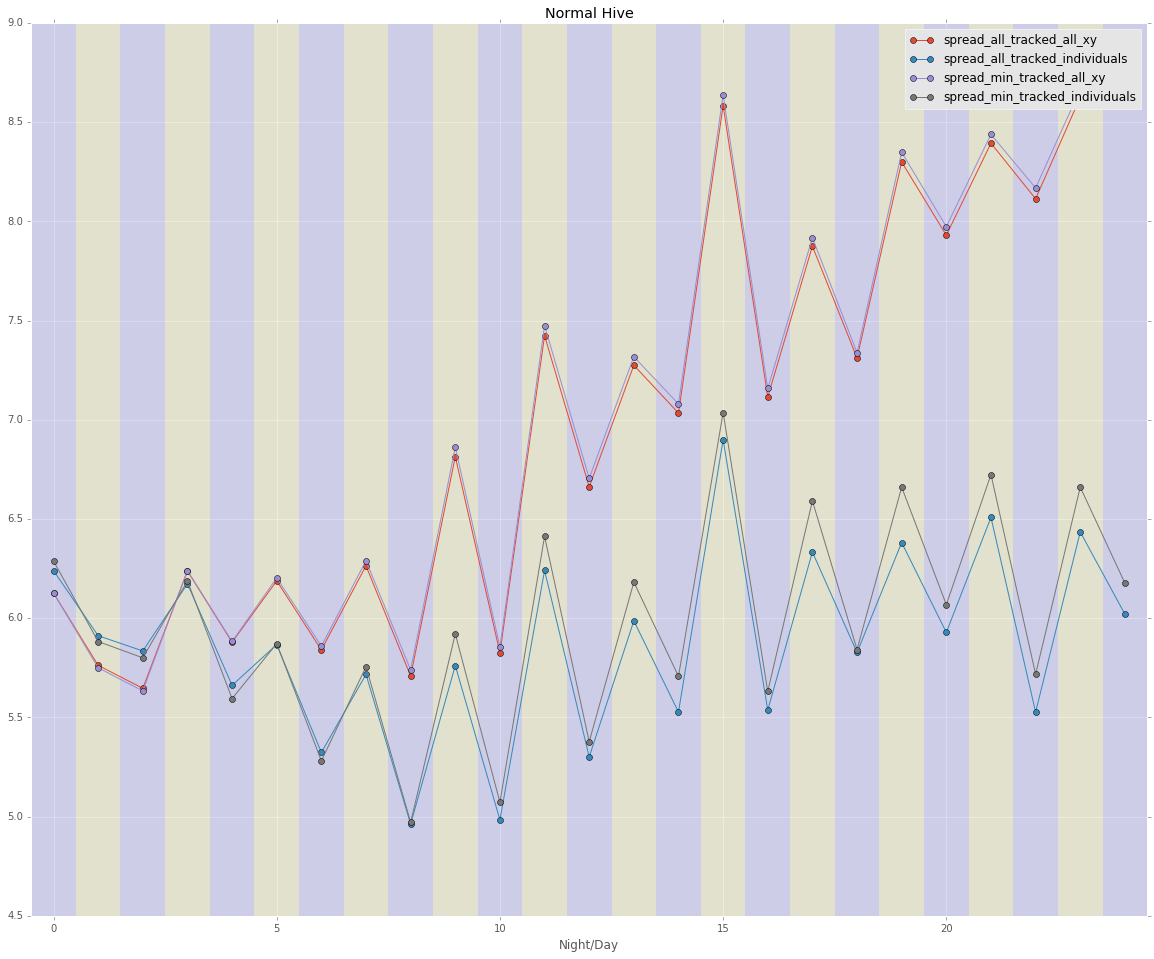

In [7]:
for i, df in enumerate(real_result_df_list):
    #plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    #plt.plot(df['mean_min_tracked_speeds'][0:25], marker='o', label='mean_min_tracked_speeds')
    #plt.plot(df['median_all_tracked_speeds'][0:25], marker='o', label='median_all_tracked_speeds')
    #plt.plot(df['median_min_tracked_speeds'][0:25], marker='o', label='median_min_tracked_speeds')
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    plt.plot(df['spread_all_tracked_individuals'][0:25], marker='o', label='spread_all_tracked_individuals')
    plt.plot(df['spread_min_tracked_all_xy'][0:25], marker='o', label='spread_min_tracked_all_xy')
    plt.plot(df['spread_min_tracked_individuals'][0:25], marker='o', label='spread_min_tracked_individuals')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

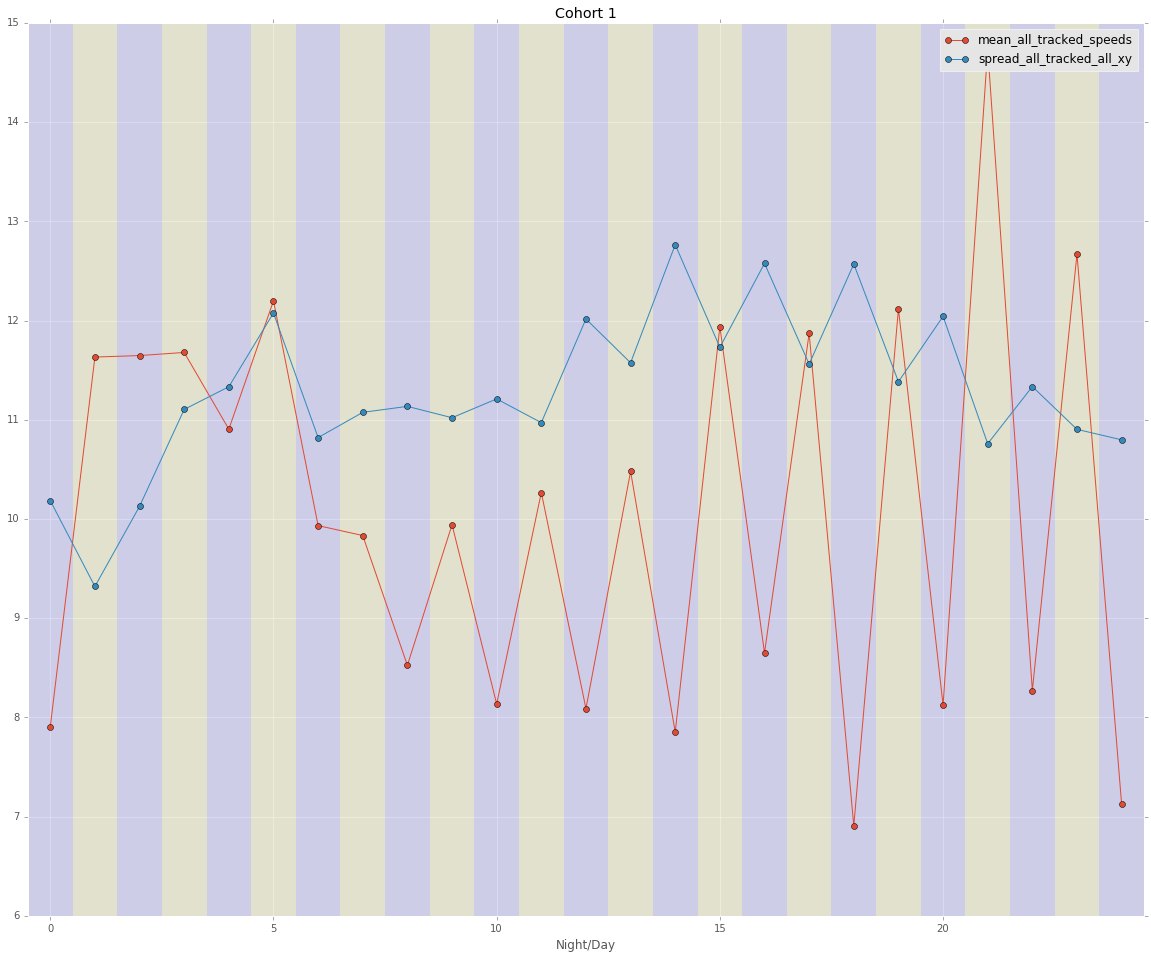

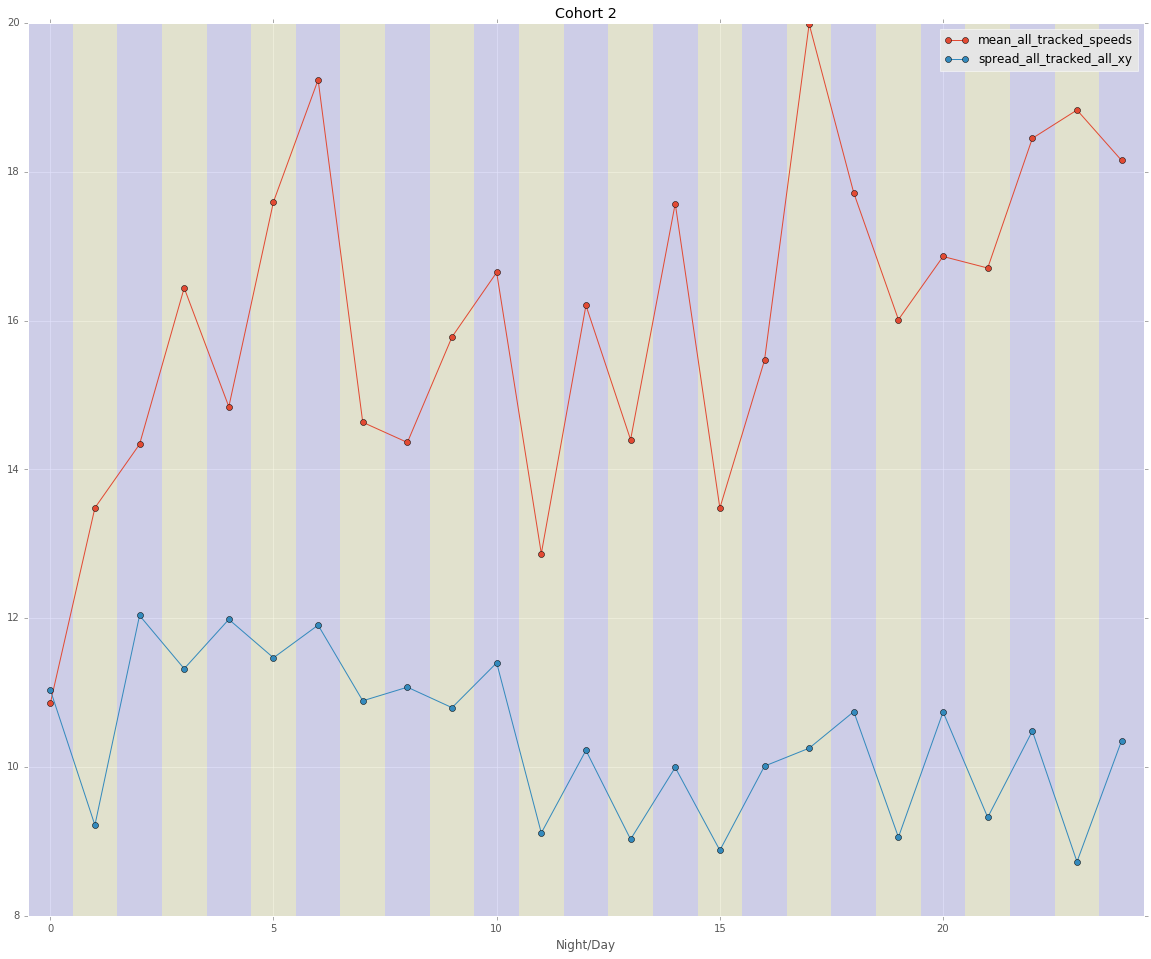

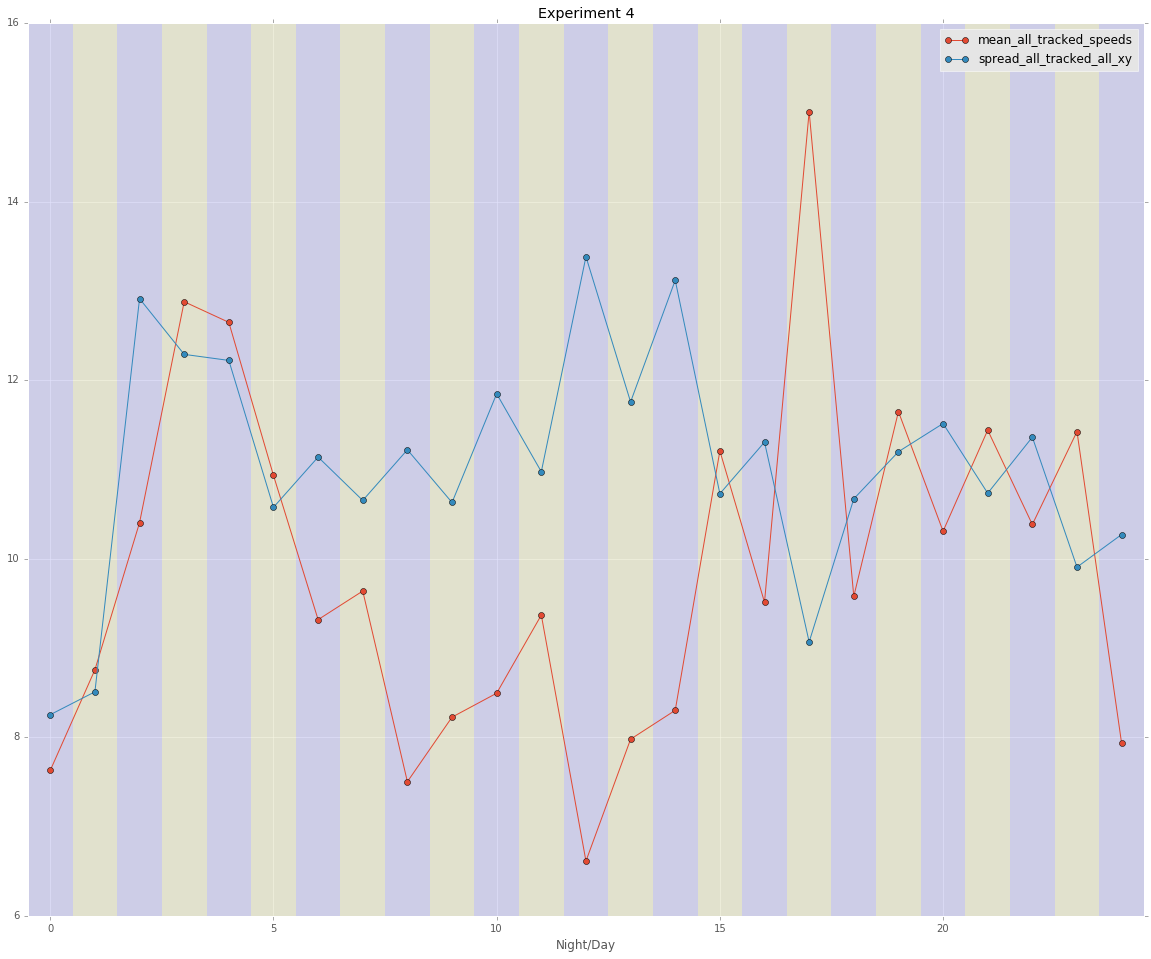

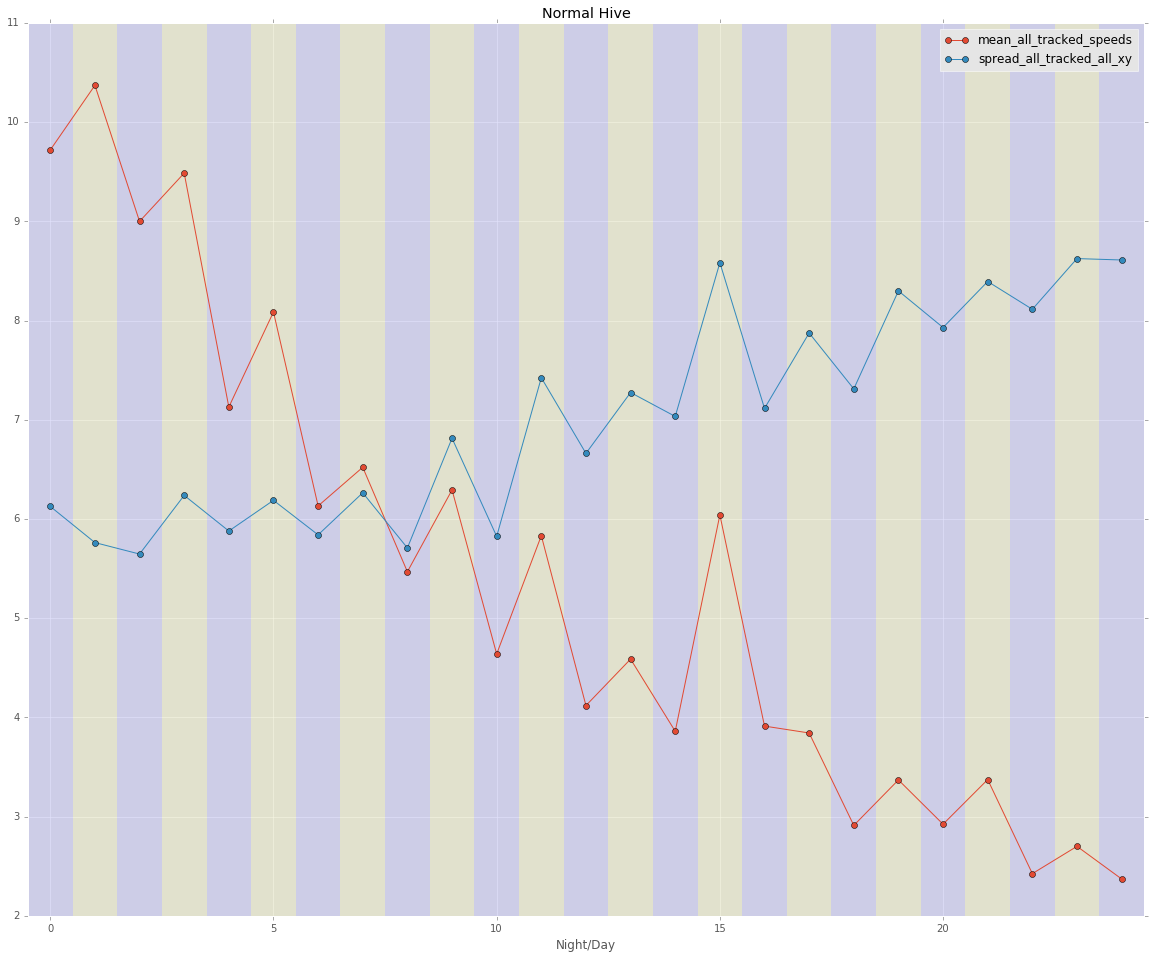

In [8]:
for i, df in enumerate(real_result_df_list):
    plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

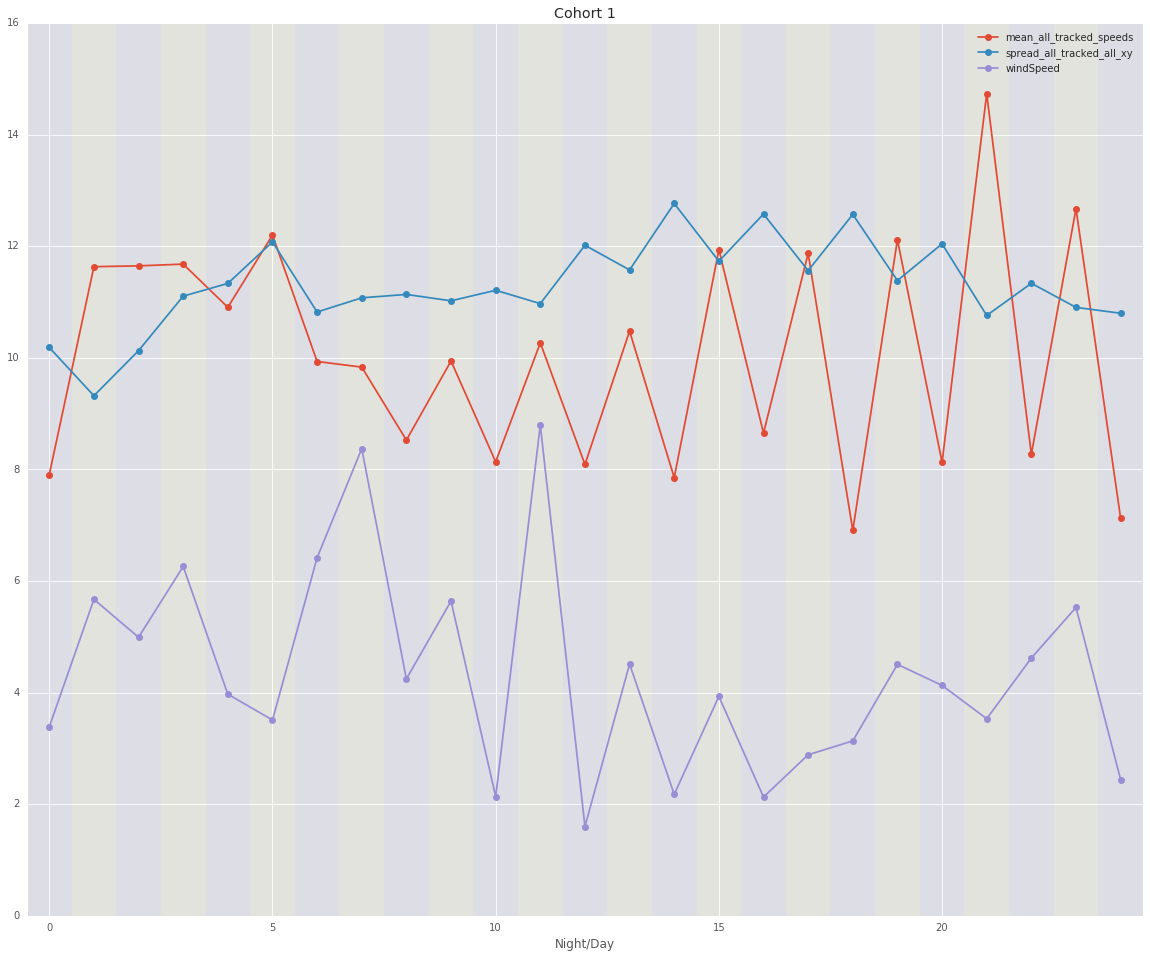

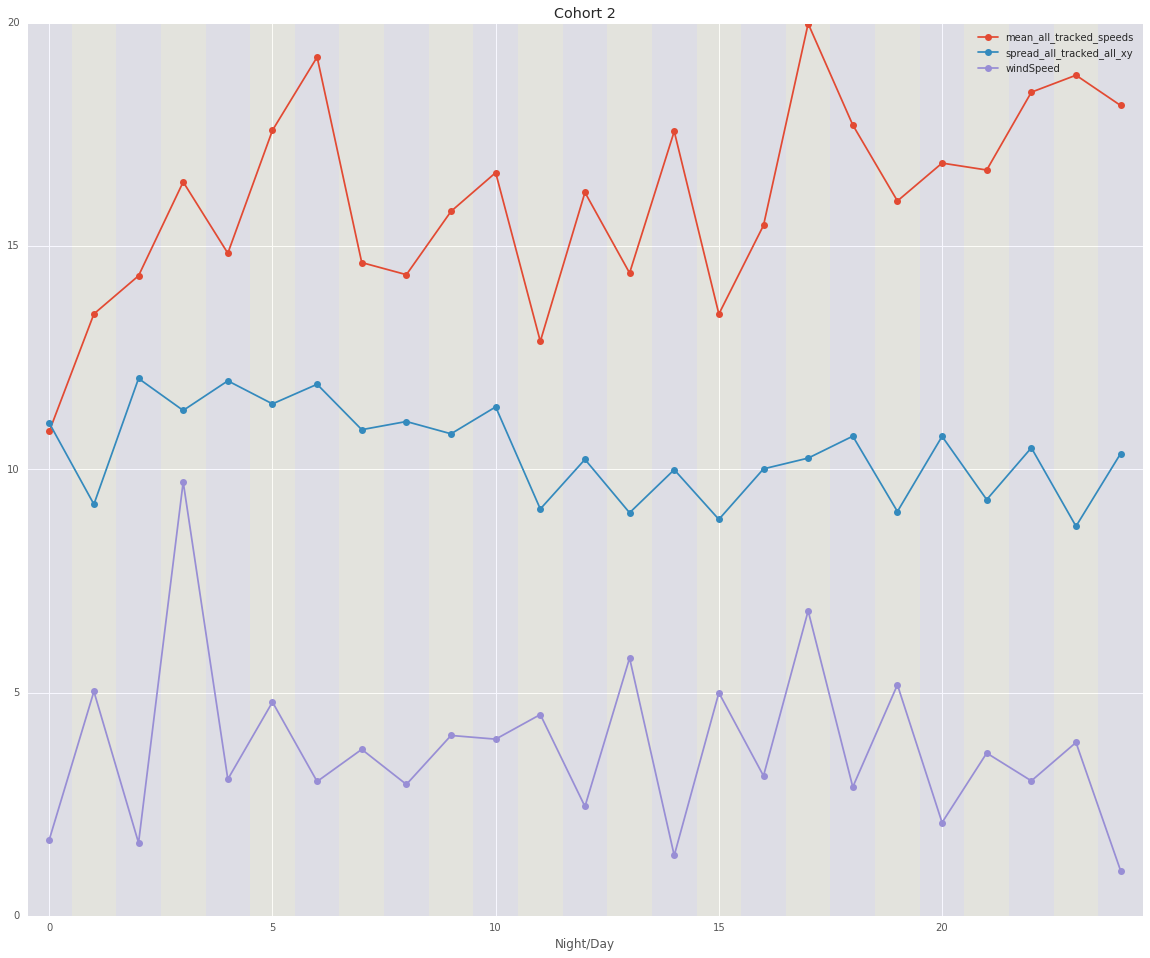

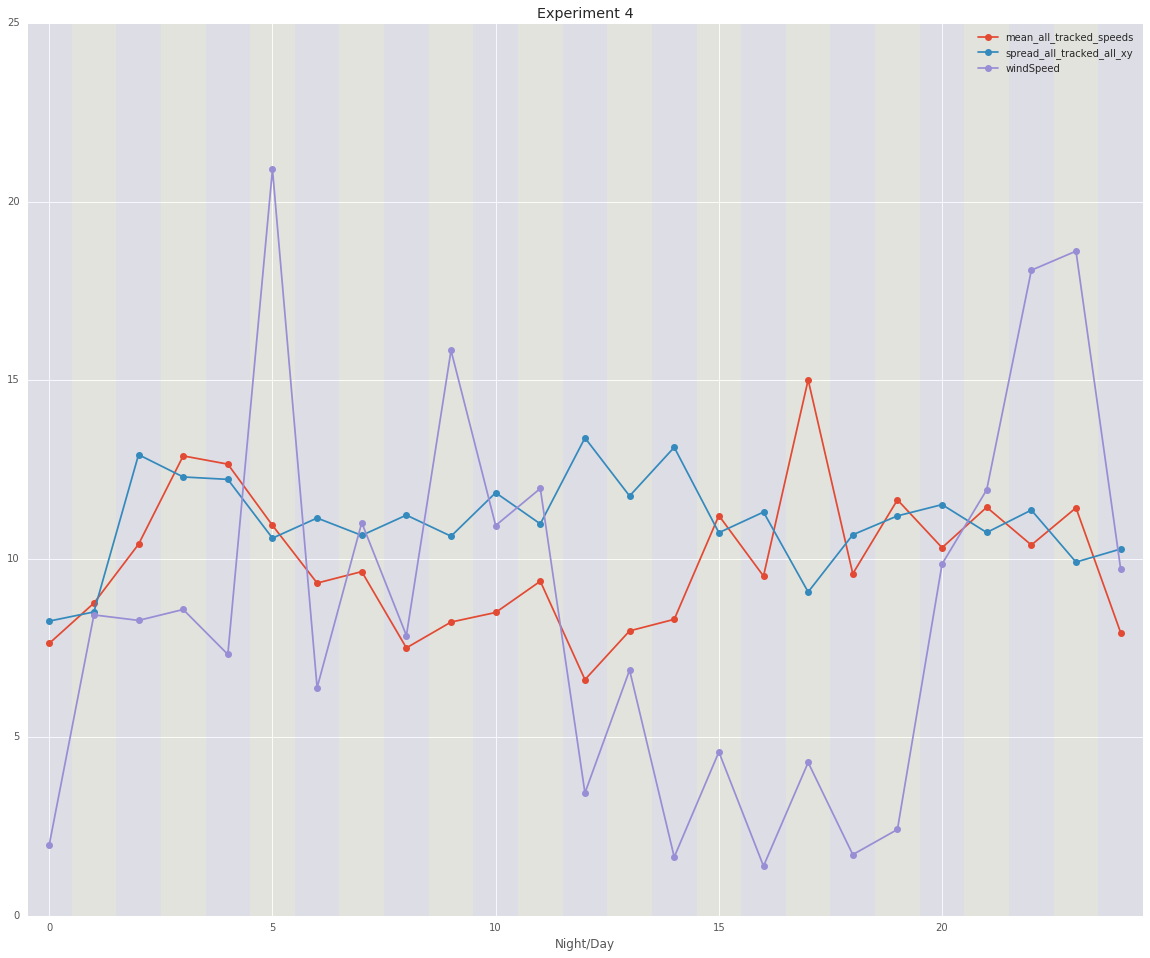

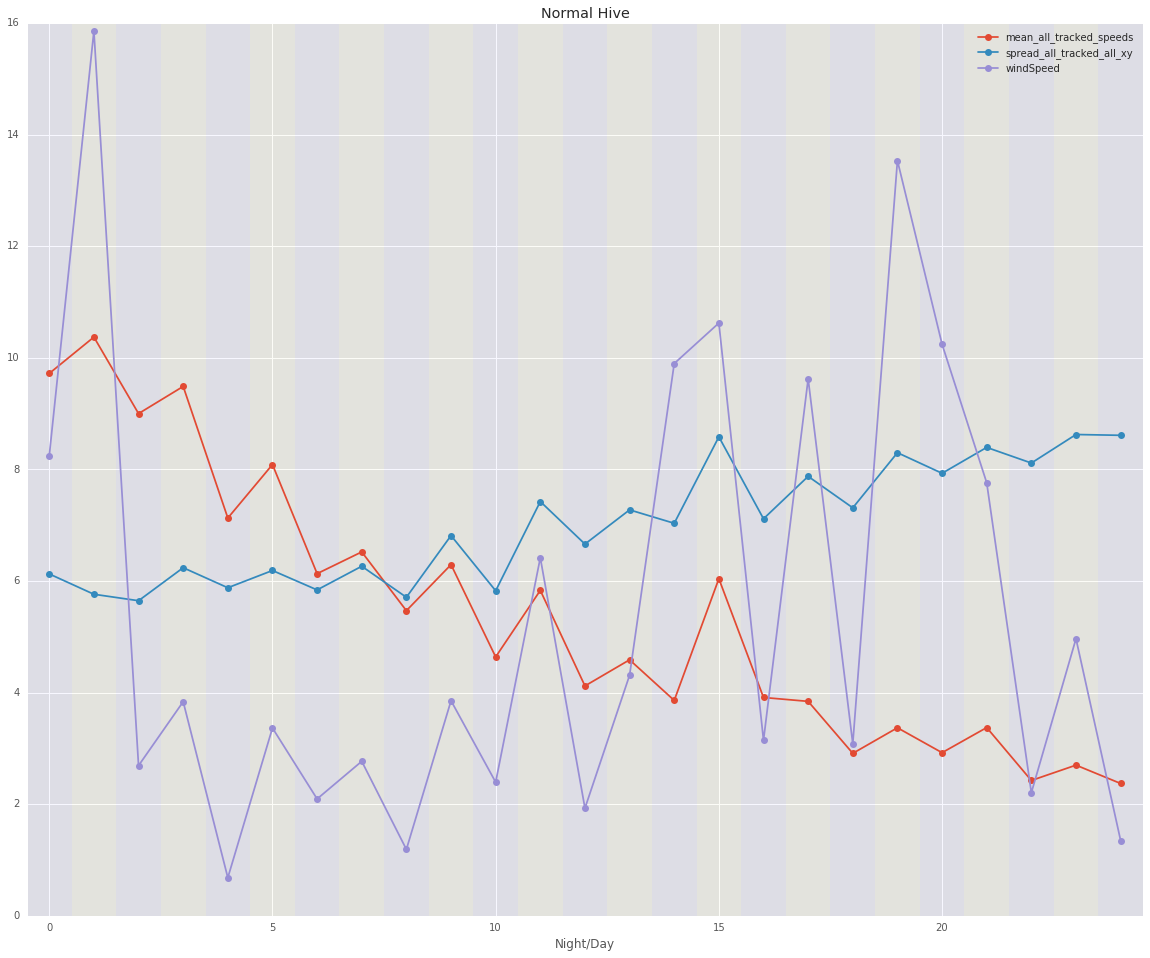

In [80]:
#extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']

for i, df in enumerate(real_result_df_list):
    plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    
    #plt.plot(weather_df_list[i]['temperature'][0:25], marker='o', label='temperature')
    #plt.plot(weather_df_list[i]['humidity'][0:25] * 10, marker='o', label='humidity')
    #plt.plot(weather_df_list[i]['dewPoint'][0:25], marker='o', label='dewPoint')
    plt.plot(weather_df_list[i]['windSpeed'][0:25] * 2, marker='o', label='windSpeed')
    #plt.plot(weather_df_list[i]['cloudCover'][0:25] * 10, marker='o', label='cloudCover')
    
    #y1 = weather_df_list[i]['temperature'][0:25]
    #y2 = df['mean_all_tracked_speeds'][0:25]
    #y3 = df['spread_all_tracked_all_xy'][0:25]
    #x1 = range(len(y1))
    #x2 = range(len(y2))
    #x3 = range(len(y3))
    
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x1, y1)
    #predict_y = intercept + slope * x1
    #plt.plot(x1, predict_y, 'k-')
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x2, y2)
    #predict_y = intercept + slope * x2
    #plt.plot(x2, predict_y, 'b-')
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x3, y3)
    #predict_y = intercept + slope * x2
    #plt.plot(x2, predict_y, 'y-')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')
    plt.show()

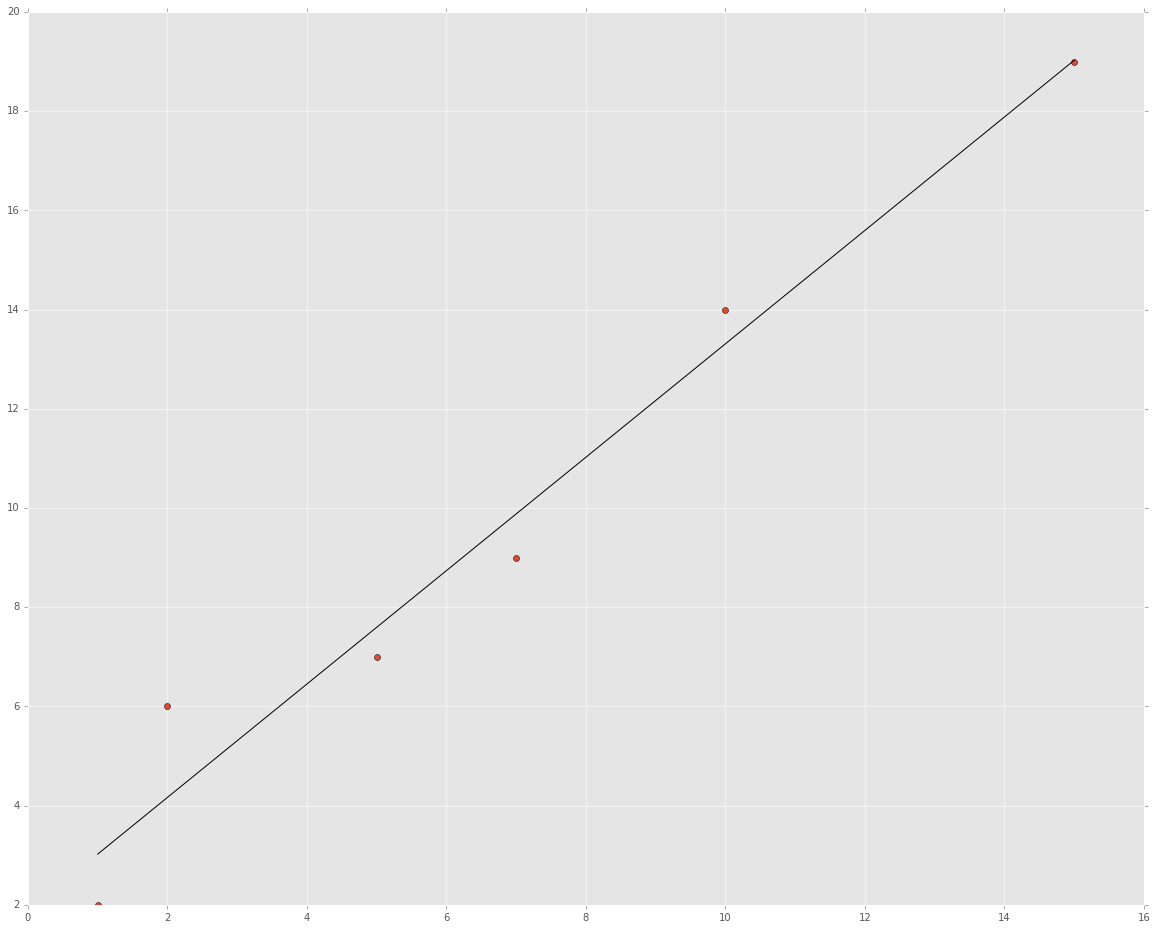

In [30]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [10,9,8,7,6,5,4,3,2,1]

#f = linregress(x,y) #x and y are arrays or lists.

# Fit the model
x = np.array([1, 2, 5, 7, 10, 15])
y = np.array([2, 6, 7, 9, 14, 19])
slope, intercept, r_value, p_value, slope_std_error = linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()

In [68]:
merged_df[:25]

mean_all_tracked_speeds  spread_all_tracked_all_xy  temperature  humidity  \
0                  7.904960                  10.184953    19.400000  0.664286   
1                 11.632530                   9.319706    26.835714  0.358571   
2                 11.647541                  10.127591    17.311429  0.805714   
3                 11.678911                  11.104734    21.164286  0.628571   
4                 10.905333                  11.333139    16.374286  0.834286   
5                 12.199376                  12.077301    25.162857  0.467143   
6                  9.933523                  10.820764    18.035714  0.810000   
7                  9.833212                  11.075039    21.901429  0.597143   
8                  8.524679                  11.135516    16.925714  0.841429   
9                  9.942689                  11.021027    24.372857  0.504286   
10                 8.135135                  11.210403    16.141429  0.824286   
11                10.267104                  10.971206    27.894286  0.374286   
12                 8.088555                  12.016367    15.834286  0.635714   
13                10.478999                  11.574726    29.535714  0.317143   
14                 7.851586                  12.765470    16.332857  0.921429   
15                11.939123                  11.730942    26.670000  0.444286   
16                 8.648905                  12.576696    16.995714  0.872857   
17                11.872608                  11.561709    27.868571  0.432857   
18                 6.905597                  12.569939    18.028571  0.807143   
19                12.117653                  11.384044    27.680000  0.311429   
20                 8.123822                  12.042819    16.830000  0.911429   
21                14.734721                  10.759027    26.845714  0.477143   
22                 8.270723                  11.335028    16.912857  0.767143   
23                12.672684                  10.903631    26.692857  0.412857   
24                 7.123949                  10.798294    14.560000  0.908571   

     dewPoint  windSpeed  cloudCover  
0   12.720000   1.692857    0.000000  
1    9.255714   2.835714    0.310000  
2   13.911429   2.495714    0.666667  
3   13.742857   3.130000    0.916667  
4   13.510000   1.985714    0.666667  
5   12.412857   1.754286    0.310000  
6   14.722857   3.208571    0.916667  
7   13.607143   4.185714    0.583333  
8   14.211429   2.122857    1.000000  
9   12.840000   2.820000    0.456667  
10  13.137143   1.068333    0.000000  
11  11.092857   4.397143    0.530000  
12   8.891429   0.800000    0.000000  
13  10.455714   2.255714    0.455000  
14  15.061429   1.088333    0.000000  
15  12.795714   1.965714    0.530000  
16  14.800000   1.064286    0.000000  
17  13.265714   1.442857         NaN  
18  14.590000   1.567143    0.000000  
19   6.521429   2.252857         NaN  
20  15.337143   2.064286    0.000000  
21  13.624286   1.765714    0.155000  
22  12.698571   2.310000    0.044286  
23  11.648571   2.762857    0.000000  
24  13.075714   1.220000    0.000000

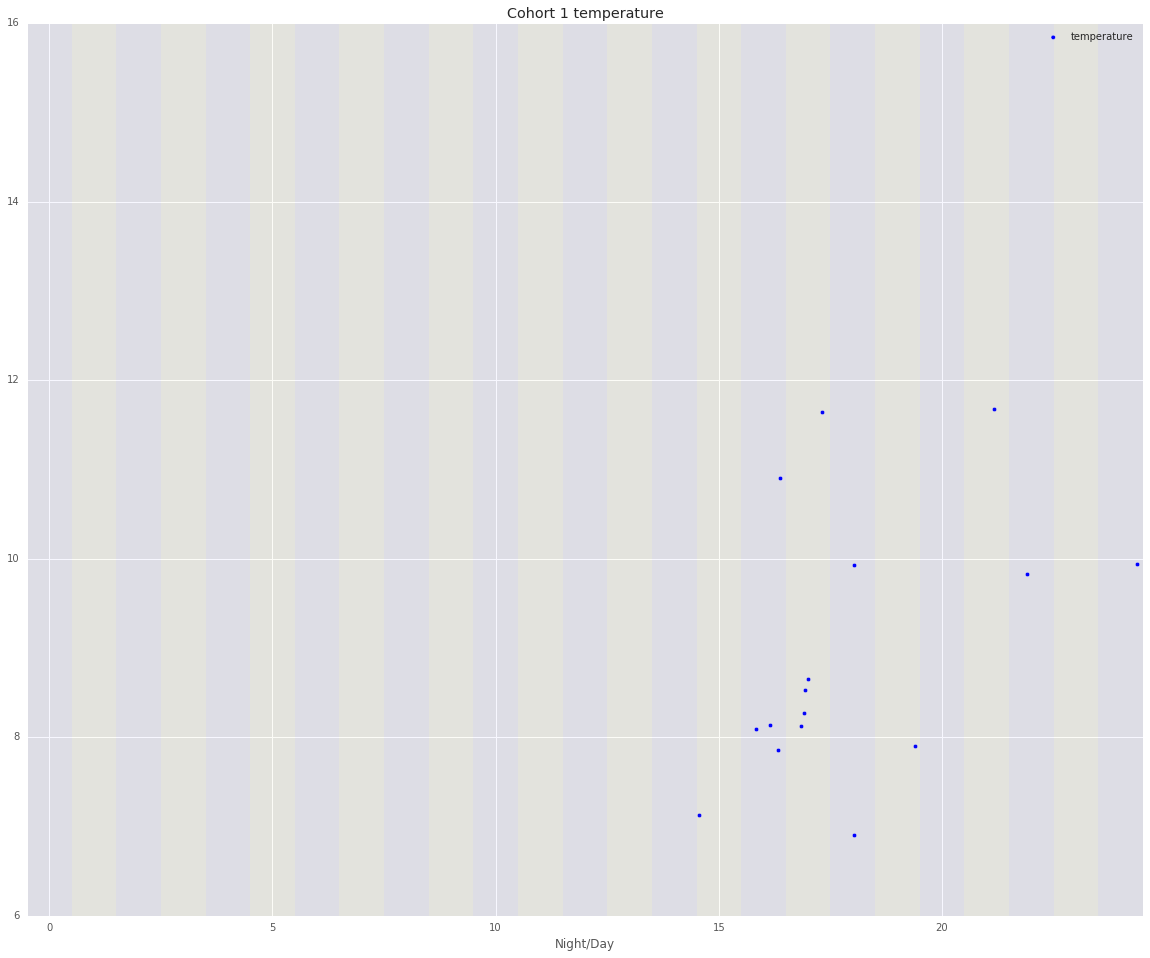

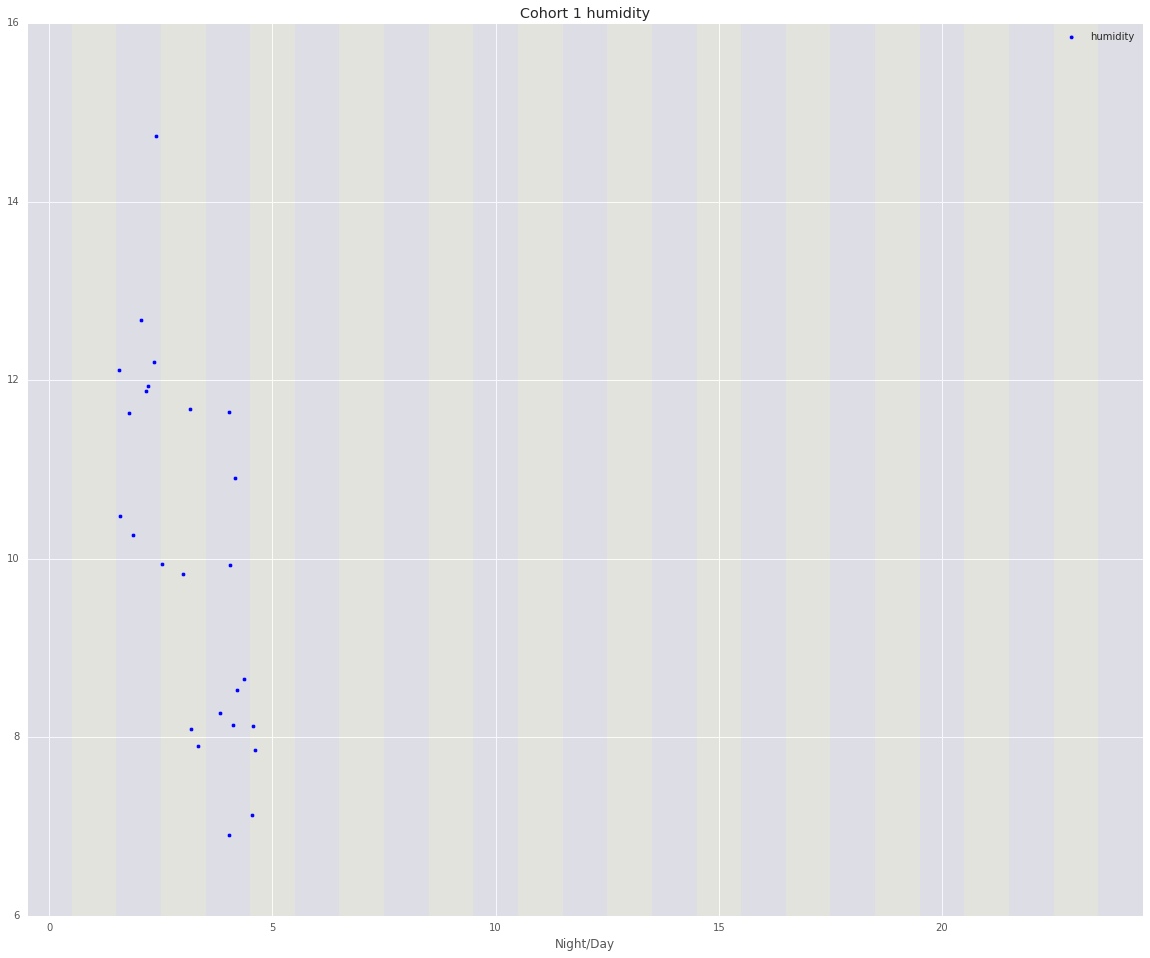

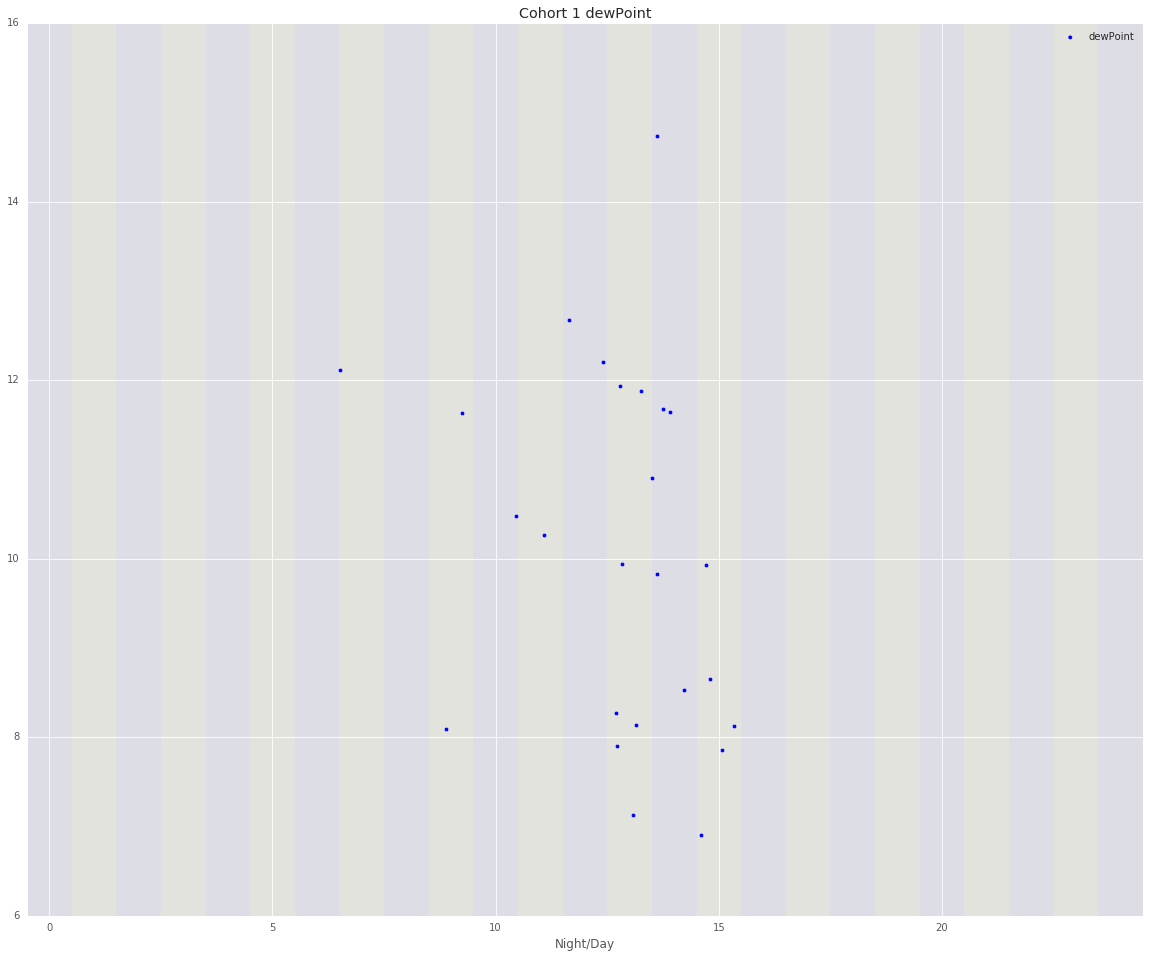

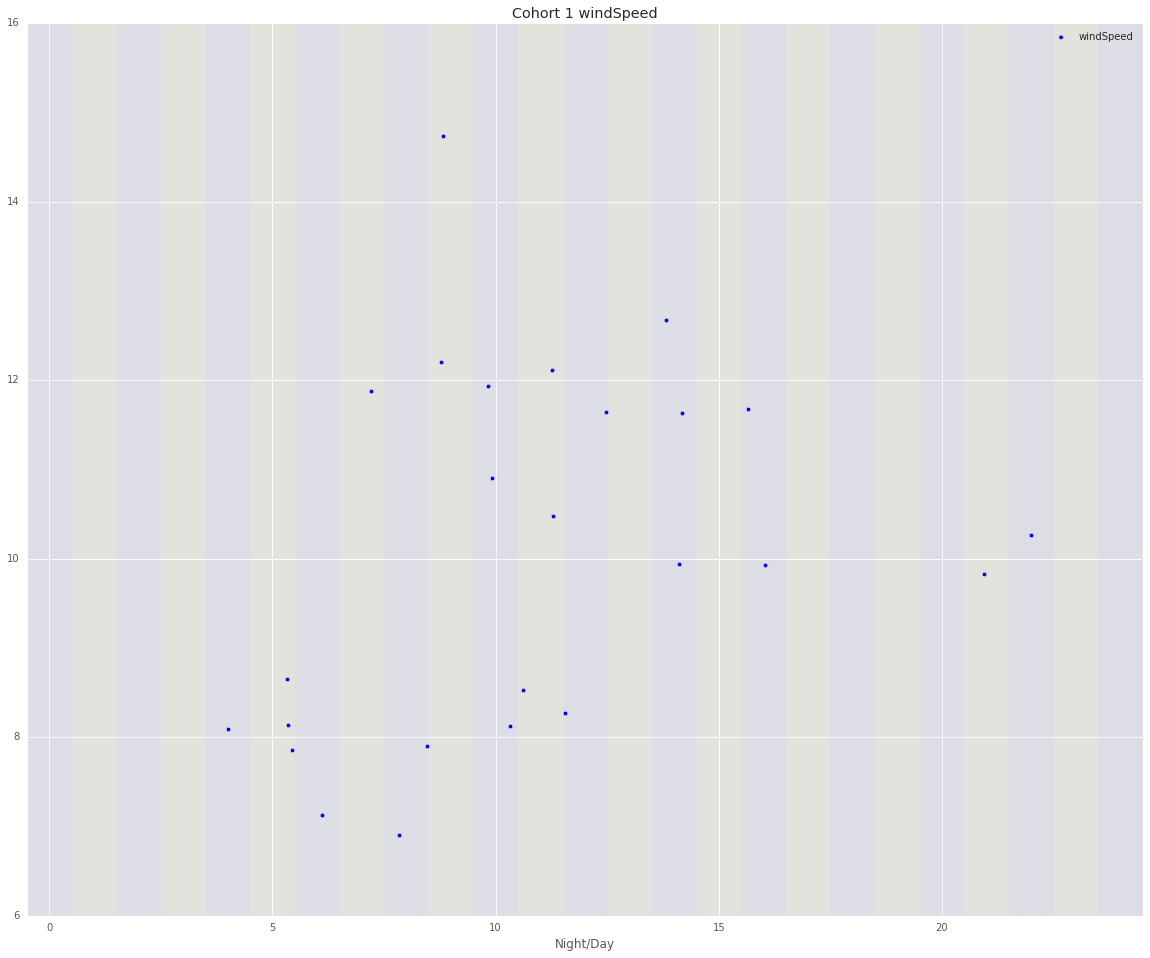

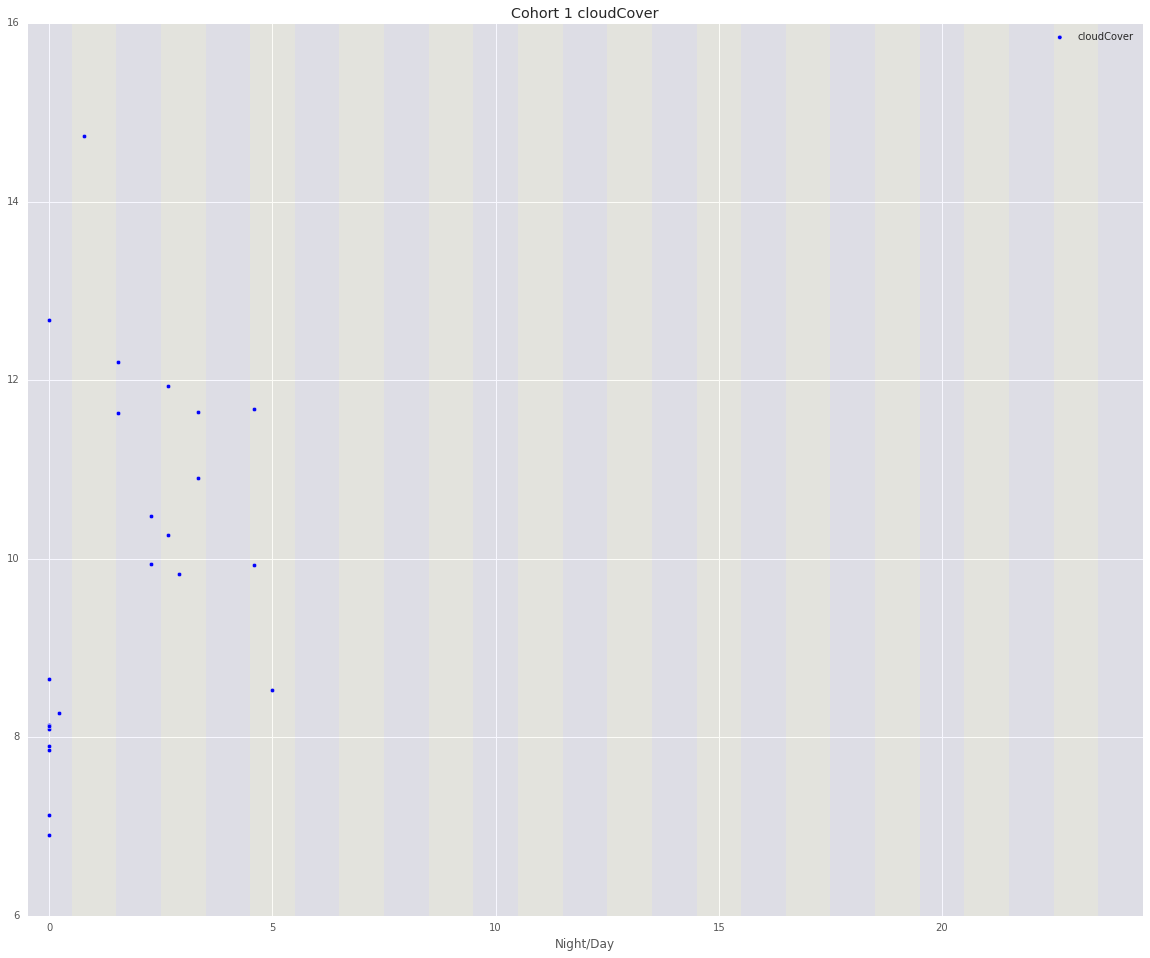

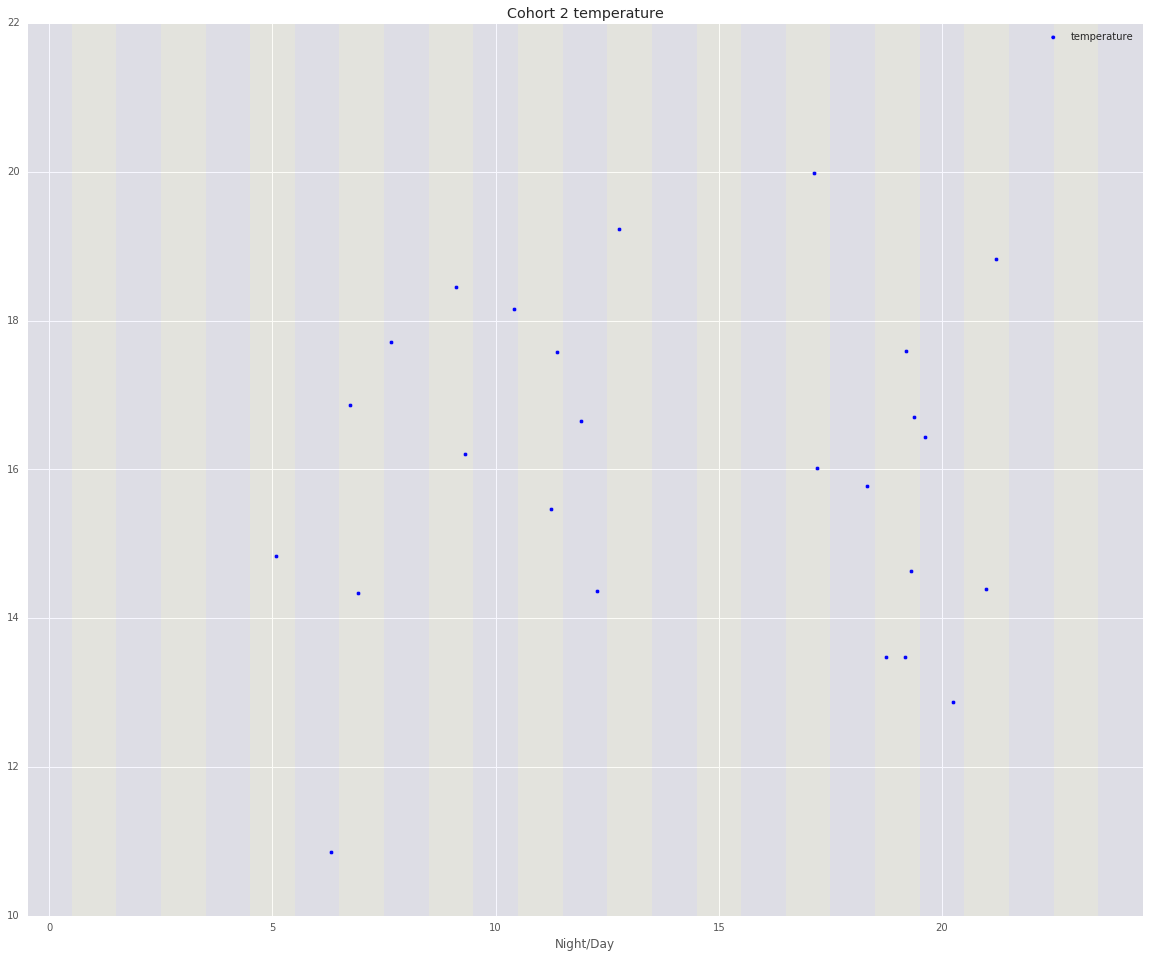

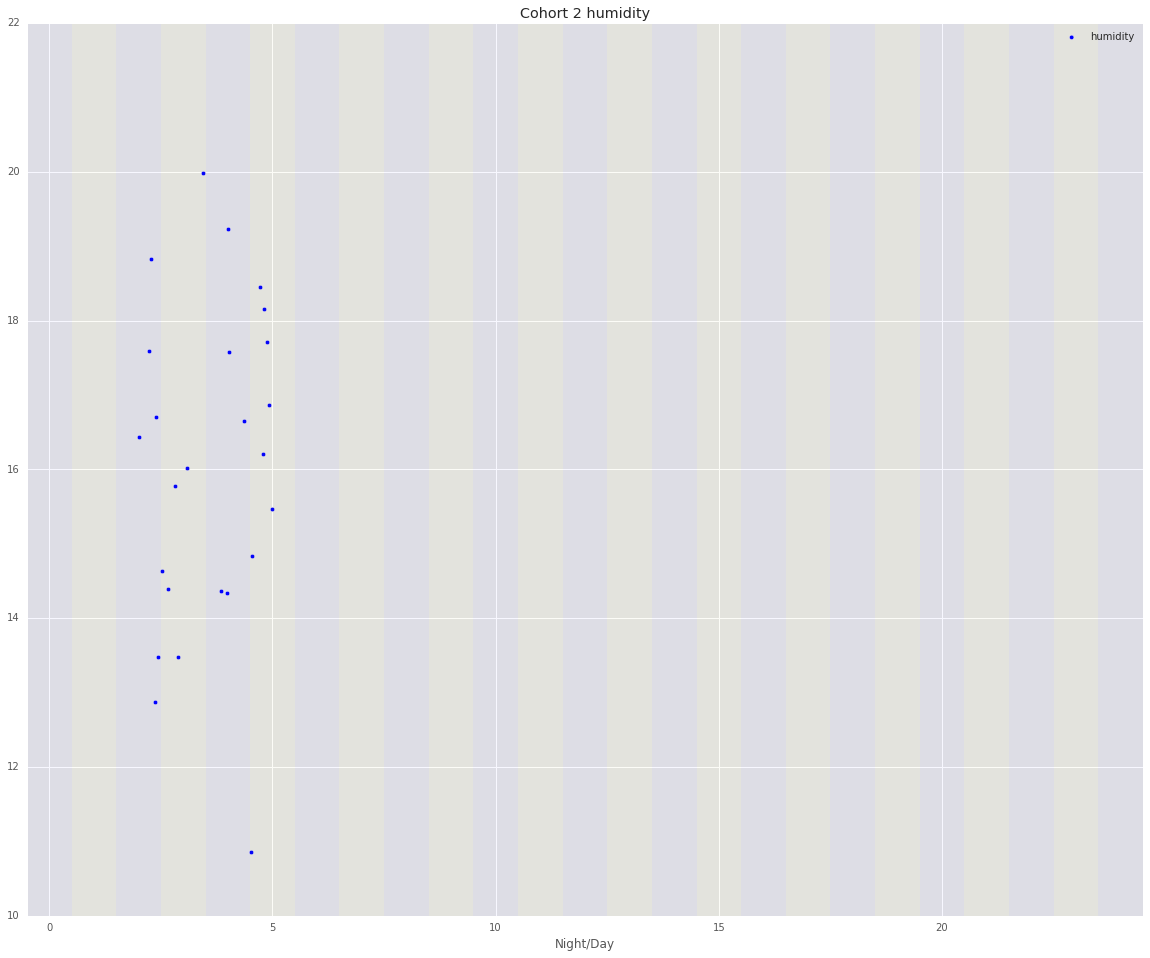

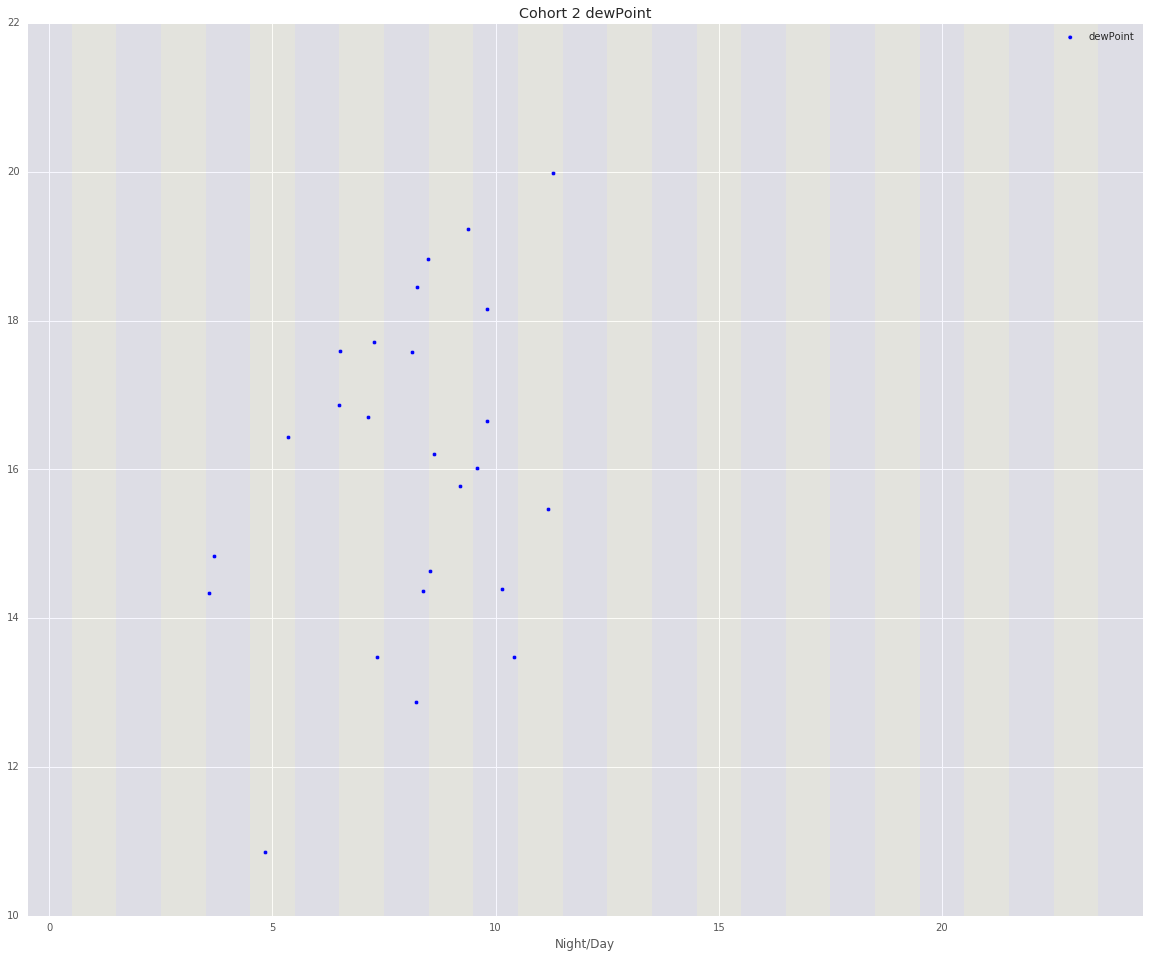

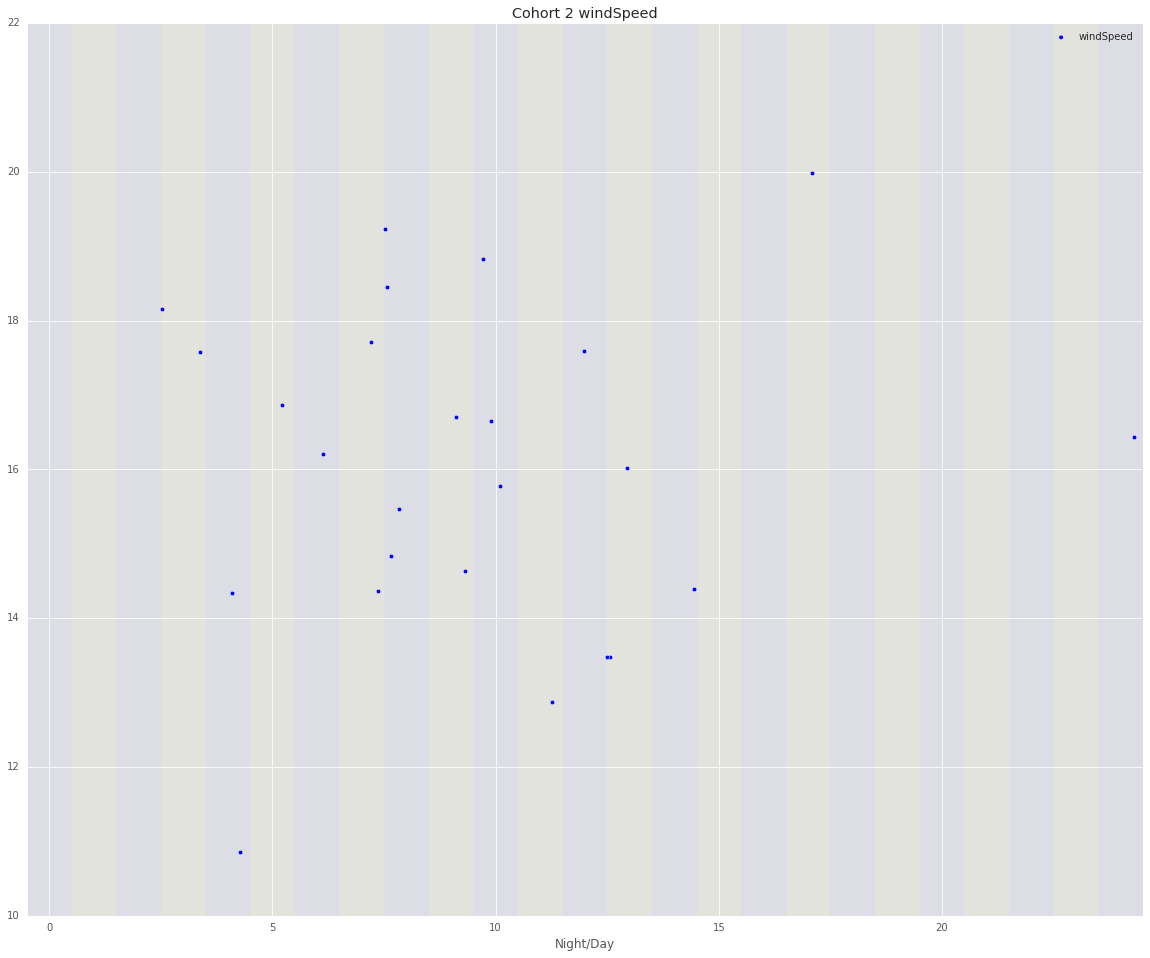

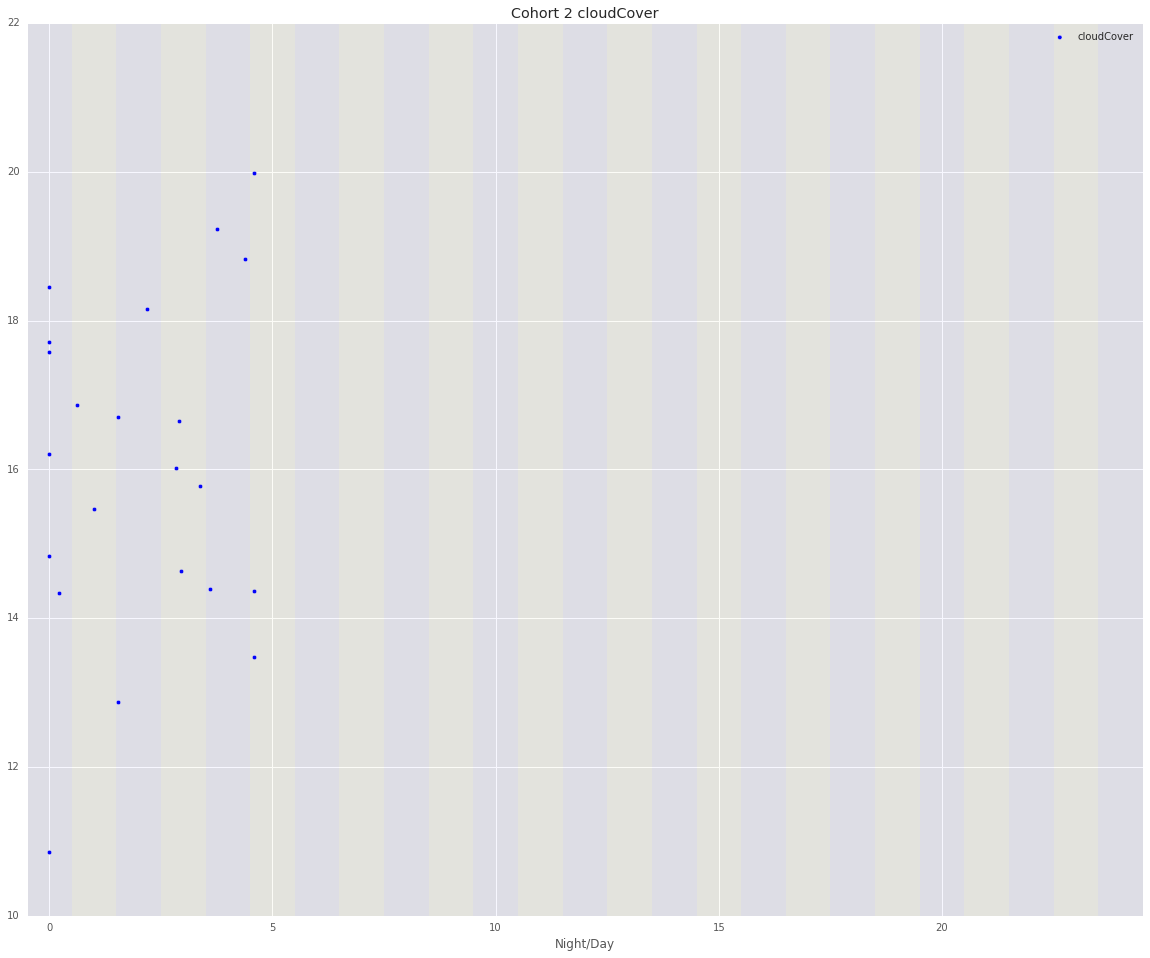

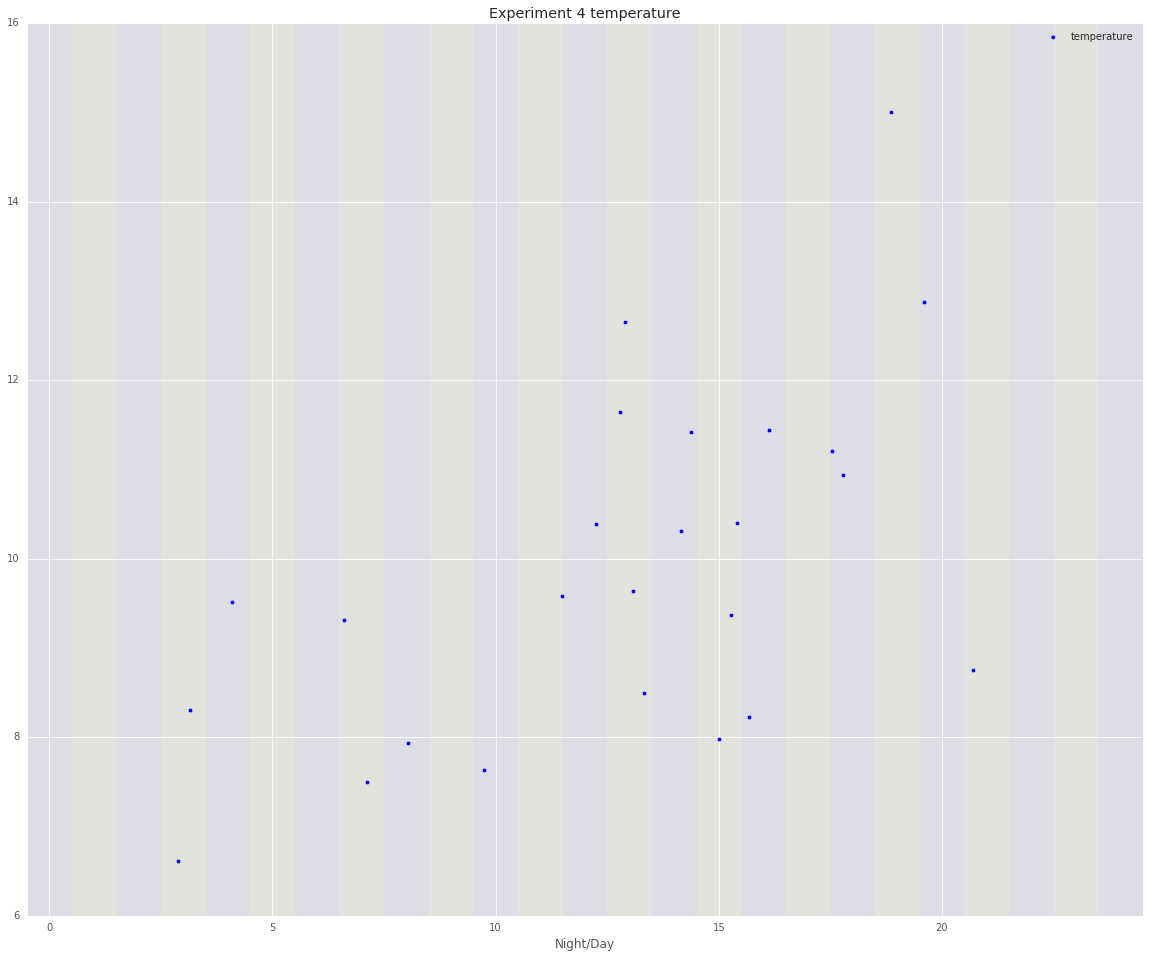

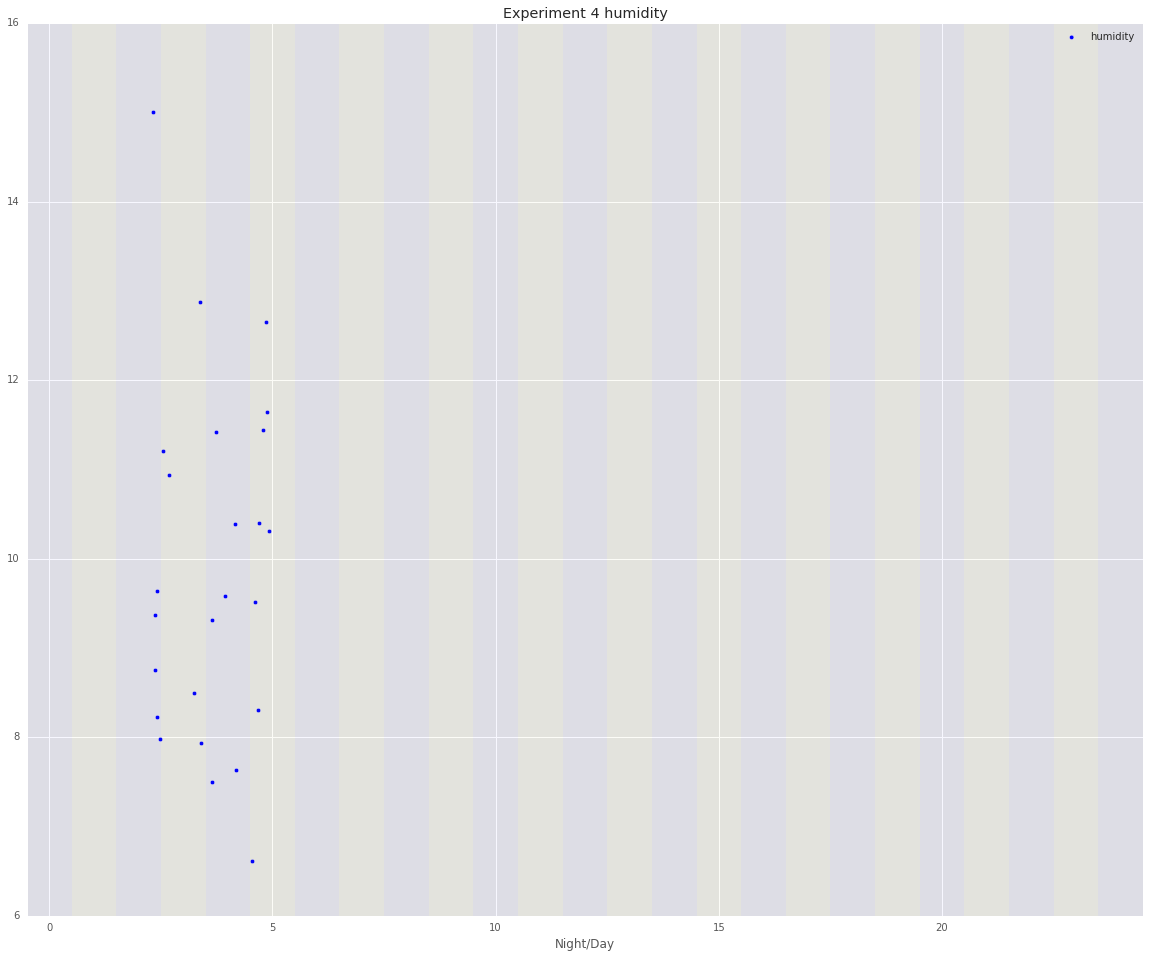

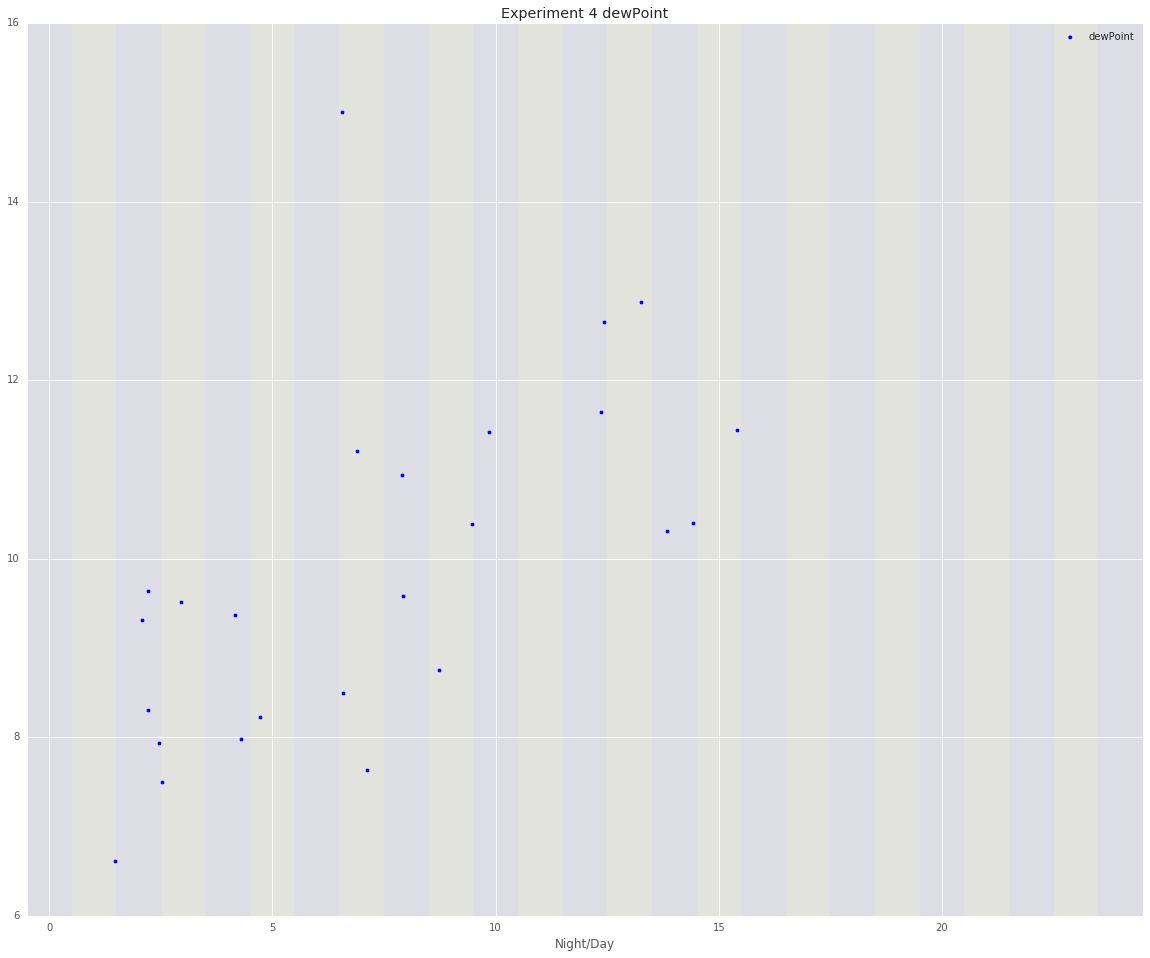

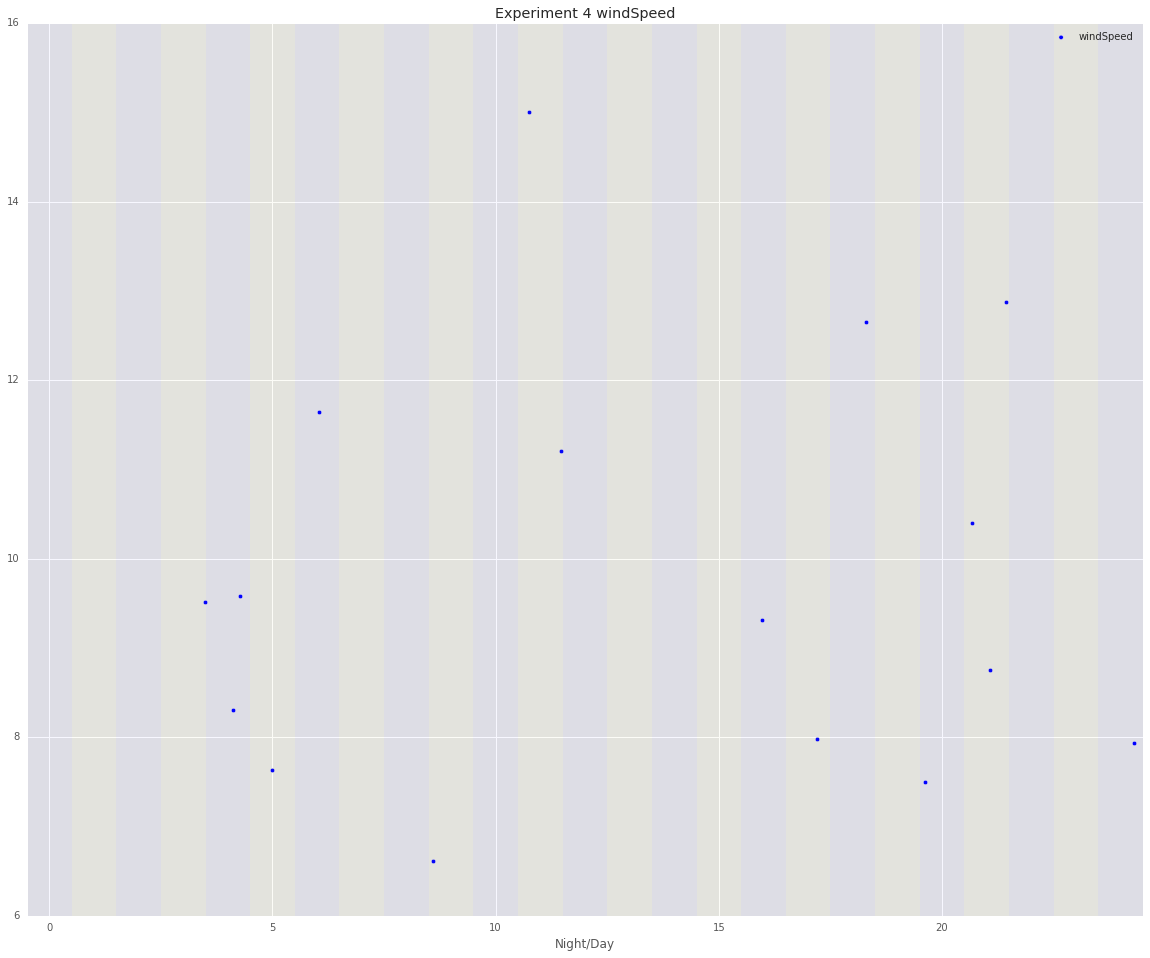

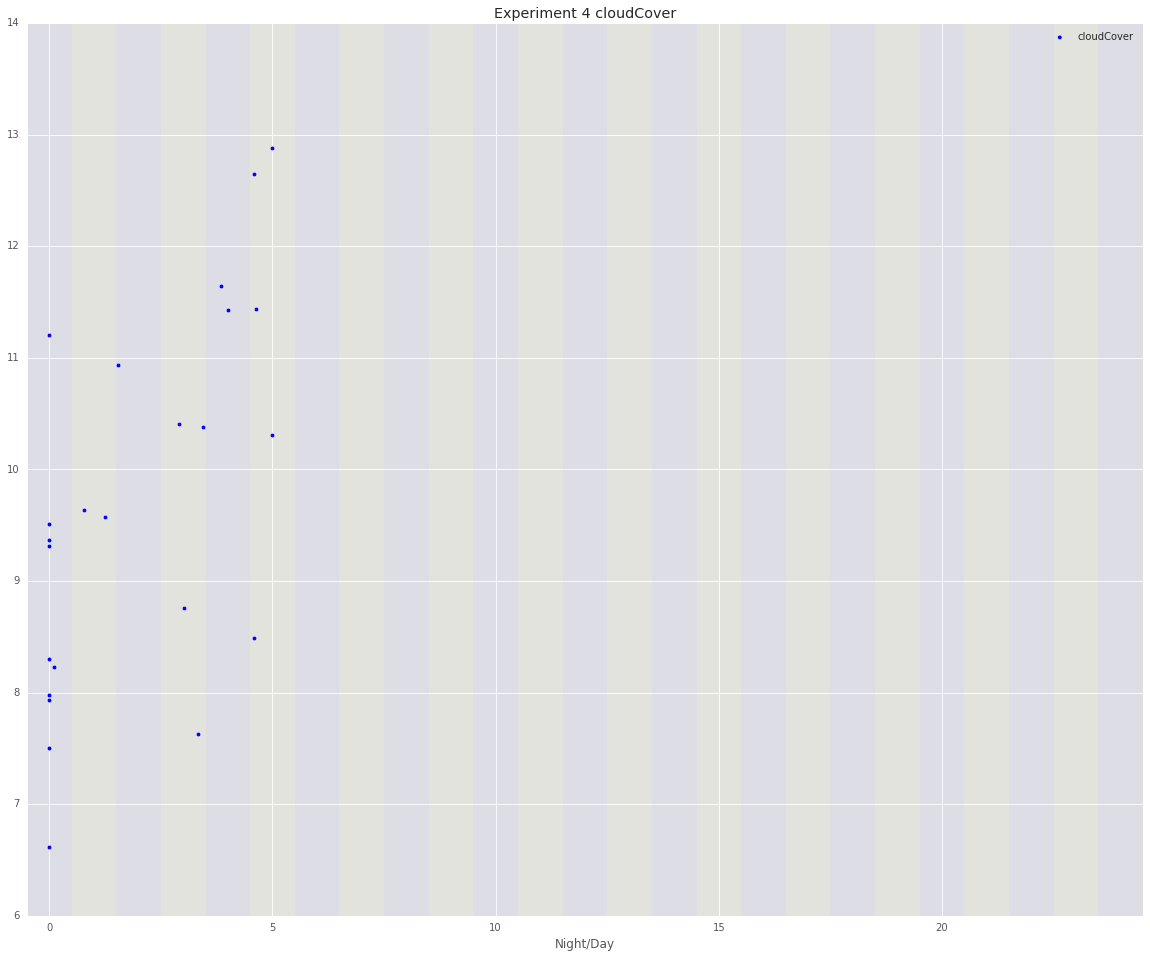

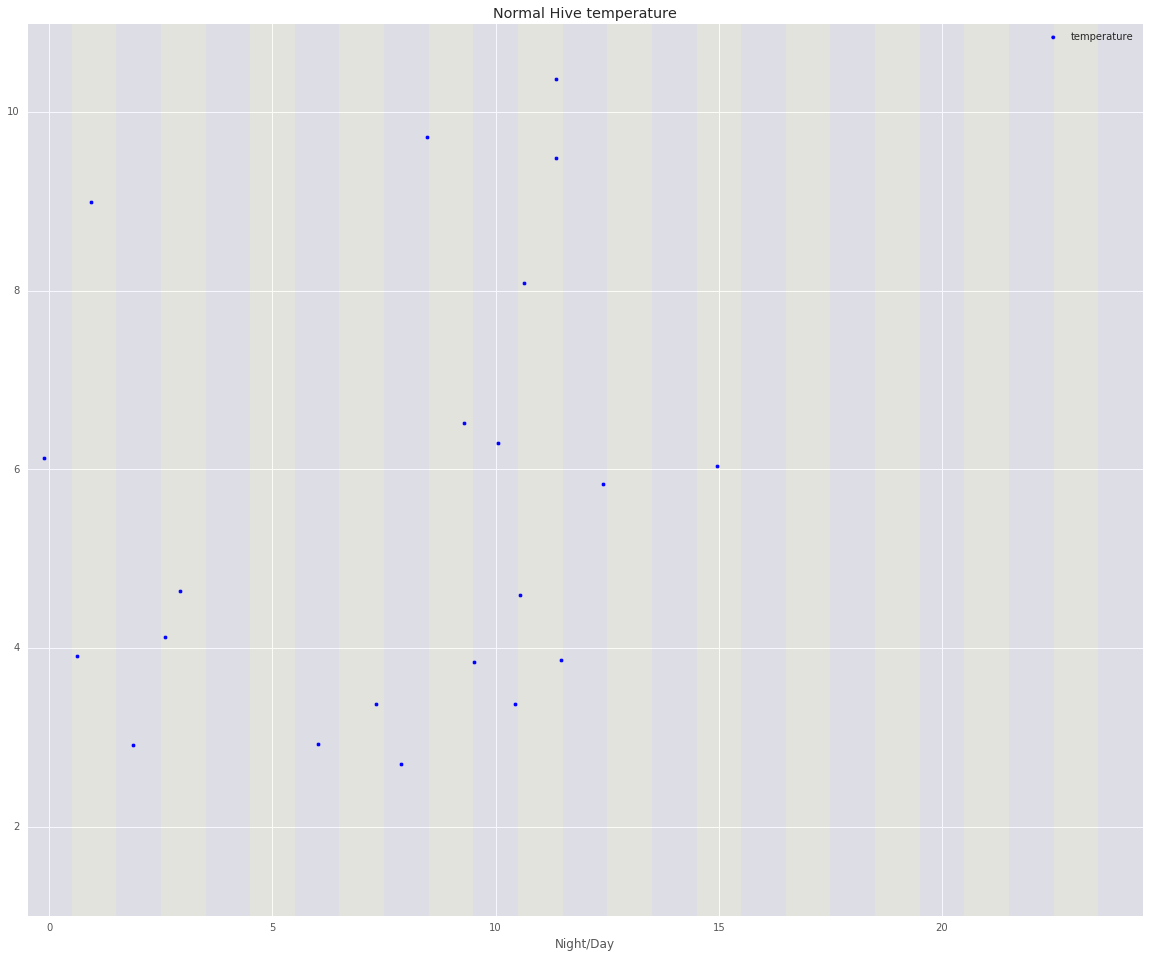

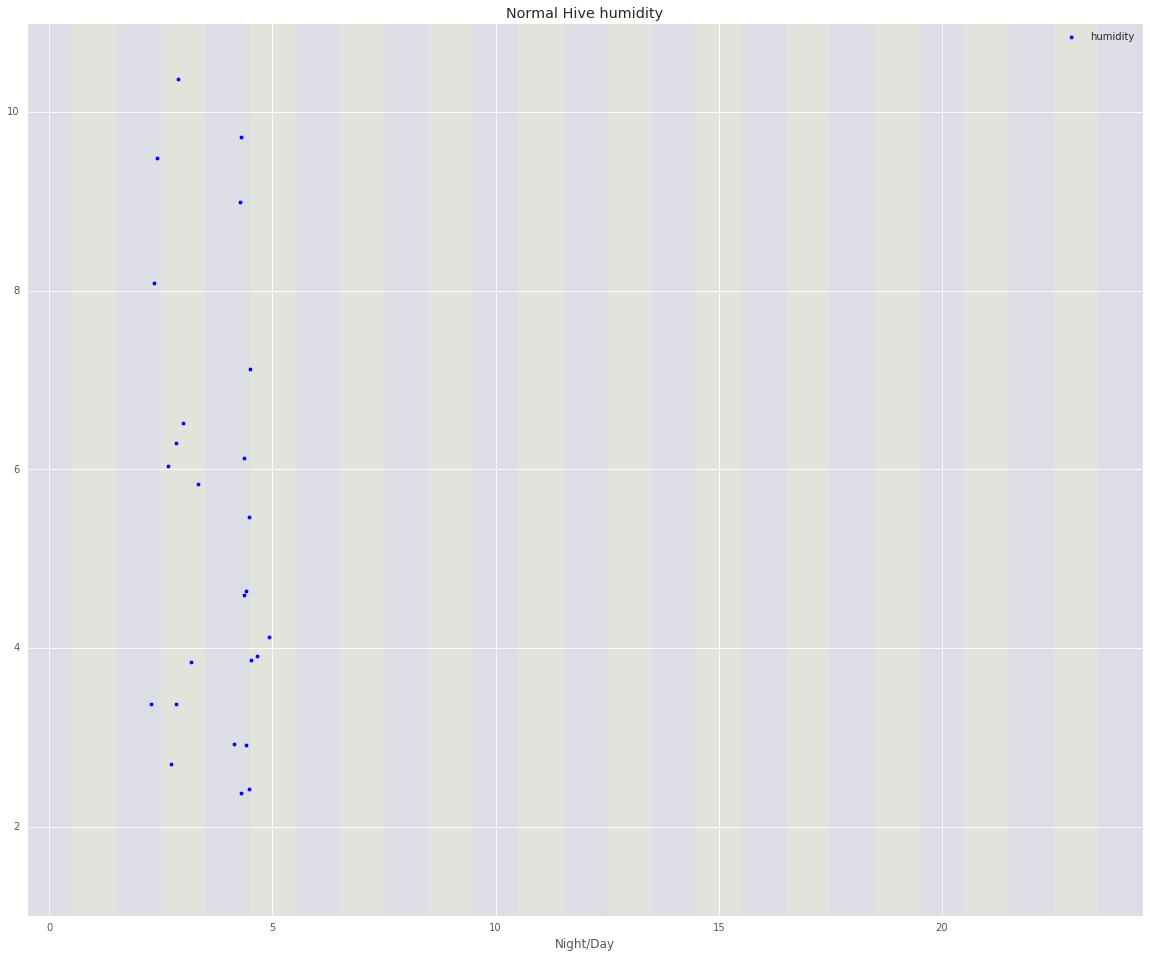

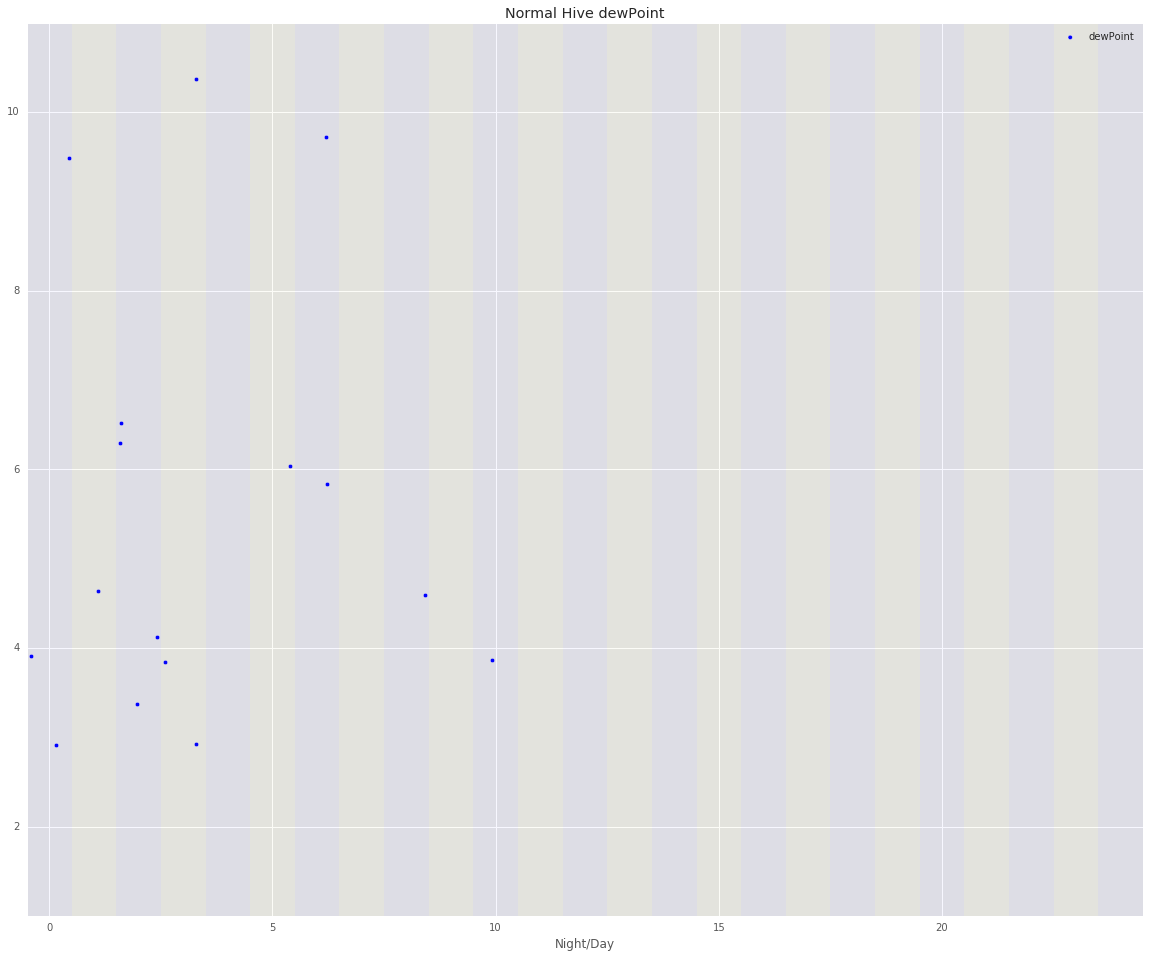

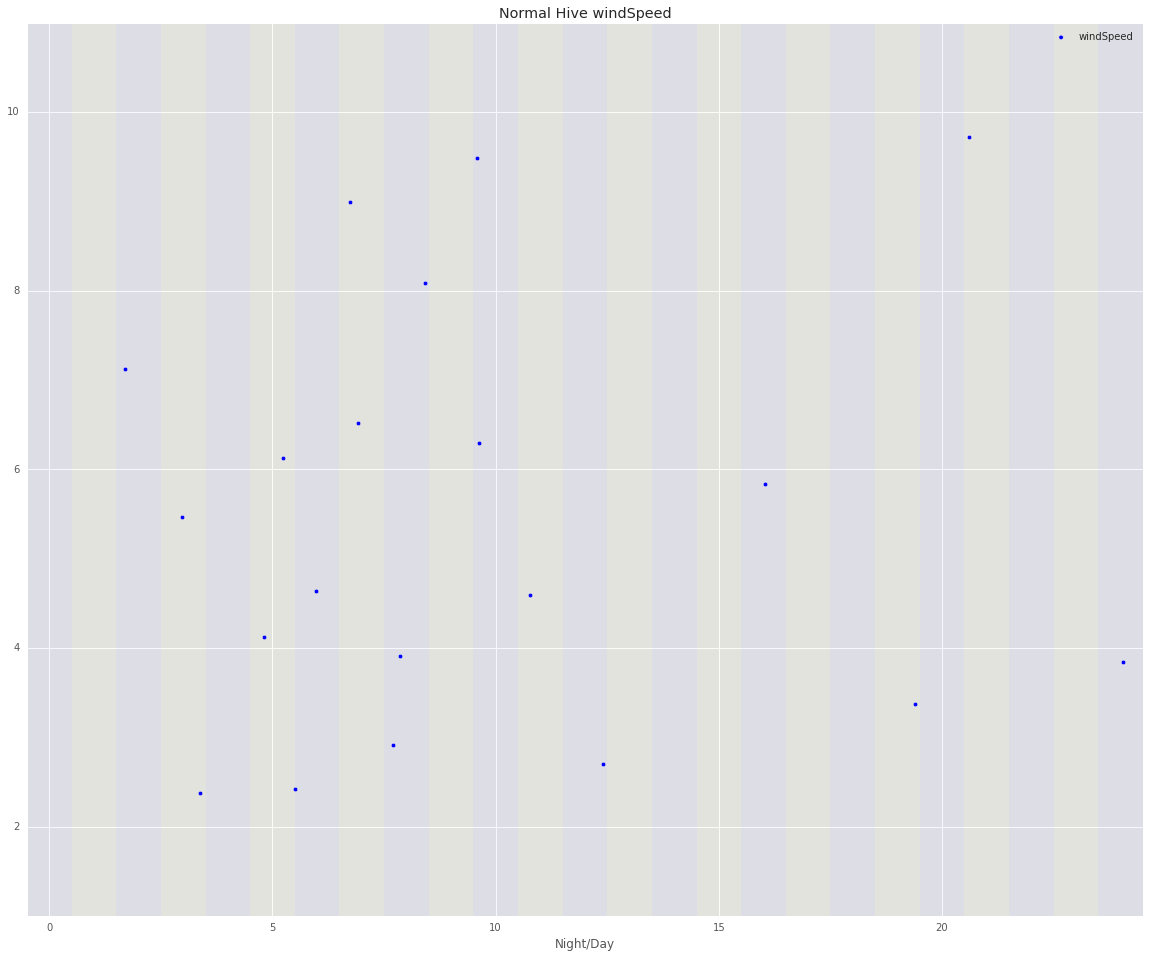

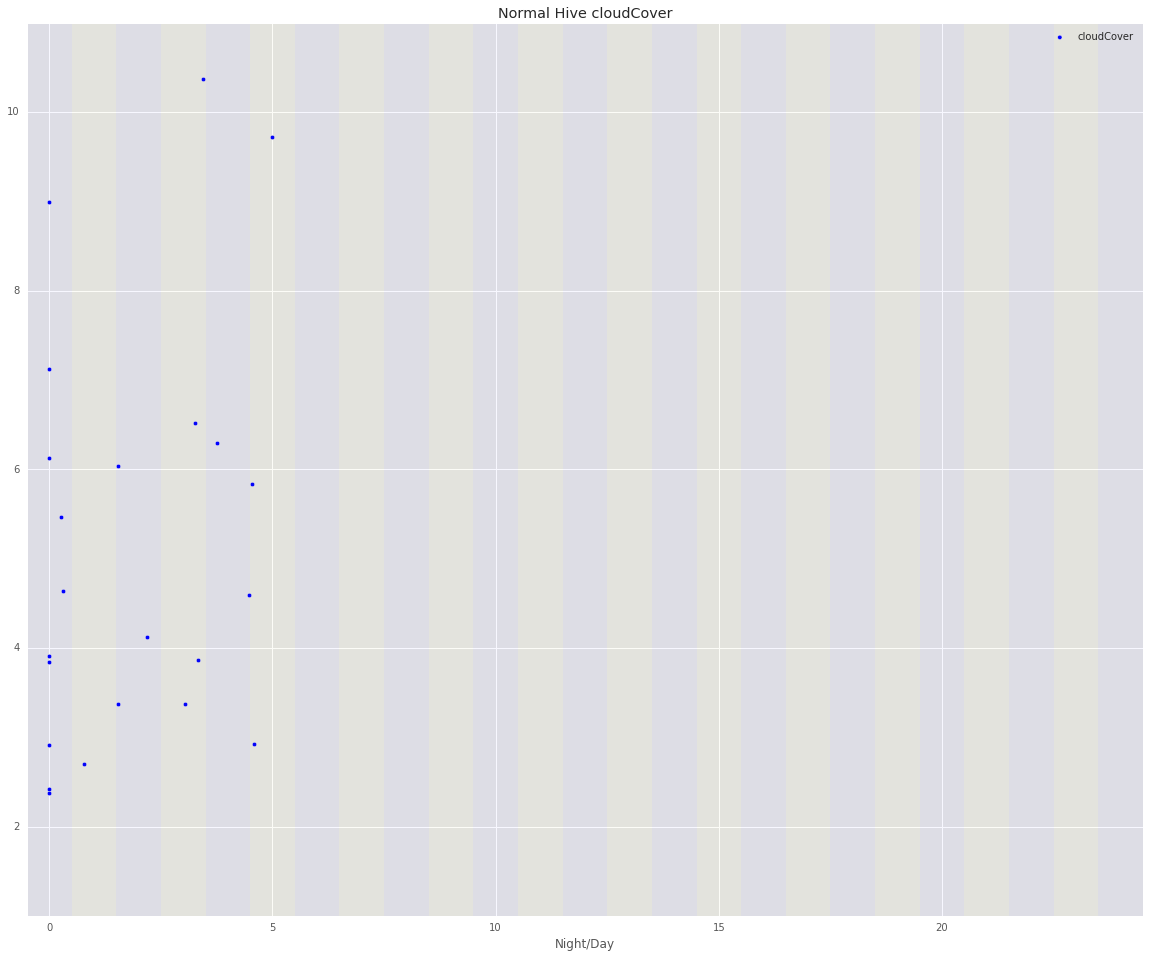

In [78]:
for i, df in enumerate(real_result_df_list):
    df = df.fillna(1)
    for metric in ['temperature', 'humidity', 'dewPoint', 'windSpeed', 'cloudCover']:
        
        if metric not in ['temperature', 'dewPoint']:
            weather = weather_df_list[i][metric][0:25] * 5
        else:
            weather = weather_df_list[i][metric][0:25]
        
        plt.scatter(weather, df['mean_all_tracked_speeds'][0:25], marker='o', label=metric)
        plt.title('{} {}'.format(hive_names[i], metric))
        plt.xlabel('Night/Day')
        plt.xlim(-0.5,24.5)
        plt.legend(loc='upper right')

        for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
            if time_period == 'night':
                plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
            else:
                plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')


        plt.show()
    
    
    #plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    #plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    
    #plt.scatter(df['mean_all_tracked_speeds'][0:25], df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    #plt.plot(weather_df_list[i]['temperature'][0:25], marker='o', label='temperature')
    #plt.plot(weather_df_list[i]['humidity'][0:25] * 10, marker='o', label='humidity')
    #plt.plot(weather_df_list[i]['dewPoint'][0:25], marker='o', label='dewPoint')
    #plt.plot(weather_df_list[i]['windSpeed'][0:25] * 2, marker='o', label='windSpeed')
    #plt.plot(weather_df_list[i]['cloudCover'][0:25] * 10, marker='o', label='cloudCover')
    
    #y1 = weather_df_list[i]['temperature'][0:25]
    #y2 = df['mean_all_tracked_speeds'][0:25]
    #y3 = df['spread_all_tracked_all_xy'][0:25]
    #x1 = range(len(y1))
    #x2 = range(len(y2))
    #x3 = range(len(y3))
    
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x1, y1)
    #predict_y = intercept + slope * x1
    #plt.plot(x1, predict_y, 'k-')
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x2, y2)
    #predict_y = intercept + slope * x2
    #plt.plot(x2, predict_y, 'b-')
    
    #slope, intercept, r_value, p_value, slope_std_error = linregress(x3, y3)
    #predict_y = intercept + slope * x2
    #plt.plot(x2, predict_y, 'y-')
    
    